**Performance of Stair Climbing Athletes: a Case Study of Eureka Climb, Melbourne**



**1. Introduction**

**The sport of stair climbing**

Stair climbing (also known as tower running or vertical marathon or vertical running) is a fast growing sport where runners climb tall man-made structures like towers and high-rise buildings. Every year more than 200 races are held worldwide in more than 25 countries (and still growing at a fast pace with the inclusion of new towers/buildings). 

However, unlike marathon running, there has been no specific research done (as far as I know) on stair climbing yet. Personally, I am also an avid stair climber (a newbie to this sport), having run four races (including the world class Swissotel Vertical Marathon in Singapore and the KL International Towerthon). I am thus interested in looking into the performance of stair climbers, both as a research interest to fill the research gap and as a personal endeavor. 

**Research questions** 

Taking marathon running research as a guide, (I know of a few related data science or statistical research, see for example http://runrepeat.com/research-marathon-performance-across-nations , http://www.medium.com/running-with-data , http://projects.sfchronicle.com/2016/sf-marathon-data ), I have sought to do similar things on stair climbing. 

In this project, I have sought to find out:
1.	How gender affects performance
2.	How age affects performance
3.	How "stack effect" affects performance      

*Note on stack effect, from https://www.designingbuildings.co.uk/wiki/Stack_effect*

*As air gets warmer it becomes less dense and so more buoyant. This means that warm air has a tendency to rise.
Cooler outside air is drawn into buildings at a lower level, it is warmed by sources of heat within the building (such as people, equipment, heating and solar gain), and then rises through the building to vent out at a higher level. A positive pressure area is created at the top of a building and negative pressure area at the bottom. This process can take place without mechanical assistance, simply by introducing openings at the bottom and the top of buildings.*

*Stack effect is influenced by:*

 - The effective area of openings.
 - The height of the stack.
 - The temperature difference between the bottom and the top of the stack.
 - Pressure differences outside the building. 

*The pressure vary through the height of the building, with the outside pressure being higher than the inside pressure at the bottom of the building, but the inside pressure being higher at the top.*

In this project, I looked at the start times of the climbers which gives an indication of "stack effect", if any. I hypothesize that different start times may be affected by different "stack effect" as the temperature, humidity, and pressure changes as time go by when there are more climbers in the staircase and as the day progresses. 

**Data source**

For this pilot research, I looked at the Eureka Stair Climb, which is one of the four big vertical races in Australia. Eureka Stair Climb results data were collected from http://tomatotiming.racetecresults.com/StartPage.aspx?CId=16&S=eureka


**Eureka Stair Climb**

Eureka Stair Climb is Australia’s biggest vertical race where climbers ascend the 1642 steps of one of the world’s 
tallest residential buildings, Eureka Tower, in Southbank, Melbourne to its level 88 observation deck, the Eureka Skydeck, which is the highest observation deck in the Southern Hemisphere.(https://www.eurekaclimb.com.au/)

Eureka Stair Climb is in the top 20 (amount of stairs) of stair climbs in the world and is host to an Elite Race for some of Australia’s best stair climbers.

It is part of the World Federation of Great Towers (WFGT) Tower Running Challenge (see, http://www.great-towers.com/tower-running/).

**2. Pre-processing: Getting, Preparing, and Transforming Data**

In [1]:
# Eureka Stair Climb results data from http://tomatotiming.racetecresults.com/StartPage.aspx?CId=16&S=eureka
# csv files were saved

# Get the csv files

e16 = read.csv("eureka2016.csv", header = TRUE) 
e15 = read.csv("eureka2015.csv", header = TRUE)
e14 = read.csv("eureka2014.csv", header = TRUE)
e13 = read.csv("eureka2013.csv", header = TRUE)
e12 = read.csv("eureka2012.csv", header = TRUE)
e11 = read.csv("eureka2011.csv", header = TRUE)
e10 = read.csv("eureka2010.csv", header = TRUE)

In [2]:
# Glimpse of the data 

head(e16,5)
head(e15,5)
head(e14,5)
head(e13,5)
head(e12,5)
head(e11,5)
head(e10,5)


Pos Race.No Fav Share Name                    Time Category  Cat.Pos
1 1   101     NA  NA    Mark BOURNE             8:13 Elite     1      
2 2   114     NA  NA    Leon KEELY              8:54 Elite     2      
3 3   106     NA  NA    Peter REYNOLDS          9:36 Elite     3      
4 4   111     NA  NA    Etienne BLUMSTEIN-JONES 9:48 Elite     4      
5 5   330     NA  NA    Peter MACKNAMARA        9:51 40-49 yrs 1      
  Second.Categ Second.Categ.Pos ⋯ Team.Result Team.Pos Pos.in.Team TOD     
1 All Ages     1                ⋯             NA       NA          06:53:15
2 All Ages     2                ⋯             NA       NA          06:58:25
3 All Ages     3                ⋯             NA       NA          06:55:38
4 All Ages     4                ⋯             NA       NA          06:57:51
5 All Ages     5                ⋯             NA       NA          07:30:35
  Start    Finish Finish.Backup Start.1  Finish.1 Finish.Backup.1
1 99:99:99 8:13   99:99:99      99:99:99 8:13     99:99:99       
2 99:99:99 8:54   99:99:99      99:99:99 8:54     99:99:99       
3 99:99:99 9:36   99:99:99      99:99:99 9:36     99:99:99       
4 99:99:99 9:48   99:99:99      99:99:99 9:48     99:99:99       
5 99:99:99 9:51   99:99:99      99:99:99 9:51     99:99:99

Pos Race.No Fav Share Name           Time Category  Cat.Pos
1 1    101    NA  NA    Mark BOURNE    7:55 Elite     1      
2 2    102    NA  NA    Darren WILSON  8:08 Elite     2      
3 3   3119    NA  NA    Scott MCGRAW   9:19 40-49 yrs 1      
4 4    103    NA  NA    Chris FRY      9:27 Elite     3      
5 5    105    NA  NA    Peter BARTLETT 9:32 Elite     4      
  Second.Categ       Second.Categ.Pos ⋯ Team.Result Team.Pos Pos.in.Team
1 All Ages           1                ⋯             NA       NA         
2 All Ages           2                ⋯             NA       NA         
3 Emergency Services 1                ⋯ 46:40        3        1         
4 All Ages           3                ⋯             NA       NA         
5 All Ages           4                ⋯             NA       NA         
  TOD      Start    Finish Finish.Backup Start.1  Finish.1 Finish.Backup.1
1 06:52:57 99:99:99 7:55   99:99:99      99:99:99 7:55     99:99:99       
2 06:53:24 99:99:99 8:08   99:99:99      99:99:99 8:08     99:99:99       
3 10:36:52 99:99:99 9:19   99:99:99      99:99:99 9:19     99:99:99       
4 06:54:59 99:99:99 9:27   99:99:99      99:99:99 9:27     99:99:99       
5 06:55:36 99:99:99 9:32   99:99:99      99:99:99 9:32     99:99:99

Pos Race.No Fav Share Name          Time Category  Cat.Pos Second.Categ
1 1    101    NA  NA    Mark BOURNE   7:49 Elite     1       All Ages    
2 2    102    NA  NA    Darren WILSON 8:03 Elite     2       All Ages    
3 3   1817    NA  NA    Darren WILSON 8:38 40-49 yrs 1       All Ages    
4 4    104    NA  NA    Chris FRY     9:03 Elite     3       All Ages    
5 5    107    NA  NA    Adam RYAN     9:06 Elite     4       All Ages    
  Second.Categ.Pos ⋯ Team.Pos TOD      Start    Finish Finish.Backup
1 1                ⋯ NA       06:54:51 99:99:99 7:49   99:99:99     
2 2                ⋯ NA       06:55:25 99:99:99 8:03   99:99:99     
3 3                ⋯  1       09:31:13 99:99:99 8:38   99:99:99     
4 4                ⋯ NA       06:57:05 99:99:99 9:03   99:99:99     
5 5                ⋯ NA       06:57:48 99:99:99 9:06   99:99:99     
  Start.Backup Start.1  Finish.1 Finish.Backup.1 Start.Backup.1
1 99:99:99     99:99:99 7:49     99:99:99        99:99:99      
2 99:99:99     99:99:99 8:03     99:99:99        99:99:99      
3 99:99:99     99:99:99 8:38     99:99:99        99:99:99      
4 99:99:99     99:99:99 9:03     99:99:99        99:99:99      
5 99:99:99     99:99:99 9:06     99:99:99        99:99:99

Pos Race.No Fav Name           Time    Category  Cat.Pos Gender Gen.Pos
1 1    101    NA  Mark BOURNE    0:07:34 Elite     1       Male   1      
2 2    102    NA  Darren WILSON  0:07:55 Elite     2       Male   2      
3 3   2678    NA  Mark Bourne    0:08:48 30-39 yrs 1       Male   3      
4 4   1136    NA  Scott McGraw   0:09:44 40-49 yrs 1       Male   4      
5 5    244    NA  Peter BARTLETT 0:09:54 40-49 yrs 2       Male   5      
  TOD    
1 7:07:34
2 7:07:55
3 7:08:48
4 7:09:44
5 7:09:54

Pos Race.No Fav Name             Time    Category  Cat.Pos Gender Gen.Pos
1 1    100    NA  Mark BOURNE      0:07:59 19-29 yrs 1       Male   1      
2 2    101    NA  Darren WILSON    0:08:09 30-39 yrs 1       Male   2      
3 3    103    NA  Michael HOSKING  0:08:55 19-29 yrs 2       Male   3      
4 4    108    NA  Blair TUNEVITSCH 0:09:02 19-29 yrs 3       Male   4      
5 5   1414    NA  Scott MCGRAW     0:09:34 30-39 yrs 2       Male   5      
  TOD    
1 7:07:59
2 7:08:09
3 7:08:55
4 7:09:02
5 7:09:34

Pos Race.No Fav Name            Time    Category  Cat.Pos Gender Gen.Pos
1 1   113     NA  Mark BOURNE     0:08:22 19-29 yrs 1       Male   1      
2 2   112     NA  Scott MCTAGGART 0:08:25 30-39 yrs 1       Male   2      
3 3   111     NA  Darren WILSON   0:08:38 30-39 yrs 2       Male   3      
4 4   103     NA  Jordan HARRIES  0:09:00 19-29 yrs 2       Male   4      
5 5   108     NA  Scott MCGRAW    0:09:02 30-39 yrs 3       Male   5      
  TOD    
1 7:08:22
2 7:08:25
3 7:08:38
4 7:09:00
5 7:09:02

Pos Race.No Fav Name            Time    Category Cat.Pos Gender Gen.Pos
1 1   107     NA  Scott MCTAGGART 0:08:30 Elite    1       Male   1      
2 2   111     NA  Adam RYAN       0:09:04 Elite    2       Male   2      
3 3   110     NA  Michael HOSKING 0:09:05 Elite    3       Male   3      
4 4   108     NA  Scott MCGRAW    0:09:18 Elite    4       Male   4      
5 5   106     NA  Daryl SUTER     0:09:22 Elite    5       Male   5      
  TOD    
1 8:17:09
2 8:17:43
3 8:17:44
4 8:17:57
5 8:18:01

In [3]:
# Let's look at the data in more detail 
# Check the Category and Secondary Category
# Check the Gender
# Check the Name

In [4]:
# Check the unique categories for each year's data

unique(e16$Category)
unique(e15$Category)
unique(e14$Category)
unique(e13$Category)
unique(e12$Category)
unique(e11$Category)
unique(e10$Category)


"#############################################################"

# Check the unique secondary categories for each year's data

unique(e16$Second.Categ)
unique(e15$Second.Categ)
unique(e14$Second.Categ)

"#############################################################"

# Check the unique genders for each year's data

unique(e16$Gender)
unique(e15$Gender)
unique(e14$Gender)
unique(e13$Gender)
unique(e12$Gender)
unique(e11$Gender)
unique(e10$Gender)

[1] Elite     40-49 yrs 19-29 yrs 30-39 yrs 12-18 yrs 50-59     60-69    
[8] 70+      
Levels: 12-18 yrs 19-29 yrs 30-39 yrs 40-49 yrs 50-59 60-69 70+ Elite

[1] Elite     40-49 yrs 30-39 yrs 50+       12-18 yrs 19-29 yrs
Levels: 12-18 yrs 19-29 yrs 30-39 yrs 40-49 yrs 50+ Elite

[1] Elite     40-49 yrs 30-39 yrs 19-29 yrs 50+       12-18 yrs
Levels: 12-18 yrs 19-29 yrs 30-39 yrs 40-49 yrs 50+ Elite

[1] Elite     30-39 yrs 40-49 yrs 19-29 yrs 50+       12-18 yrs          
Levels:  12-18 yrs 19-29 yrs 30-39 yrs 40-49 yrs 50+ Elite

[1] 19-29 yrs 30-39 yrs 40-49 yrs 12-18 yrs 50+      
Levels: 12-18 yrs 19-29 yrs 30-39 yrs 40-49 yrs 50+

[1] 19-29 yrs 30-39 yrs 40-49 yrs 12-18 yrs 50+      
Levels: 12-18 yrs 19-29 yrs 30-39 yrs 40-49 yrs 50+

[1] Elite     12-18 yrs VIP       30-39 yrs 19-29 yrs 50+       40-49 yrs
Levels: 12-18 yrs 19-29 yrs 30-39 yrs 40-49 yrs 50+ Elite VIP

[1] "#############################################################"

[1] All Ages                                               
[3] Emergency Services          Emergency Services Full Kit
Levels:  All Ages Emergency Services Emergency Services Full Kit

[1] All Ages                    Emergency Services         
[3] Emergency Services Full Kit
Levels: All Ages Emergency Services Emergency Services Full Kit

[1] All Ages                    Emergency Services         
[3] Emergency Services Full Kit
Levels: All Ages Emergency Services Emergency Services Full Kit

[1] "#############################################################"

[1] Male   Female
Levels: Female Male

[1] Male   Female
Levels: Female Male

[1] Male   Female
Levels: Female Male

[1] Male    Female  Unknown
Levels: Female Male Unknown

[1] Male   Female
Levels: Female Male

[1] Male   Female
Levels: Female Male

[1] Male   Female
Levels: Female Male

In [5]:
# Looking at the data in detail:

# Categories 50-59, 60-69, 70+ were introduced in 2016
# All other years use 50+
# So let's recode the categories 50-59, 60-69, 70+ to 50+ for consistency

# 2011 and 2012 have no Elite Category

# 2010 has a VIP category, while others do not. Let's remove this category

# 2014-2016 have a second category:
# 1) Emergency Services (participated by Metropolitan Fire Brigade (MFB) and CFA, 
#    Ambulance Victoria, Victoria Police, and Defence Forces) 
# 2) Emergency Services Full Kit (wearing full firefighter gear - uniform, boots, helmet, 
#    breathing apparatus, gloves)

# I'll keep those under Emergency Services and discard the ones under Emergency Services Full Kit first 
# so that the analysis focuses on climbers with similar characteristics

# 2013 has unknown gender 
# Let's remove the climbers with unknown gender

In [6]:
# Get the dataframes for 2014-2016 without the Emergency Services Full Kit second category

e16 <- e16[e16$Second.Categ != 'Emergency Services Full Kit',]
e15 <- e15[e15$Second.Categ != 'Emergency Services Full Kit',]
e14 <- e14[e14$Second.Categ != 'Emergency Services Full Kit',]

# Get the dataframes for 2010 without the VIP category

e10 <- e10[e10$Category != 'VIP',]

# Get the dataframes for 2013 without the unknown gender

e13 <- e13[e13$Gender != 'Unknown',]

In [7]:
# Recoding age groups in 2016 to "50 yrs +"

library(car)

e16$Category <- recode(e16$Category,"c('50-59','60-69','70+') = '50 yrs +'")
e15$Category <- recode(e15$Category,"'50+' = '50 yrs +'")
e14$Category <- recode(e14$Category,"'50+' = '50 yrs +'")
e13$Category <- recode(e13$Category,"'50+' = '50 yrs +'")
e12$Category <- recode(e12$Category,"'50+' = '50 yrs +'")
e11$Category <- recode(e11$Category,"'50+' = '50 yrs +'")
e10$Category <- recode(e10$Category,"'50+' = '50 yrs +'")

In [8]:
# Remove unwanted columns
# The race no. is maintained as there are some runners with the same names
# TOD is the time the climber start the race

e16[c("Pos","Fav","Share","Cat.Pos","Second.Categ","Second.Categ.Pos","Gen.Pos","Team.Type", "Team",
     "Team.Result","Team.Pos","Pos.in.Team","Start","Finish","Finish.Backup",
      "Start.1","Finish.1","Finish.Backup.1")]=NULL

e15[c("Pos","Fav","Share","Cat.Pos","Second.Categ","Second.Categ.Pos","Gen.Pos","Team.Type", "Team",
     "Team.Result","Team.Pos","Pos.in.Team","Start","Finish","Finish.Backup",
      "Start.1","Finish.1","Finish.Backup.1")]=NULL

e14[c("Pos","Fav","Share","Cat.Pos","Second.Categ","Second.Categ.Pos","Gen.Pos","Team.Type", "Team",
     "Team.Result","Team.Pos","Pos.in.Team","Start","Finish","Finish.Backup",
      "Start.1","Finish.1","Finish.Backup.1", "Start.Backup", "Start.Backup.1")]=NULL

e13[c("Pos","Fav","Cat.Pos","Gen.Pos")]=NULL

e12[c("Pos","Fav","Cat.Pos","Gen.Pos")]=NULL

e11[c("Pos","Fav","Cat.Pos","Gen.Pos")]=NULL

e10[c("Pos","Fav","Cat.Pos","Gen.Pos")]=NULL

# The data after unwanted columns are removed

head(e16,5)
head(e15,5)
head(e14,5)
head(e13,5)
head(e12,5)
head(e11,5)
head(e10,5)

Race.No Name                    Time Category  Gender TOD     
1 101     Mark BOURNE             8:13 Elite     Male   06:53:15
2 114     Leon KEELY              8:54 Elite     Male   06:58:25
3 106     Peter REYNOLDS          9:36 Elite     Male   06:55:38
4 111     Etienne BLUMSTEIN-JONES 9:48 Elite     Male   06:57:51
5 330     Peter MACKNAMARA        9:51 40-49 yrs Male   07:30:35

Race.No Name           Time Category  Gender TOD     
1  101    Mark BOURNE    7:55 Elite     Male   06:52:57
2  102    Darren WILSON  8:08 Elite     Male   06:53:24
3 3119    Scott MCGRAW   9:19 40-49 yrs Male   10:36:52
4  103    Chris FRY      9:27 Elite     Male   06:54:59
5  105    Peter BARTLETT 9:32 Elite     Male   06:55:36

Race.No Name          Time Category  Gender TOD     
1  101    Mark BOURNE   7:49 Elite     Male   06:54:51
2  102    Darren WILSON 8:03 Elite     Male   06:55:25
3 1817    Darren WILSON 8:38 40-49 yrs Male   09:31:13
4  104    Chris FRY     9:03 Elite     Male   06:57:05
5  107    Adam RYAN     9:06 Elite     Male   06:57:48

Race.No Name           Time    Category  Gender TOD    
1  101    Mark BOURNE    0:07:34 Elite     Male   7:07:34
2  102    Darren WILSON  0:07:55 Elite     Male   7:07:55
3 2678    Mark Bourne    0:08:48 30-39 yrs Male   7:08:48
4 1136    Scott McGraw   0:09:44 40-49 yrs Male   7:09:44
5  244    Peter BARTLETT 0:09:54 40-49 yrs Male   7:09:54

Race.No Name             Time    Category  Gender TOD    
1  100    Mark BOURNE      0:07:59 19-29 yrs Male   7:07:59
2  101    Darren WILSON    0:08:09 30-39 yrs Male   7:08:09
3  103    Michael HOSKING  0:08:55 19-29 yrs Male   7:08:55
4  108    Blair TUNEVITSCH 0:09:02 19-29 yrs Male   7:09:02
5 1414    Scott MCGRAW     0:09:34 30-39 yrs Male   7:09:34

Race.No Name            Time    Category  Gender TOD    
1 113     Mark BOURNE     0:08:22 19-29 yrs Male   7:08:22
2 112     Scott MCTAGGART 0:08:25 30-39 yrs Male   7:08:25
3 111     Darren WILSON   0:08:38 30-39 yrs Male   7:08:38
4 103     Jordan HARRIES  0:09:00 19-29 yrs Male   7:09:00
5 108     Scott MCGRAW    0:09:02 30-39 yrs Male   7:09:02

Race.No Name            Time    Category Gender TOD    
1 107     Scott MCTAGGART 0:08:30 Elite    Male   8:17:09
2 111     Adam RYAN       0:09:04 Elite    Male   8:17:43
3 110     Michael HOSKING 0:09:05 Elite    Male   8:17:44
4 108     Scott MCGRAW    0:09:18 Elite    Male   8:17:57
5 106     Daryl SUTER     0:09:22 Elite    Male   8:18:01

In [9]:
# check for missing data (if any)

res16 = complete.cases(e16)
length(res16[res16 == FALSE])

res15 = complete.cases(e15)
length(res15[res15 == FALSE])

res14 = complete.cases(e14)
length(res14[res14 == FALSE])

res13 = complete.cases(e13)
length(res13[res13 == FALSE])

res12 = complete.cases(e12)
length(res12[res12 == FALSE])

res11 = complete.cases(e11)
length(res11[res11 == FALSE])

res10 = complete.cases(e10)
length(res10[res10 == FALSE])

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [10]:
# Good, no missing data
# Let's combine the 2010-2016 dataframes 

# Add the column Year to the dataframe

Year = c(rep(2016,nrow(e16)))
e16 = cbind(Year, e16)

Year = c(rep(2015,nrow(e15)))
e15 = cbind(Year, e15)

Year = c(rep(2014,nrow(e14)))
e14 = cbind(Year, e14)

Year = c(rep(2013,nrow(e13)))
e13 = cbind(Year, e13)

Year = c(rep(2012,nrow(e12)))
e12 = cbind(Year, e12)

Year = c(rep(2011,nrow(e11)))
e11 = cbind(Year, e11)

Year = c(rep(2010,nrow(e10)))
e10 = cbind(Year, e10)


In [11]:
# The data after Year column has been added

head(e16,5)
head(e15,5)
head(e14,5)
head(e13,5)
head(e12,5)
head(e11,5)
head(e10,5)

Year Race.No Name                    Time Category  Gender TOD     
1 2016 101     Mark BOURNE             8:13 Elite     Male   06:53:15
2 2016 114     Leon KEELY              8:54 Elite     Male   06:58:25
3 2016 106     Peter REYNOLDS          9:36 Elite     Male   06:55:38
4 2016 111     Etienne BLUMSTEIN-JONES 9:48 Elite     Male   06:57:51
5 2016 330     Peter MACKNAMARA        9:51 40-49 yrs Male   07:30:35

Year Race.No Name           Time Category  Gender TOD     
1 2015  101    Mark BOURNE    7:55 Elite     Male   06:52:57
2 2015  102    Darren WILSON  8:08 Elite     Male   06:53:24
3 2015 3119    Scott MCGRAW   9:19 40-49 yrs Male   10:36:52
4 2015  103    Chris FRY      9:27 Elite     Male   06:54:59
5 2015  105    Peter BARTLETT 9:32 Elite     Male   06:55:36

Year Race.No Name          Time Category  Gender TOD     
1 2014  101    Mark BOURNE   7:49 Elite     Male   06:54:51
2 2014  102    Darren WILSON 8:03 Elite     Male   06:55:25
3 2014 1817    Darren WILSON 8:38 40-49 yrs Male   09:31:13
4 2014  104    Chris FRY     9:03 Elite     Male   06:57:05
5 2014  107    Adam RYAN     9:06 Elite     Male   06:57:48

Year Race.No Name           Time    Category  Gender TOD    
1 2013  101    Mark BOURNE    0:07:34 Elite     Male   7:07:34
2 2013  102    Darren WILSON  0:07:55 Elite     Male   7:07:55
3 2013 2678    Mark Bourne    0:08:48 30-39 yrs Male   7:08:48
4 2013 1136    Scott McGraw   0:09:44 40-49 yrs Male   7:09:44
5 2013  244    Peter BARTLETT 0:09:54 40-49 yrs Male   7:09:54

Year Race.No Name             Time    Category  Gender TOD    
1 2012  100    Mark BOURNE      0:07:59 19-29 yrs Male   7:07:59
2 2012  101    Darren WILSON    0:08:09 30-39 yrs Male   7:08:09
3 2012  103    Michael HOSKING  0:08:55 19-29 yrs Male   7:08:55
4 2012  108    Blair TUNEVITSCH 0:09:02 19-29 yrs Male   7:09:02
5 2012 1414    Scott MCGRAW     0:09:34 30-39 yrs Male   7:09:34

Year Race.No Name            Time    Category  Gender TOD    
1 2011 113     Mark BOURNE     0:08:22 19-29 yrs Male   7:08:22
2 2011 112     Scott MCTAGGART 0:08:25 30-39 yrs Male   7:08:25
3 2011 111     Darren WILSON   0:08:38 30-39 yrs Male   7:08:38
4 2011 103     Jordan HARRIES  0:09:00 19-29 yrs Male   7:09:00
5 2011 108     Scott MCGRAW    0:09:02 30-39 yrs Male   7:09:02

Year Race.No Name            Time    Category Gender TOD    
1 2010 107     Scott MCTAGGART 0:08:30 Elite    Male   8:17:09
2 2010 111     Adam RYAN       0:09:04 Elite    Male   8:17:43
3 2010 110     Michael HOSKING 0:09:05 Elite    Male   8:17:44
4 2010 108     Scott MCGRAW    0:09:18 Elite    Male   8:17:57
5 2010 106     Daryl SUTER     0:09:22 Elite    Male   8:18:01

In [12]:
combine = rbind (e16,e15,e14,e13,e12,e11,e10)
head(combine,5)
tail(combine,5)
nrow(combine)

Year Race.No Name                    Time Category  Gender TOD     
1 2016 101     Mark BOURNE             8:13 Elite     Male   06:53:15
2 2016 114     Leon KEELY              8:54 Elite     Male   06:58:25
3 2016 106     Peter REYNOLDS          9:36 Elite     Male   06:55:38
4 2016 111     Etienne BLUMSTEIN-JONES 9:48 Elite     Male   06:57:51
5 2016 330     Peter MACKNAMARA        9:51 40-49 yrs Male   07:30:35

Year Race.No Name               Time        Category  Gender TOD    
4326 2010 1529    Robert BRUNTON     Not started 40-49 yrs Male   8:00:00
4336 2010 1530    Neil SMITH         Not started 19-29 yrs Male   8:00:00
4346 2010 1546    Ruth HYLAND        Not started 19-29 yrs Female 8:00:00
4356 2010 1547    Emily FOX          Not started 19-29 yrs Female 8:00:00
4366 2010 1915    Alexander WILLIAMS Not started 30-39 yrs Male   8:00:00

[1] 9189

In [13]:
# Oops.
# There are climbers who didn't start the race.
# Let's delete these rows

fcombine <- combine[combine$Time != "Not started",]

In [14]:
# Check the dataframe with only climbers who started

fcombine
nrow(fcombine)

Year Race.No Name                    Time    Category  Gender TOD     
1     2016  101    Mark BOURNE             8:13    Elite     Male   06:53:15
2     2016  114    Leon KEELY              8:54    Elite     Male   06:58:25
3     2016  106    Peter REYNOLDS          9:36    Elite     Male   06:55:38
4     2016  111    Etienne BLUMSTEIN-JONES 9:48    Elite     Male   06:57:51
5     2016  330    Peter MACKNAMARA        9:51    40-49 yrs Male   07:30:35
6     2016  105    Alice MCNAMARA          9:59    Elite     Female 06:55:30
7     2016  108    Philip WEATHERLAKE      10:08   Elite     Male   06:57:10
8     2016  678    Matteo BRUSCHI          10:21   19-29 yrs Male   08:15:09
9     2016  845    George MCKENNA          10:24   30-39 yrs Male   09:02:29
10    2016 1780    Nathan PETERSON         10:26   40-49 yrs Male   12:06:57
11    2016  118    Sanna EL KOTT HELANDER  10:26   Elite     Female 07:01:57
12    2016  115    Matt BERG               10:26   Elite     Male   07:00:28
13    2016 1367    Jordan CORELLI          10:27   12-18 yrs Male   09:53:10
14    2016  107    Timothy MCNEILL         10:29   Elite     Male   06:57:01
15    2016 3018    Jason WILLIAMS          10:33   40-49 yrs Male   10:27:35
16    2016  658    Stuart KINGMA           10:33   30-39 yrs Male   08:05:46
17    2016 1327    Andrea GATTI            10:34   19-29 yrs Male   09:50:56
18    2016  117    Lina EL KOTT HELANDER   10:35   Elite     Female 07:01:37
19    2016  204    Chris KEARNEY           10:37   30-39 yrs Male   07:11:58
20    2016  311    Steve BENTLEY           10:50   50 yrs +  Male   07:23:43
21    2016  843    Tim MCNEILL             10:55   30-39 yrs Male   09:02:28
22    2016 1900    Ian HOFSTETTER          11:01   50 yrs +  Male   12:21:53
23    2016  566    Ash GARDNER             11:07   19-29 yrs Male   07:54:59
24    2016 1055    Dominic CROWLEY         11:08   30-39 yrs Male   09:19:09
25    2016 3015    Geoff DAVIS             11:08   19-29 yrs Male   10:26:41
26    2016  113    Damien GARDNER          11:10   Elite     Male   07:00:12
27    2016  213    James COLE              11:12   30-39 yrs Male   07:17:34
28    2016  120    Kate CUMBERS            11:18   Elite     Female 07:03:50
29    2016  747    Jason DAYE              11:19   19-29 yrs Male   08:31:12
30    2016 1544    Cam HOWAT               11:23   30-39 yrs Male   11:24:45
⋮     ⋮    ⋮       ⋮                       ⋮       ⋮         ⋮      ⋮       
3666  2010  623    Emma BELL               0:23:46 19-29 yrs Female 8:32:25 
3676  2010  402    Sue MOSLEY              0:23:47 50 yrs +  Female 8:32:26 
3686  2010 1229    Amber BURNHAM           0:23:54 19-29 yrs Female 8:32:33 
3696  2010  844    Jenelle SMITH           0:24:06 19-29 yrs Female 8:32:45 
3706  2010 1037    Therese BLAY            0:24:23 50 yrs +  Female 8:33:02 
37110 2010 1502    Andrew IVEY             0:24:40 30-39 yrs Male   8:33:19 
3726  2010  353    Rachelle PONTONIO       0:24:53 30-39 yrs Female 8:33:32 
3736  2010  628    Samantha SNYDER         0:25:16 19-29 yrs Female 8:33:55 
3746  2010 1570    Tony SCOTT              0:25:46 30-39 yrs Male   8:34:25 
3756  2010  403    Mary STAIOS             0:26:04 40-49 yrs Female 8:34:43 
3766  2010  845    Meagan WILLIAMS         0:26:04 19-29 yrs Female 8:34:43 
3776  2010  927    Stephen BRIGGS          0:26:24 12-18 yrs Male   8:35:03 
3786  2010 1505    Kristy OTTNIG           0:26:25 30-39 yrs Female 8:35:04 
3796  2010 1571    Michael ZWERINK         0:26:26 19-29 yrs Male   8:35:05 
3806  2010  851    Nadine WILLS            0:27:11 30-39 yrs Female 8:35:50 
38110 2010  951    Christine TODD          0:27:56 19-29 yrs Female 8:36:35 
3826  2010 1204    Joe DI BENEDETTO        0:28:09 40-49 yrs Male   8:36:48 
3836  2010 1544    Amit VOHRA              0:28:51 30-39 yrs Male   8:37:30 
3846  2010 1038    Lauren WARING           0:29:08 19-29 yrs Female 8:37:47 
3856  2010  535    Emily WILLATS           0:30:30 19-29 yrs Female 8:39:09 
38

[1] 9153

In [15]:
# Seems good.
# Now let's convert the Time and TOD to a useful format 

In [16]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [17]:
# Convert the hr_min_sec format for TOD (start time) into seconds
# Then scale the start time in seconds using natural logarithm

a = hms(fcombine$TOD)
Start.time.sec <- as.numeric(a)
TODsec <- as.data.frame(Start.time.sec)


In [18]:
fcombine2 <- cbind(fcombine, TODsec)
head(fcombine2, 10)
tail(fcombine2, 10)

Year Race.No Name                    Time  Category  Gender TOD     
1  2016  101    Mark BOURNE             8:13  Elite     Male   06:53:15
2  2016  114    Leon KEELY              8:54  Elite     Male   06:58:25
3  2016  106    Peter REYNOLDS          9:36  Elite     Male   06:55:38
4  2016  111    Etienne BLUMSTEIN-JONES 9:48  Elite     Male   06:57:51
5  2016  330    Peter MACKNAMARA        9:51  40-49 yrs Male   07:30:35
6  2016  105    Alice MCNAMARA          9:59  Elite     Female 06:55:30
7  2016  108    Philip WEATHERLAKE      10:08 Elite     Male   06:57:10
8  2016  678    Matteo BRUSCHI          10:21 19-29 yrs Male   08:15:09
9  2016  845    George MCKENNA          10:24 30-39 yrs Male   09:02:29
10 2016 1780    Nathan PETERSON         10:26 40-49 yrs Male   12:06:57
   Start.time.sec
1  24795         
2  25105         
3  24938         
4  25071         
5  27035         
6  24930         
7  25030         
8  29709         
9  32549         
10 43617

Year Race.No Name              Time    Category  Gender TOD     
3866  2010 1938    Liane FENWICK     3:17:51 19-29 yrs Female 11:26:30
3876  2010  268    Tegan DE LA TORRE 0:30:40 19-29 yrs Female 8:39:19 
3886  2010 1939    Colin BELL        3:17:53 19-29 yrs Male   11:26:32
3896  2010 1411    Catherine GORR    0:31:04 50 yrs +  Female 8:39:43 
3906  2010  910    Sean DEAN         0:31:33 30-39 yrs Male   8:40:12 
39110 2010 1413    Jan RICE          0:32:08 50 yrs +  Female 8:40:47 
3926  2010  518    Suzanne PULS      0:32:48 40-49 yrs Female 8:41:27 
3936  2010  303    Jacinta HEALY     0:36:16 19-29 yrs Female 8:44:55 
3946  2010 1802    Lan LAN           0:40:18 19-29 yrs Female 8:48:57 
3956  2010  310    Vivek JADHAV      0:42:25 30-39 yrs Male   8:51:04 
      Start.time.sec
3866  41190         
3876  31159         
3886  41192         
3896  31183         
3906  31212         
39110 31247         
3926  31287         
3936  31495         
3946  31737         
3956  31864

In [19]:
# Order the timings

fcombine3 <- fcombine2[order(ms(fcombine2$Time), hms(fcombine2$Time)),]

# There is an issue with the Time format (some in ms, while some in hms format) -> the ordering is affected

fcombine3[4380:4400,]


Year Race.No Name             Time    Category  Gender TOD     
1607  2014 1601    Belinda BERRY    54:39   40-49 yrs Female 12:37:22
1608  2014 1022    William KNIGHT   54:52   19-29 yrs Male   09:53:51
1550  2016 1604    Lauryn DUNNE     54:53   19-29 yrs Female 12:19:55
1552  2016  377    Jessica MCKENZIE 55:13   19-29 yrs Female 08:13:38
14461 2015 3015    Paul O'NEILL     57:58   40-49 yrs Male   11:14:32
14471 2015 2004    Helen BALLARD    58:51   30-39 yrs Female 13:33:48
14481 2015  937    Clarissa EVANS   58:53   19-29 yrs Female 09:43:16
14491 2015 2006    Monica HEIDINGER 58:54   30-39 yrs Female 13:33:49
1617  2013  101    Mark BOURNE      0:07:34 Elite     Male   7:07:34 
2104  2013  102    Darren WILSON    0:07:55 Elite     Male   7:07:55 
1620  2012  100    Mark BOURNE      0:07:59 19-29 yrs Male   7:07:59 
2106  2012  101    Darren WILSON    0:08:09 30-39 yrs Male   7:08:09 
1626  2011  113    Mark BOURNE      0:08:22 19-29 yrs Male   7:08:22 
2108  2011  112    Scott MCTAGGART  0:08:25 30-39 yrs Male   7:08:25 
1629  2010  107    Scott MCTAGGART  0:08:30 Elite     Male   8:17:09 
3108  2011  111    Darren WILSON    0:08:38 30-39 yrs Male   7:08:38 
3104  2013 2678    Mark Bourne      0:08:48 30-39 yrs Male   7:08:48 
3106  2012  103    Michael HOSKING  0:08:55 19-29 yrs Male   7:08:55 
4108  2011  103    Jordan HARRIES   0:09:00 19-29 yrs Male   7:09:00 
4106  2012  108    Blair TUNEVITSCH 0:09:02 19-29 yrs Male   7:09:02 
5108  2011  108    Scott MCGRAW     0:09:02 30-39 yrs Male   7:09:02 
      Start.time.sec
1607  45442         
1608  35631         
1550  44395         
1552  29618         
14461 40472         
14471 48828         
14481 34996         
14491 48829         
1617  25654         
2104  25675         
1620  25679         
2106  25689         
1626  25702         
2108  25705         
1629  29829         
3108  25718         
3104  25728         
3106  25735         
4108  25740         
4106  25742         
5108  25742

In [20]:
# Convert the min_sec format 

min_sec = fcombine3[is.na(hms(fcombine3$Time)) == TRUE,]$Time
a = ms(min_sec)
b = seconds(a)
Finish.time.sec <- as.numeric(b)
#length(Finish.time.sec)
Fin_sec <- as.data.frame(Finish.time.sec)

# Convert the hr_min_sec format 

hr_min_sec = fcombine3[is.na(ms(fcombine3$Time)) == TRUE,]$Time
a1 = hms(hr_min_sec)
b1 = seconds(a1)
Finish.time.sec <- as.numeric(b1)
#length(Finish.time.sec)
Fin_sec1 <- as.data.frame(Finish.time.sec)

# After converting, combine the results
# Then scale the finish time in seconds using natural logarithm

Finish_sec = rbind(Fin_sec, Fin_sec1)
head(Finish_sec,5)
tail(Finish_sec,5)
#nrow(Finish_sec)

Finish.time.sec
1 469            
2 475            
3 483            
4 488            
5 493

Finish.time.sec
9149  7491          
9150 11192          
9151 11871          
9152 11873          
9153 20556

In [21]:
# Attach the Finish.time.sec to the dataframe

fcombine4 <- cbind(fcombine3, Finish_sec)
head(fcombine4,5)

Year Race.No Name          Time Category Gender TOD      Start.time.sec
1614 2014 101     Mark BOURNE   7:49 Elite    Male   06:54:51 24891         
1603 2015 101     Mark BOURNE   7:55 Elite    Male   06:52:57 24777         
2102 2014 102     Darren WILSON 8:03 Elite    Male   06:55:25 24925         
2100 2015 102     Darren WILSON 8:08 Elite    Male   06:53:24 24804         
1    2016 101     Mark BOURNE   8:13 Elite    Male   06:53:15 24795         
     Finish.time.sec
1614 469            
1603 475            
2102 483            
2100 488            
1    493

In [22]:
# Let's check final form of the dataframe for analysis
# Looks pretty good

f_combine5 <- fcombine4[order(fcombine4$Finish.time.sec),]
head(f_combine5,20)
tail(f_combine5,20)

Year Race.No Name             Time    Category  Gender TOD     
1617 2013  101    Mark BOURNE      0:07:34 Elite     Male   7:07:34 
1614 2014  101    Mark BOURNE      7:49    Elite     Male   06:54:51
1603 2015  101    Mark BOURNE      7:55    Elite     Male   06:52:57
2104 2013  102    Darren WILSON    0:07:55 Elite     Male   7:07:55 
1620 2012  100    Mark BOURNE      0:07:59 19-29 yrs Male   7:07:59 
2102 2014  102    Darren WILSON    8:03    Elite     Male   06:55:25
2100 2015  102    Darren WILSON    8:08    Elite     Male   06:53:24
2106 2012  101    Darren WILSON    0:08:09 30-39 yrs Male   7:08:09 
1    2016  101    Mark BOURNE      8:13    Elite     Male   06:53:15
1626 2011  113    Mark BOURNE      0:08:22 19-29 yrs Male   7:08:22 
2108 2011  112    Scott MCTAGGART  0:08:25 30-39 yrs Male   7:08:25 
1629 2010  107    Scott MCTAGGART  0:08:30 Elite     Male   8:17:09 
3102 2014 1817    Darren WILSON    8:38    40-49 yrs Male   09:31:13
3108 2011  111    Darren WILSON    0:08:38 30-39 yrs Male   7:08:38 
3104 2013 2678    Mark Bourne      0:08:48 30-39 yrs Male   7:08:48 
2    2016  114    Leon KEELY       8:54    Elite     Male   06:58:25
3106 2012  103    Michael HOSKING  0:08:55 19-29 yrs Male   7:08:55 
4108 2011  103    Jordan HARRIES   0:09:00 19-29 yrs Male   7:09:00 
4106 2012  108    Blair TUNEVITSCH 0:09:02 19-29 yrs Male   7:09:02 
5108 2011  108    Scott MCGRAW     0:09:02 30-39 yrs Male   7:09:02 
     Start.time.sec Finish.time.sec
1617 25654          454            
1614 24891          469            
1603 24777          475            
2104 25675          475            
1620 25679          479            
2102 24925          483            
2100 24804          488            
2106 25689          489            
1    24795          493            
1626 25702          502            
2108 25705          505            
1629 29829          510            
3102 34273          518            
3108 25718          518            
3104 25728          528            
2    25105          534            
3106 25735          535            
4108 25740          540            
4106 25742          542            
5108 25742          542

Year Race.No Name                Time    Category  Gender TOD     
1613  2014 1915    Craig EDWARDS       1:07:35 40-49 yrs Male   13:34:57
16021 2012  914    Rampy GULATI        1:08:35 19-29 yrs Male   8:08:35 
1553  2016 1872    Yvonne KUCZ         1:08:52 30-39 yrs Female 13:13:34
1554  2016 1873    Loretta KALMS       1:08:52 30-39 yrs Female 13:13:34
1555  2016  575    Melissa TOTH        1:11:38 19-29 yrs Female 09:42:13
11919 2011 1665    Jacquie NICHOLSON   1:12:16 30-39 yrs Female 8:12:16 
1556  2016 1171    William KNIGHT      1:12:25 19-29 yrs Male   10:25:19
14541 2015  727    Rita HALIKIOPOULOS  1:14:19 30-39 yrs Female 09:42:40
1557  2016 1646    Danielle RULE       1:19:49 40-49 yrs Female 11:58:32
1558  2016 1645    Brittany BAUSCH     1:19:59 19-29 yrs Female 11:58:32
11925 2011  705    Vivek JADHAV        1:22:00 30-39 yrs Male   8:22:00 
15731 2013 1310    Noella Foster       1:31:49 50 yrs +  Female 8:31:49 
1574  2013 1308    Felicity Beasley    1:31:51 40-49 yrs Female 8:31:51 
15751 2013  979    Jeffrey Melancon    1:35:17 40-49 yrs Male   8:35:17 
1576  2013 2679    Rhys Fletcher       1:59:14 19-29 yrs Male   8:59:14 
2446  2010 1966    Chris VANDERLOO     2:04:51 19-29 yrs Male   10:13:30
1577  2013 1214    Peter  Pappas       3:06:32 19-29 yrs Male   10:06:32
3866  2010 1938    Liane FENWICK       3:17:51 19-29 yrs Female 11:26:30
3886  2010 1939    Colin BELL          3:17:53 19-29 yrs Male   11:26:32
15781 2013 2108    Lachlan Gill-Renouf 5:42:36 12-18 yrs Male   12:42:36
      Start.time.sec Finish.time.sec
1613  48897           4055          
16021 29315           4115          
1553  47614           4132          
1554  47614           4132          
1555  34933           4298          
11919 29536           4336          
1556  37519           4345          
14541 34960           4459          
1557  43112           4789          
1558  43112           4799          
11925 30120           4920          
15731 30709           5509          
1574  30711           5511          
15751 30917           5717          
1576  32354           7154          
2446  36810           7491          
1577  36392          11192          
3866  41190          11871          
3886  41192          11873          
15781 45756          20556

In [23]:
# Log transform the start time and finishing time
# This will make visualization better

Log.Start.Sec = log(f_combine5$Start.time.sec)
log_start_sec <- as.data.frame(Log.Start.Sec)
f_combine6 <- cbind(f_combine5, log_start_sec)

Log.Fin.Sec = log(f_combine5$Finish.time.sec)
log_fin_sec <- as.data.frame(Log.Fin.Sec)
f_combine <- cbind(f_combine6, log_fin_sec)

head(f_combine,20)


# Save a csv file of the final combined dataframe

write.csv(f_combine, "f_combine.csv")


Year Race.No Name             Time    Category  Gender TOD     
1617 2013  101    Mark BOURNE      0:07:34 Elite     Male   7:07:34 
1614 2014  101    Mark BOURNE      7:49    Elite     Male   06:54:51
1603 2015  101    Mark BOURNE      7:55    Elite     Male   06:52:57
2104 2013  102    Darren WILSON    0:07:55 Elite     Male   7:07:55 
1620 2012  100    Mark BOURNE      0:07:59 19-29 yrs Male   7:07:59 
2102 2014  102    Darren WILSON    8:03    Elite     Male   06:55:25
2100 2015  102    Darren WILSON    8:08    Elite     Male   06:53:24
2106 2012  101    Darren WILSON    0:08:09 30-39 yrs Male   7:08:09 
1    2016  101    Mark BOURNE      8:13    Elite     Male   06:53:15
1626 2011  113    Mark BOURNE      0:08:22 19-29 yrs Male   7:08:22 
2108 2011  112    Scott MCTAGGART  0:08:25 30-39 yrs Male   7:08:25 
1629 2010  107    Scott MCTAGGART  0:08:30 Elite     Male   8:17:09 
3102 2014 1817    Darren WILSON    8:38    40-49 yrs Male   09:31:13
3108 2011  111    Darren WILSON    0:08:38 30-39 yrs Male   7:08:38 
3104 2013 2678    Mark Bourne      0:08:48 30-39 yrs Male   7:08:48 
2    2016  114    Leon KEELY       8:54    Elite     Male   06:58:25
3106 2012  103    Michael HOSKING  0:08:55 19-29 yrs Male   7:08:55 
4108 2011  103    Jordan HARRIES   0:09:00 19-29 yrs Male   7:09:00 
4106 2012  108    Blair TUNEVITSCH 0:09:02 19-29 yrs Male   7:09:02 
5108 2011  108    Scott MCGRAW     0:09:02 30-39 yrs Male   7:09:02 
     Start.time.sec Finish.time.sec Log.Start.Sec Log.Fin.Sec
1617 25654          454             10.15245      6.118097   
1614 24891          469             10.12226      6.150603   
1603 24777          475             10.11767      6.163315   
2104 25675          475             10.15327      6.163315   
1620 25679          479             10.15343      6.171701   
2102 24925          483             10.12363      6.180017   
2100 24804          488             10.11876      6.190315   
2106 25689          489             10.15382      6.192362   
1    24795          493             10.11840      6.200509   
1626 25702          502             10.15432      6.218600   
2108 25705          505             10.15444      6.224558   
1629 29829          510             10.30324      6.234411   
3102 34273          518             10.44211      6.249975   
3108 25718          518             10.15495      6.249975   
3104 25728          528             10.15534      6.269096   
2    25105          534             10.13082      6.280396   
3106 25735          535             10.15561      6.282267   
4108 25740          540             10.15580      6.291569   
4106 25742          542             10.15588      6.295266   
5108 25742          542             10.15588      6.295266

In [24]:
f_combine = read.csv("f_combine.csv")

In [25]:
# Check that categorical variables (race number, name, gender and category) are factors 
# (so that R can recognize it)

f_combine$Race.No <- as.factor(f_combine$Race.No) 
is.factor(f_combine$Race.No)
is.factor(f_combine$Name)
is.factor(f_combine$Gender)
is.factor(f_combine$Category)
is.numeric(f_combine$Start.time.sec)
is.numeric(f_combine$Finish.time.sec)


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [26]:
# Check structure of the final data frame

str(f_combine)

'data.frame':	9153 obs. of  12 variables:
 $ X              : int  1617 1614 1603 2104 1620 2102 2100 2106 1 1626 ...
 $ Year           : int  2013 2014 2015 2013 2012 2014 2015 2012 2016 2011 ...
 $ Race.No        : Factor w/ 2512 levels "1","100","101",..: 3 3 3 4 2 4 4 3 3 15 ...
 $ Name           : Factor w/ 7251 levels "Aaron BROPHY",..: 4448 4448 4448 1771 4448 1771 1771 1771 4448 4448 ...
 $ Time           : Factor w/ 2582 levels "0:07:34","0:07:55",..: 1 2558 2559 2 3 2560 2561 4 2562 5 ...
 $ Category       : Factor w/ 6 levels "12-18 yrs","19-29 yrs",..: 6 6 6 6 2 6 6 3 6 2 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ TOD            : Factor w/ 5413 levels "06:52:57","06:53:15",..: 3901 4 1 3902 3903 7 3 3904 2 3905 ...
 $ Start.time.sec : int  25654 24891 24777 25675 25679 24925 24804 25689 24795 25702 ...
 $ Finish.time.sec: int  454 469 475 475 479 483 488 489 493 502 ...
 $ Log.Start.Sec  : num  10.2 10.1 10.1 10.2 10.2 ...
 $ Log

In [27]:
# Overview of the data

summary(f_combine)

       X              Year         Race.No                 Name     
 Min.   :    1   Min.   :2010   106    :   7   Scott MCGRAW  :  10  
 1st Qu.: 2652   1st Qu.:2012   108    :   7   Chris PRICE   :   8  
 Median : 6513   Median :2013   109    :   7   Peter BARTLETT:   8  
 Mean   : 6870   Mean   :2013   111    :   7   Tim MCNEILL   :   8  
 3rd Qu.:10672   3rd Qu.:2015   112    :   7   Adam RYAN     :   7  
 Max.   :39110   Max.   :2016   206    :   7   Darren WILSON :   7  
                                (Other):9111   (Other)       :9105  
      Time           Category       Gender          TOD       Start.time.sec 
 0:14:25:  21   12-18 yrs: 399   Female:4304   7:14:25:  18   Min.   :24777  
 0:15:55:  17   19-29 yrs:3109   Male  :4849   7:15:55:  15   1st Qu.:26231  
 0:14:43:  16   30-39 yrs:3040                 7:15:06:  14   Median :27228  
 0:16:24:  16   40-49 yrs:1757                 7:16:16:  14   Mean   :30998  
 0:15:06:  15   50 yrs + : 750                 7:16:24:  1

**3. Visualizing and Comparing Performance: Effects of Gender; Effects of Elite Status**

In [28]:
# Let's visualize the data

library('ggplot2')

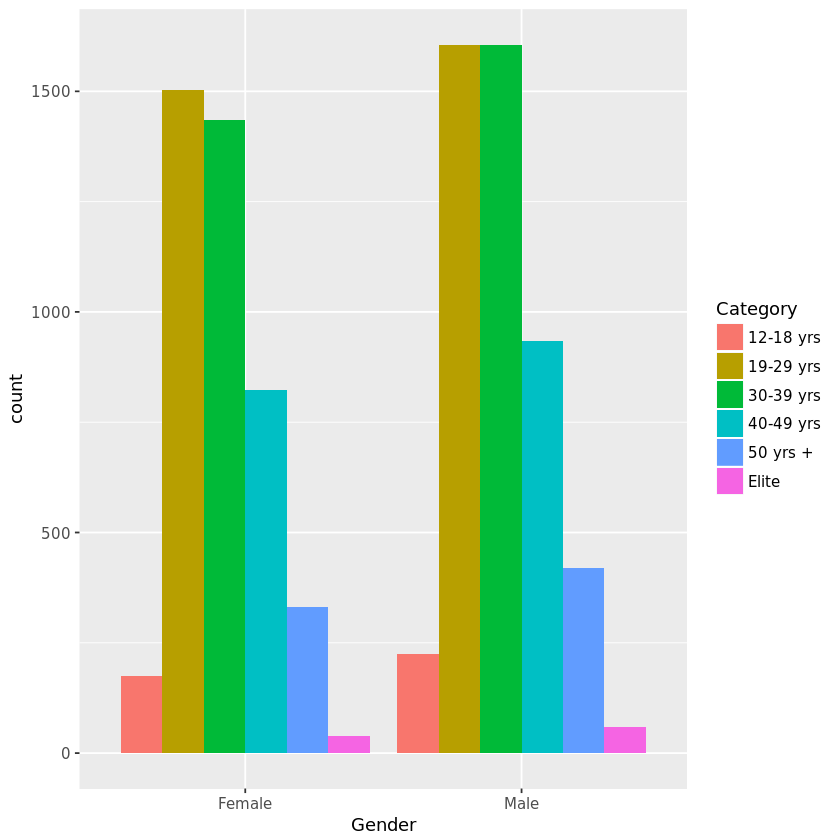

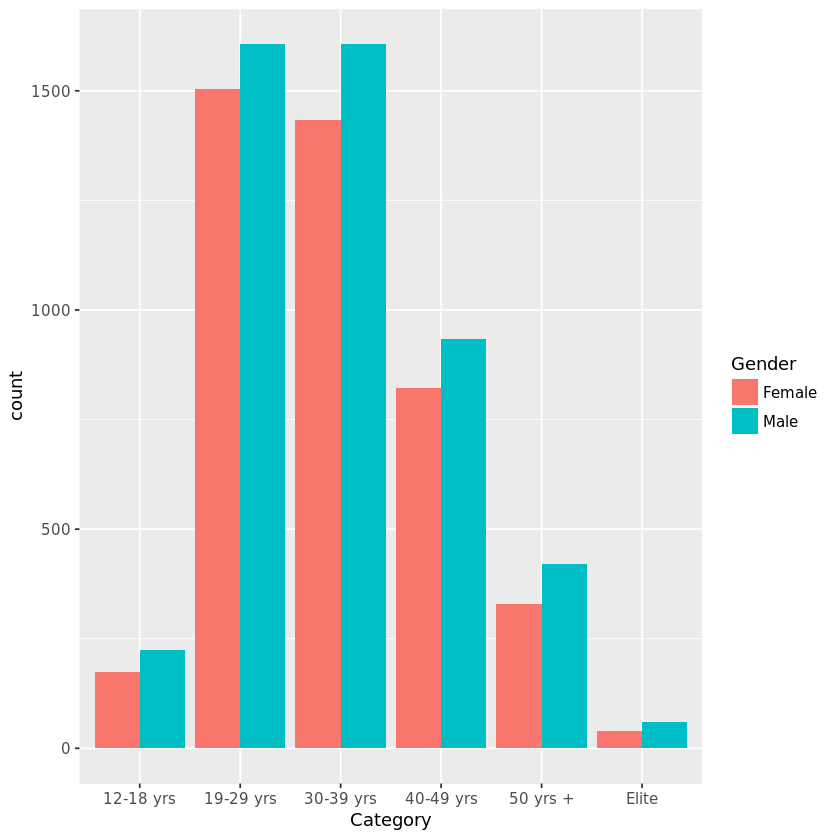

In [29]:
# An overview by Gender and Category

# Category count for each gender
ggplot(f_combine, aes(Gender, fill=Category))+
geom_bar(position="dodge")

# Gender count in each category
ggplot(f_combine, aes(Category, fill=Gender))+
geom_bar(position="dodge")

In [30]:
library('fitdistrplus')

Loading required package: MASS
Loading required package: survival


summary statistics
------
min:  24777   max:  49269 
median:  27228 
mean:  30998.22 
estimated sd:  6311.55 
estimated skewness:  1.167962 
estimated kurtosis:  3.073483 

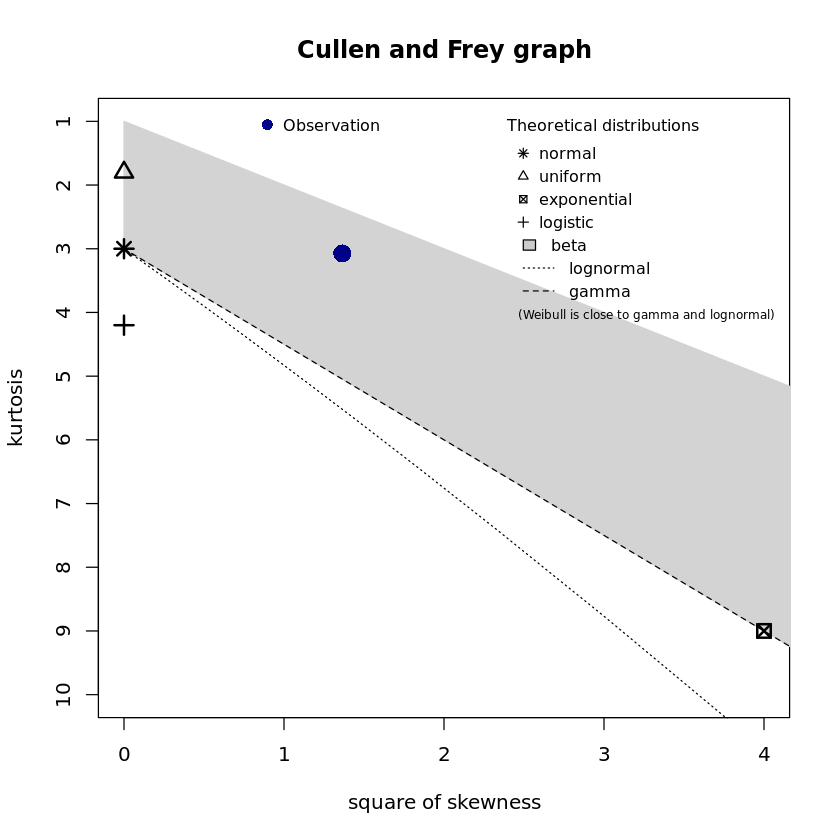

summary statistics
------
min:  454   max:  20556 
median:  1029 
mean:  1137.275 
estimated sd:  575.1795 
estimated skewness:  13.66373 
estimated kurtosis:  355.6984 

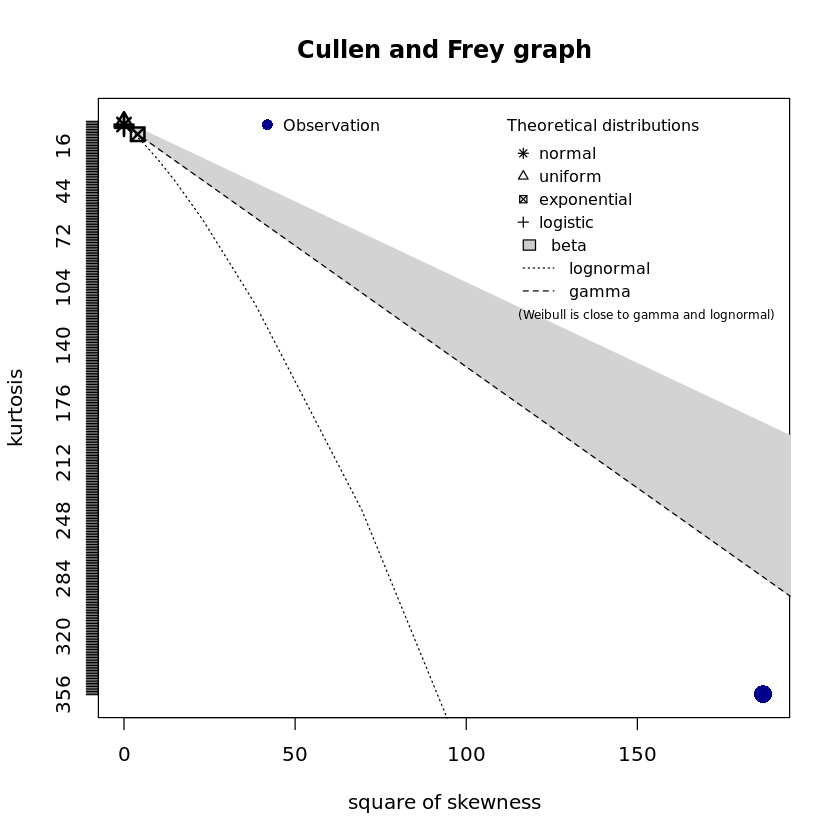

In [31]:
# Check the distribution of finishing time and start time

descdist(Start.time.sec, discrete = FALSE)
descdist(Finish.time.sec, discrete = FALSE)


In [32]:
# Comparison of finishing time by gender (overall)
# Plot the boxplots by Gender

ggplot(f_combine, aes(Gender, Log.Fin.Sec))+
geom_boxplot(aes(fill = factor(Gender)),outlier.colour = "red", outlier.shape = 1)+
scale_fill_brewer(palette = "Blues") +
theme_classic() +
coord_flip()

Result:

- male climbers are faster overall than female climbers


In [33]:
# How fast is the fastest male vs fastest female

fm = min(f_combine[f_combine$Gender == "Male",]$Finish.time.sec)
ff = min(f_combine[f_combine$Gender == "Female",]$Finish.time.sec)
Perf_diff = (ff-fm)/fm*100
paste("The fastest male is", round(Perf_diff,2),"%", "faster than the fastest female.")

[1] "The fastest male is 26.21 % faster than the fastest female."

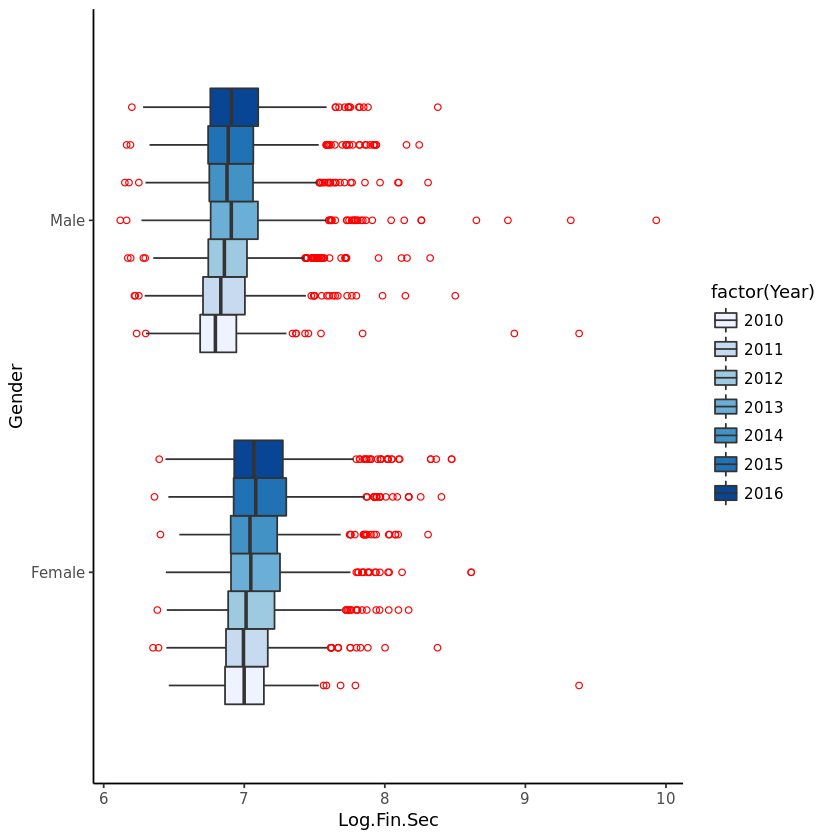

In [34]:
# Comparison of finishing time over the years by gender
# Plot the boxplots by Year and by Gender

ggplot(f_combine, aes(Gender, Log.Fin.Sec, group = interaction(Year, Gender)))+
geom_boxplot(aes(fill = factor(Year), factor(Gender)),outlier.colour = "red", outlier.shape = 1)+
scale_fill_brewer(palette = "Blues") +
theme_classic() +
coord_flip()

Result:

 - the occurrence of outliers are more prevalent in male climbers; both for fast and slow outliers

In [35]:
# Comparison of finishing time over the years (male vs female)
# Plot the boxplots by Year and by Gender pairs

ggplot(f_combine, aes(Year, Log.Fin.Sec, group = interaction(Gender, Year)))+
geom_boxplot(aes(fill = factor(Gender)),outlier.colour = "red", outlier.shape = 1)+
scale_fill_brewer(palette = "Blues") +
theme_classic() +
coord_flip()

Result:

- male climbers are consistently faster then female climbers across all years

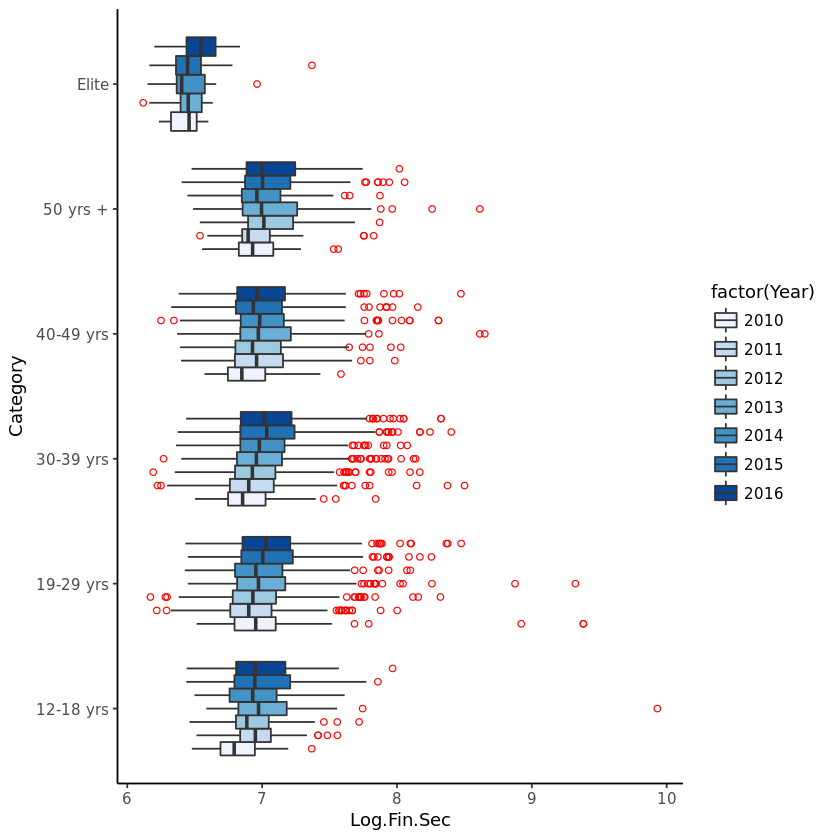

In [36]:
# Comparison of finishing time by category over the years 
# Plot the boxplots by Category and by Year

ggplot(f_combine, aes(Category, Log.Fin.Sec, group = interaction(Category, Year)))+
geom_boxplot(aes(fill = factor(Year), factor(Category)),outlier.colour = "red", outlier.shape = 1)+
scale_fill_brewer(palette = "Blues") +
theme_classic() +
coord_flip()

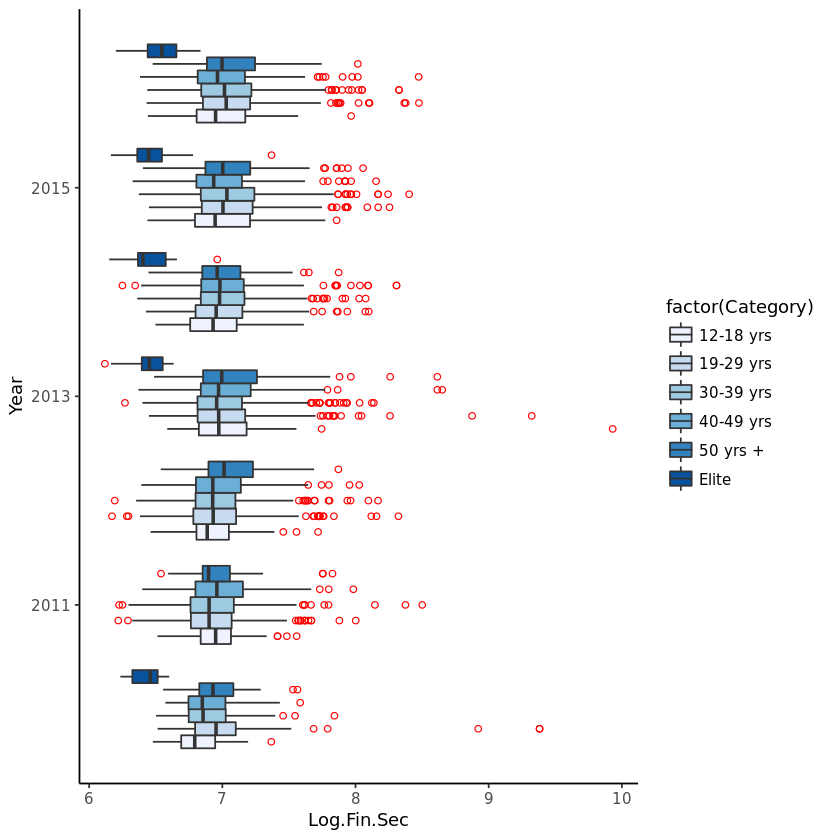

In [37]:
# Comparison of finishing time over the years by category
# Plot the boxplots by Year and by Category 

ggplot(f_combine, aes(Year, Log.Fin.Sec, group = interaction(Category, Year)))+
geom_boxplot(aes(fill = factor(Category)),outlier.colour = "red", outlier.shape = 1)+
scale_fill_brewer(palette = "Blues") +
theme_classic() +
coord_flip()

Results:

(1) Elite climbers are significantly faster than climbers in other categories for all years 
    (where there is an Elite category)

(2) the occurrence of outliers for Elite climbers are rare; it is more common in "19-29 yrs" and "30-39 yrs", 
    and to a certain degree in "40-49 yrs" 


In [38]:
# How fast are Elites vs non-Elites

e = mean(f_combine[f_combine$Category == "Elite",]$Finish.time.sec)
ne = mean(f_combine[f_combine$Category != "Elite",]$Finish.time.sec)
Perf_diff = (ne-e)/e*100
paste("The Elites are", round(Perf_diff,2),"%", "faster than the non-Elites.")

[1] "The Elites are 74.79 % faster than the non-Elites."

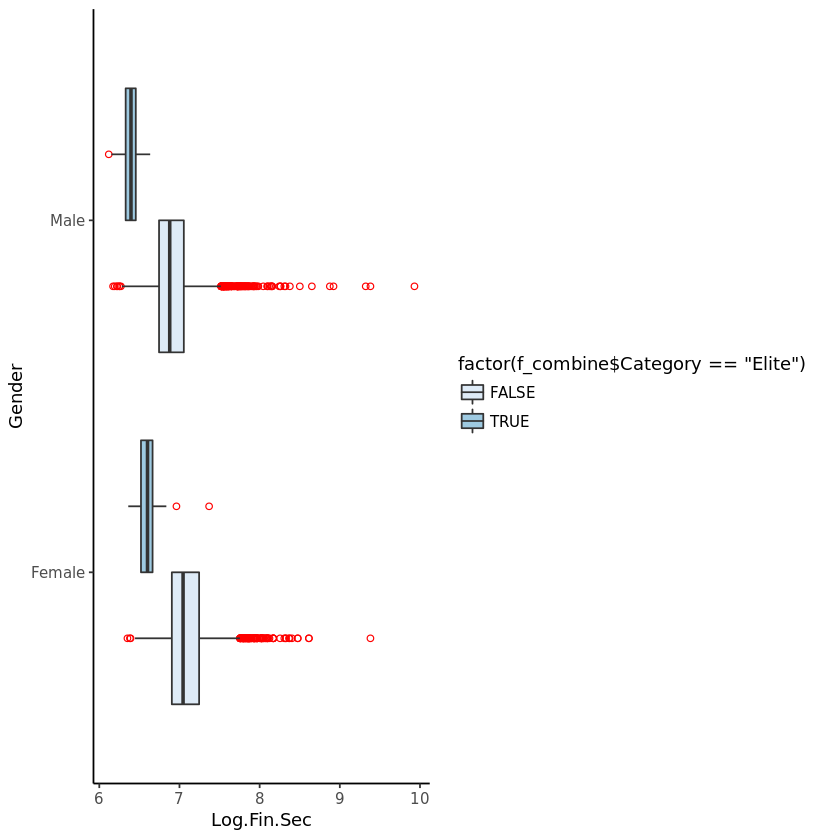

In [39]:
# Comparison of finishing time between Elite vs non-Elite male and Elite vs non-Elite female
# Plot the boxplots by Gender and by Elite vs non-Elite

ggplot(f_combine, aes(Gender, Log.Fin.Sec))+
geom_boxplot(aes(fill = factor(f_combine$Category == 'Elite')),outlier.colour = "red", outlier.shape = 1)+
scale_fill_brewer(palette = "Blues") +
theme_classic() +
coord_flip()

Results:

(1) Elite male climbers are significantly faster overall than non-Elite male climbers 

(2) Elite female climbers are significantly faster overall than non-Elite female climbers 

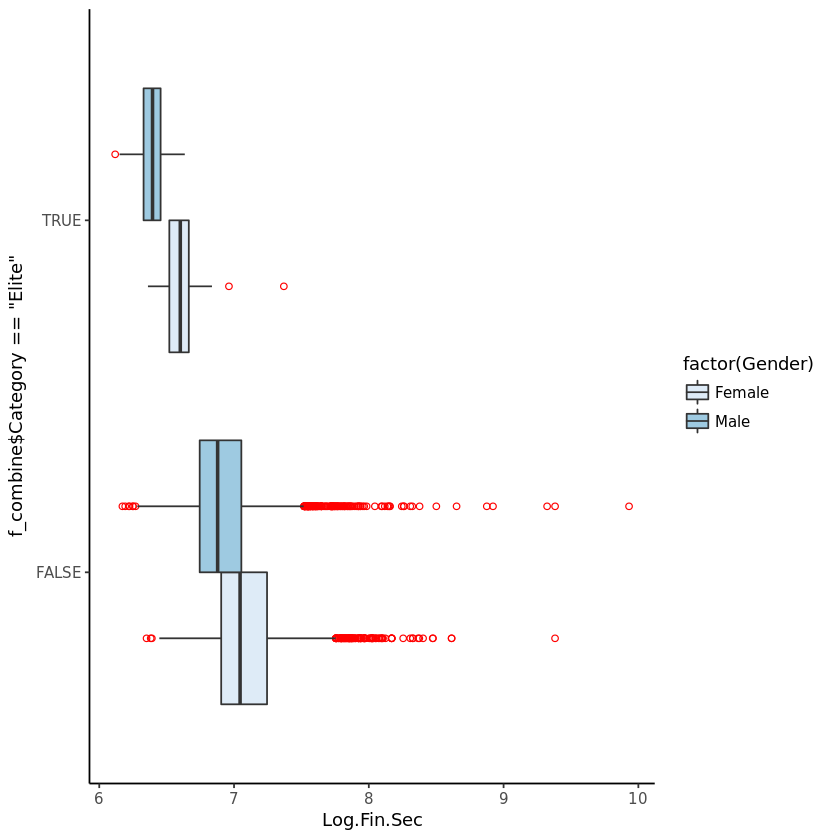

In [40]:
# Comparison of finishing time between Elite male vs Elite female; non-Elite male vs non-Elite female
# Plot the boxplots by Gender Elite; by Gender non-Elite

ggplot(f_combine, aes(f_combine$Category == 'Elite', Log.Fin.Sec))+
geom_boxplot(aes(fill = factor(Gender)),outlier.colour = "red", outlier.shape = 1)+
scale_fill_brewer(palette = "Blues") +
theme_classic() +
coord_flip()

In [41]:
# How fast are Elite males vs Elite females

em = mean(f_combine[f_combine$Gender == "Male" & f_combine$Category == "Elite",]$Finish.time.sec)
ef = mean(f_combine[f_combine$Gender == "Female" & f_combine$Category == "Elite",]$Finish.time.sec)
Perf_diff = (ef-em)/em*100
paste("The Elite males are", round(Perf_diff,2),"% faster than the Elite females.")

[1] "The Elite males are 27.23 % faster than the Elite females."

In [42]:
# How fast are non-Elite males vs non-Elite females

nm = mean(f_combine[f_combine$Gender == "Male" & f_combine$Category != "Elite",]$Finish.time.sec)
nf = mean(f_combine[f_combine$Gender == "Female" & f_combine$Category != "Elite",]$Finish.time.sec)
Perf_diff = (nf-nm)/nm*100
paste("The non-Elite males are", round(Perf_diff,2),"% faster than the non-Elite females.")

[1] "The non-Elite males are 18.11 % faster than the non-Elite females."

Result:

(1) Elite male climbers are significantly faster overall than Elite female climbers

(2) non-Elite male climbers are significantly faster overall than non-Elite female climbers 
   (gap is smaller compared to Elite male vs Elite female) 

In [43]:
# Male finishing time
Male <- summary(f_combine[f_combine$Gender == "Male",]$Finish.time.sec)

# Female finishing time
Female <- summary(f_combine[f_combine$Gender == "Female",]$Finish.time.sec)

# Elite finishing time
Elite <- summary(f_combine[f_combine$Category == "Elite",]$Finish.time.sec)

# non-Elite finishing time
non.Elite <- summary(f_combine[f_combine$Category != "Elite",]$Finish.time.sec)

# Elite male finishing time
Elite.male <- summary(f_combine[f_combine$Category == "Elite" & f_combine$Gender == "Male",]$Finish.time.sec)

# Elite female finishing time
Elite.female <- summary(f_combine[f_combine$Category == "Elite" & f_combine$Gender == "Female",]$Finish.time.sec)

# non-Elite male finishing time
non.Elite.male <- summary(f_combine[f_combine$Category != "Elite" & f_combine$Gender == "Male",]$Finish.time.sec)

# non-Elite female finishing time
non.Elite.female <- summary(f_combine[f_combine$Category != "Elite" & f_combine$Gender == "Female",]$Finish.time.sec)

# Performance table of male vs female, elite vs non-elite, elite male vs elite female, non-elite male vs non-elite female
perf = do.call(rbind, list(Male, Female, Elite, non.Elite, Elite.male, Elite.female, non.Elite.male, non.Elite.female))
Category <- c('Male', 'Female', 'Elite', 'non-Elite', 'Elite male', 'Elite female', 'non-Elite male', 'non-Elite female')
perf_df = cbind(Category, perf)
perf_df


Category         Min. 1st Qu. Median Mean  3rd Qu. Max. 
[1,] Male             454  847     967    1062  1154    20560
[2,] Female           573  993     1145   1257  1398    11870
[3,] Elite            454  588.8   634.5  663.2 719     1587 
[4,] non-Elite        479  906     1053   1159  1284    20560
[5,] Elite male       454  560.5   599    598.4 636     761  
[6,] Elite female     579  678.5   736    761.3 784     1587 
[7,] non-Elite male   479  850     971    1068  1158    20560
[8,] non-Elite female 573  997     1147   1262  1401    11870

In [44]:
# Mean finishing time (top 30) across the years for both genders

m2010 <- round(mean(f_combine[f_combine$Gender == "Male" & f_combine$Year == "2010",][1:30,]$Finish.time.sec),2)
f2010 <- round(mean(f_combine[f_combine$Gender == "Female" & f_combine$Year == "2010",][1:30,]$Finish.time.sec),1)

m2011 <- round(mean(f_combine[f_combine$Gender == "Male" & f_combine$Year == "2011",][1:30,]$Finish.time.sec),2)
f2011 <- round(mean(f_combine[f_combine$Gender == "Female" & f_combine$Year == "2011",][1:30,]$Finish.time.sec),1)

m2012 <- round(mean(f_combine[f_combine$Gender == "Male" & f_combine$Year == "2012",][1:30,]$Finish.time.sec),2)
f2012 <- round(mean(f_combine[f_combine$Gender == "Female" & f_combine$Year == "2012",][1:30,]$Finish.time.sec),1)

m2013 <- round(mean(f_combine[f_combine$Gender == "Male" & f_combine$Year == "2013",][1:30,]$Finish.time.sec),2)
f2013 <- round(mean(f_combine[f_combine$Gender == "Female" & f_combine$Year == "2013",][1:30,]$Finish.time.sec),1)

m2014 <- round(mean(f_combine[f_combine$Gender == "Male" & f_combine$Year == "2014",][1:30,]$Finish.time.sec),2)
f2014 <- round(mean(f_combine[f_combine$Gender == "Female" & f_combine$Year == "2014",][1:30,]$Finish.time.sec),2)

m2015 <- round(mean(f_combine[f_combine$Gender == "Male" & f_combine$Year == "2015",][1:30,]$Finish.time.sec),2)
f2015 <- round(mean(f_combine[f_combine$Gender == "Female" & f_combine$Year == "2015",][1:30,]$Finish.time.sec),1)

m2016 <- round(mean(f_combine[f_combine$Gender == "Male" & f_combine$Year == "2016",][1:30,]$Finish.time.sec),2)
f2016 <- round(mean(f_combine[f_combine$Gender == "Female" & f_combine$Year == "2016",][1:30,]$Finish.time.sec),2)

y2010 = do.call(rbind, list(m2010, f2010))
y2011 = do.call(rbind, list(m2011, f2011))
y2012 = do.call(rbind, list(m2012, f2012))
y2013 = do.call(rbind, list(m2013, f2013))
y2014 = do.call(rbind, list(m2014, f2014))
y2015 = do.call(rbind, list(m2015, f2015))
y2016 = do.call(rbind, list(m2016, f2016))

y_perf_df = cbind(y2010, y2011, y2012, y2013, y2014, y2015, y2016)
#y_perf_df


Year Male   Female Perf_gap
1 2010 667.2  856.2  28.33   
2 2011 589.37 773.6  31.26   
3 2012 615.6  770.8  25.21   
4 2013 621.93 781.5  25.66   
5 2014 593.73 755.93 27.32   
6 2015 606.13 749.7  23.69   
7 2016 636.63 754    18.44

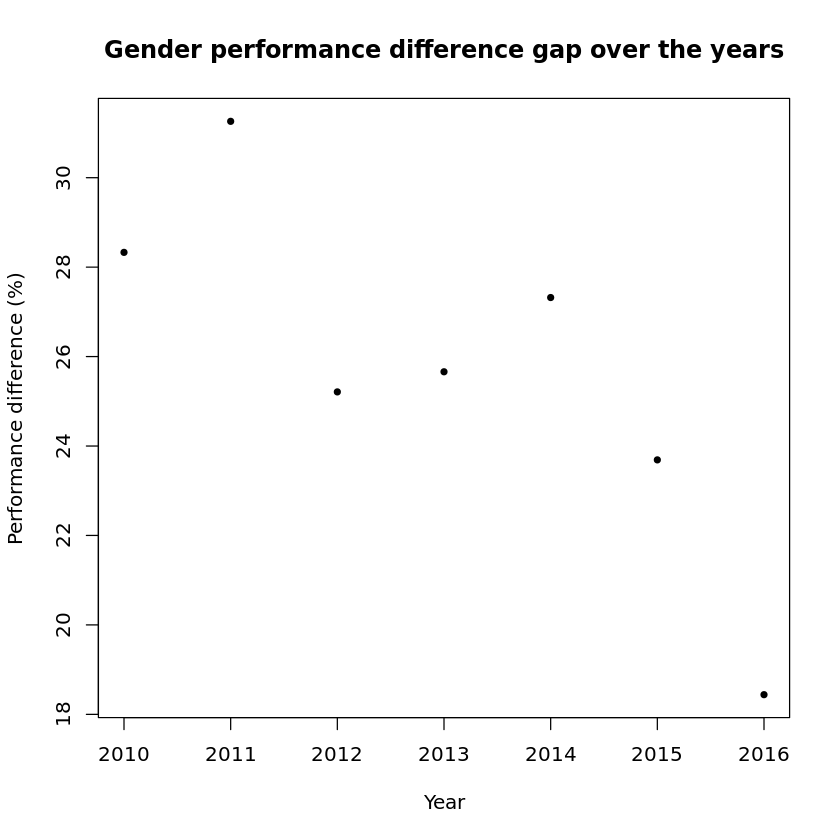

In [45]:
# Calculate the performance difference between mean top 30 male vs mean top 30 female for each year

pd10 = round(((f2010-m2010)/m2010*100),2)
pd11 = round(((f2011-m2011)/m2011*100),2)
pd12 = round(((f2012-m2012)/m2012*100),2)
pd13 = round(((f2013-m2013)/m2013*100),2)
pd14 = round(((f2014-m2014)/m2014*100),2)
pd15 = round(((f2015-m2015)/m2015*100),2)
pd16 = round(((f2016-m2016)/m2016*100),2)

p_diff = do.call(cbind, list(pd10, pd11, pd12, pd13, pd14, pd15, pd16))
perf1 = rbind(y_perf_df,p_diff)

Year <- c("2010", "2011", "2012", "2013", "2014", "2015", "2016")

perf2 = rbind(Year, perf1)
p <- t(perf2)
colnames(p)[2:4]<- c("Male","Female", "Perf_gap")
perf = data.frame(p)
perf

y <- as.vector(perf$Perf_gap)
x <- as.vector(perf$Year)

plot(x,y, main = "Gender performance difference gap over the years", xlab = "Year", ylab = "Performance difference (%)", pch=20)


In [46]:
is.data.frame(perf)

[1] TRUE

Results:

(1) Male top 30 finishing times have yet to stabilise and still fluctuating. 

(2) Female top 30 finishing times have yet to stabilise too but seems heading to stabilise at around 750++s 
(more data needed to verify this in future).

(3) Gender performance difference gap have yet to stabilise although there is some indication that the gap is getting smaller over time.

In [47]:
# Who holds the top 30 finish times?

alltime.top30 = f_combine[1:30,]
alltime.top30
summary(alltime.top30)

X    Year Race.No Name             Time    Category  Gender TOD     
1  1617 2013 101     Mark BOURNE      0:07:34 Elite     Male   7:07:34 
2  1614 2014 101     Mark BOURNE      7:49    Elite     Male   06:54:51
3  1603 2015 101     Mark BOURNE      7:55    Elite     Male   06:52:57
4  2104 2013 102     Darren WILSON    0:07:55 Elite     Male   7:07:55 
5  1620 2012 100     Mark BOURNE      0:07:59 19-29 yrs Male   7:07:59 
6  2102 2014 102     Darren WILSON    8:03    Elite     Male   06:55:25
7  2100 2015 102     Darren WILSON    8:08    Elite     Male   06:53:24
8  2106 2012 101     Darren WILSON    0:08:09 30-39 yrs Male   7:08:09 
9     1 2016 101     Mark BOURNE      8:13    Elite     Male   06:53:15
10 1626 2011 113     Mark BOURNE      0:08:22 19-29 yrs Male   7:08:22 
11 2108 2011 112     Scott MCTAGGART  0:08:25 30-39 yrs Male   7:08:25 
12 1629 2010 107     Scott MCTAGGART  0:08:30 Elite     Male   8:17:09 
13 3102 2014 1817    Darren WILSON    8:38    40-49 yrs Male   09:31:13
14 3108 2011 111     Darren WILSON    0:08:38 30-39 yrs Male   7:08:38 
15 3104 2013 2678    Mark Bourne      0:08:48 30-39 yrs Male   7:08:48 
16    2 2016 114     Leon KEELY       8:54    Elite     Male   06:58:25
17 3106 2012 103     Michael HOSKING  0:08:55 19-29 yrs Male   7:08:55 
18 4108 2011 103     Jordan HARRIES   0:09:00 19-29 yrs Male   7:09:00 
19 4106 2012 108     Blair TUNEVITSCH 0:09:02 19-29 yrs Male   7:09:02 
20 5108 2011 108     Scott MCGRAW     0:09:02 30-39 yrs Male   7:09:02 
21 4102 2014 104     Chris FRY        9:03    Elite     Male   06:57:05
22 2120 2010 111     Adam RYAN        0:09:04 Elite     Male   8:17:43 
23 3120 2010 110     Michael HOSKING  0:09:05 Elite     Male   8:17:44 
24 5102 2014 107     Adam RYAN        9:06    Elite     Male   06:57:48
25 6108 2011 119     Sam BACH         0:09:14 30-39 yrs Male   7:09:14 
26 7108 2011 104     Sam CROWTHER     0:09:18 19-29 yrs Male   7:09:18 
27 8108 2011 118     Adam RYAN        0:09:18 30-39 yrs Male   7:09:18 
28 4120 2010 108     Scott MCGRAW     0:09:18 Elite     Male   8:17:57 
29 3100 2015 3119    Scott MCGRAW     9:19    40-49 yrs Male   10:36:52
30 6102 2014 106     Scott MCGRAW     9:19    Elite     Male   06:57:41
   Start.time.sec Finish.time.sec Log.Start.Sec Log.Fin.Sec
1  25654          454             10.15245      6.118097   
2  24891          469             10.12226      6.150603   
3  24777          475             10.11767      6.163315   
4  25675          475             10.15327      6.163315   
5  25679          479             10.15343      6.171701   
6  24925          483             10.12363      6.180017   
7  24804          488             10.11876      6.190315   
8  25689          489             10.15382      6.192362   
9  24795          493             10.11840      6.200509   
10 25702          502             10.15432      6.218600   
11 25705          505             10.15444      6.224558   
12 29829          510             10.30324      6.234411   
13 34273          518             10.44211      6.249975   
14 25718          518             10.15495      6.249975   
15 25728          528             10.15534      6.269096   
16 25105          534             10.13082      6.280396   
17 25735          535             10.15561      6.282267   
18 25740          540             10.15580      6.291569   
19 25742          542             10.15588      6.295266   
20 25742          542             10.15588      6.295266   
21 25025          543             10.12763      6.297109   
22 29863          544             10.30438      6.298949   
23 29864          545             10.30441      6.300786   
24 25068          546             10.12935      6.302619   
25 25754          554             10.15635      6.317165   
26 25758          558             10.15650      6.324359   
27 25758          558             10.15650      6.324359   
28 29877          558             10.30484      6.324359   
29 38212          559          

       X             Year         Race.No                Name        Time   
 Min.   :   1   Min.   :2010   101    : 5   Darren WILSON  :6   0:09:18: 3  
 1st Qu.:1747   1st Qu.:2011   102    : 3   Mark BOURNE    :6   0:09:02: 2  
 Median :3101   Median :2012   108    : 3   Scott MCGRAW   :4   9:19   : 2  
 Mean   :3169   Mean   :2013   103    : 2   Adam RYAN      :3   0:07:34: 1  
 3rd Qu.:4108   3rd Qu.:2014   104    : 2   Michael HOSKING:2   0:07:55: 1  
 Max.   :8108   Max.   :2016   107    : 2   Scott MCTAGGART:2   0:07:59: 1  
                               (Other):13   (Other)        :7   (Other):20  
      Category     Gender         TOD     Start.time.sec  Finish.time.sec
 12-18 yrs: 0   Female: 0   7:09:02 : 2   Min.   :24777   Min.   :454.0  
 19-29 yrs: 6   Male  :30   7:09:18 : 2   1st Qu.:25077   1st Qu.:490.0  
 30-39 yrs: 7               06:52:57: 1   Median :25712   Median :531.0  
 40-49 yrs: 2               06:53:15: 1   Mean   :26738   Mean   :520.1  
 50 yrs + : 0 

In [48]:
unique(alltime.top30$Name)
length(unique(alltime.top30$Name))

# Note: Mark BOURNE and Mark Bourne are two different people

[1] Mark BOURNE      Darren WILSON    Scott MCTAGGART  Mark Bourne     
 [5] Leon KEELY       Michael HOSKING  Jordan HARRIES   Blair TUNEVITSCH
 [9] Scott MCGRAW     Chris FRY        Adam RYAN        Sam BACH        
[13] Sam CROWTHER    
7251 Levels: Aaron BROPHY Aaron DI GUILMI Aaron Farr ... Zohra NOORANI

[1] 13

Results:

(1) Top 30 all time finish time belong to males. 

(2) 13 male climbers hold this honour. 

(3) The two most successful climbers are Mark BOURNE (6 finish times in all time top 30) and Darren WILSON (6 finish times in all time top 30).

(4) In fact, the top 10 all time finish times belong to these two guys.

(5) The record stands at 7:34 (Mark BOURNE), achieved in 2013.

(6) The all time top 30 times are dominated by Elites with 15 finish times.

(7) It's interesting to note that 13 of the all time top 30 times belong to those in age group 19-29, 30-39: the two age groups with the most participation.

(8) Although we do not know the exact ages of the Elites, it is probably quite safe to say they are in age group 19-29, 30-39.

In [49]:
# Let's see the top 30 in each year

top30_16 = f_combine[f_combine$Year == "2016",][1:30,]

top30_15 = f_combine[f_combine$Year == "2015",][1:30,]

top30_14 = f_combine[f_combine$Year == "2014",][1:30,]

top30_13 = f_combine[f_combine$Year == "2013",][1:30,]

top30_12 = f_combine[f_combine$Year == "2012",][1:30,]

top30_11 = f_combine[f_combine$Year == "2011",][1:30,]

top30_10 = f_combine[f_combine$Year == "2010",][1:30,]

year.top30 = do.call(rbind, list(top30_16, top30_15, top30_14, top30_13, top30_12, top30_11, top30_10))
#nrow(all.top30)

In [50]:
summary(year.top30)

       X              Year         Race.No                Name    
 Min.   :    1   Min.   :2010   106    :  7   Adam RYAN     :  7  
 1st Qu.: 1818   1st Qu.:2011   101    :  6   Scott MCGRAW  :  7  
 Median : 2619   Median :2013   102    :  6   Alice MCNAMARA:  6  
 Mean   : 4455   Mean   :2013   103    :  6   Chris PRICE   :  6  
 3rd Qu.: 6855   3rd Qu.:2015   108    :  6   Darren WILSON :  6  
 Max.   :15108   Max.   :2016   111    :  6   Mark BOURNE   :  6  
                                (Other):173   (Other)       :172  
      Time          Category     Gender         TOD      Start.time.sec 
 10:04  :  4   12-18 yrs: 6   Female: 16   7:10:28:  3   Min.   :24777  
 0:09:18:  3   19-29 yrs:45   Male  :194   7:10:30:  3   1st Qu.:25720  
 0:10:28:  3   30-39 yrs:65                7:10:32:  3   Median :25830  
 0:10:30:  3   40-49 yrs:24                7:10:44:  3   Mean   :27805  
 0:10:32:  3   50 yrs + : 8                8:19:58:  3   3rd Qu.:29928  
 0:10:44:  3   Elite    :6

Results:

(1)  Males dominate the yearly top 30 positions (194 times for males vs 16 times for females).
    
(2)  "30-39 yrs" and Elites appear in the yearly top 30 most often, followed by "19-29 yrs”.

In [51]:
# For counting frequencies

library(plyr)


Attaching package: ‘plyr’

The following object is masked from ‘package:lubridate’:

    here



In [52]:
M = year.top30[year.top30$Gender == "Male",]
F = year.top30[year.top30$Gender == "Female",]

# Male climbers who finish frequently in the top 30  

freq_top30 = count(M, "Name")
m  = freq_top30[order(freq_top30$freq, decreasing = T),]

# Female climbers who finish frequently in the top 30  

freq_top30 = count(F, "Name")
f  = freq_top30[order(freq_top30$freq, decreasing = T),]

# Climbers who have finished in the top 30 at least 3 times

m[m$freq >= 2,]
f[f$freq >= 2,]


Name               freq
1   Adam RYAN          7   
91  Scott MCGRAW       7   
19  Chris PRICE        6   
27  Darren WILSON      6   
58  Mark BOURNE        6   
78  Peter BARTLETT     6   
108 Tim MCNEILL        6   
84  Philip WEATHERLAKE 5   
99  Steve BENTLEY      5   
44  Jackson BENTLEY    4   
48  James STEWART      4   
16  Chris FRY          3   
18  Chris KEARNEY      3   
24  Craig SCOTT        3   
39  George BUJUKOVSKI  3   
76  Norm FEILE         3   
79  Peter MACKNAMARA   3   
11  Byron DAVY         2   
21  Clinton BAXTER     2   
28  Daryl SUTER        2   
31  David STANFORD     2   
32  Dayne NASH         2   
33  Dominic CROWLEY    2   
60  Matt BERG          2   
65  Michael HOSKING    2   
71  Nathan JESSUP      2   
82  Peter REYNOLDS     2   
83  Philip BARRETT     2   
92  Scott MCTAGGART    2   
94  Sean VINTIN        2   
111 Timothy MCNEILL    2   
114 Trent LOWRY        2

Name           freq
1 Alice MCNAMARA 6   
3 Brooke LOGAN   3

Results:

(1) Multiple finishes in the top 30 are dominated by males. 

(2) Only two females have had multiple finishes in the top 30.

In [53]:
# Unique top 30 finishers

unique(year.top30$Name)
length(unique(year.top30$Name))

"xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

# Unique top 30 male finishers

unique(year.top30[year.top30$Gender == "Male",]$Name)
length(unique(year.top30[year.top30$Gender == "Male",]$Name))

"xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

# Unique top 30 female finishers

unique(year.top30[year.top30$Gender == "Female",]$Name)
length(unique(year.top30[year.top30$Gender == "Female",]$Name))

[1] Mark BOURNE             Leon KEELY              Peter REYNOLDS         
  [4] Etienne BLUMSTEIN-JONES Peter MACKNAMARA        Alice MCNAMARA         
  [7] Philip WEATHERLAKE      Matteo BRUSCHI          George MCKENNA         
 [10] Nathan PETERSON         Sanna EL KOTT HELANDER  Matt BERG              
 [13] Jordan CORELLI          Timothy MCNEILL         Jason WILLIAMS         
 [16] Stuart KINGMA           Andrea GATTI            Lina EL KOTT HELANDER  
 [19] Chris KEARNEY           Steve BENTLEY           Tim MCNEILL            
 [22] Ian HOFSTETTER          Ash GARDNER             Dominic CROWLEY        
 [25] Geoff DAVIS             Damien GARDNER          James COLE             
 [28] Kate CUMBERS            Jason DAYE              Cam HOWAT              
 [31] Darren WILSON           Scott MCGRAW            Chris FRY              
 [34] Peter BARTLETT          Adam RYAN               Clinton BAXTER         
 [37] James STEWART           Seaton DAW              Mika BROWN             
 [40] Dayne NASH              Jake WEBB               Craig SCOTT            
 [43] Terence YEOH            Alex GREENWOOD          Tim MCINTOSH           
 [46] Brooke LOGAN            Gary FREUDIGMANN        Jackson BENTLEY        
 [49] Philip BARRETT          Rolf MAJCEN             Sean VINTIN            
 [52] Michael WARD            Chris PRICE             Michael JANSEN         
 [55] Tim CLEARY              Matt HENDERSON          Martin PEDERSEN        
 [58] Sean GRIFFITHS          Mark Bourne             Scott McGraw           
 [61] Trent LOWRY             Christopher FRY         David STANFORD         
 [64] Conor Grace             Tom Ahern               Michael Jansen         
 [67] Norm FEILE              Jarad Kohlar            George BUJUKOVSKI      
 [70] Niall MUNRO             Corey Tonkin            Chris Kearney          
 [73] Simon Paini             Anton Griffith          Tim McNeill            
 [76] Michael HOSKING         Blair TUNEVITSCH        Todd ROBERTSON         
 [79] Russell GEORGE          Chris BUNNEY            Matthew BERG           
 [82] Byron DAVY              Chris BELLESINI         Daniel CARBIS          
 [85] Nathan JESSUP           Patrick PEDROCCHI       Simon PAINI            
 [88] Carsten MURAWSKI        Scott MCTAGGART         Jordan HARRIES         
 [91] Sam BACH                Sam CROWTHER            Daryl SUTER            
 [94] Anthony LYNCH           Steven WISHART          Nick BAKER             
 [97] Dave DE LANG            Kevin KONDYS            Eduardo INOSTROZA      
[100] Gerard ROBB             Tim DAVID               Brock HOGAN            
[103] Melissa MOON            Stephen BROWN           Victoria MITCHELL      
[106] Jessamy HOSKING         Will YUNCKEN            Mike HAYNES            
[109] Troy DE HAAS            James CARROLL           Nick LIKANE            
[112] Hamish CURRY            Bronwyn HUMPHRYS        Brian DALY             
[115] Peter O'DONNELL         Geoff CASE              Timothy CRAPP          
[118] David BRUNTON           Andrew MUHLHAN          Michael GARRETT        
[121] Robbie VERKES           Peter NEYLAND           Timothy LLEWELLYN-JONES
[124] Jamie SMITH             Steve SHARP            
7251 Levels: Aaron BROPHY Aaron DI GUILMI Aaron Farr ... Zohra NOORANI

[1] 125

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] Mark BOURNE             Leon KEELY              Peter REYNOLDS         
  [4] Etienne BLUMSTEIN-JONES Peter MACKNAMARA        Philip WEATHERLAKE     
  [7] Matteo BRUSCHI          George MCKENNA          Nathan PETERSON        
 [10] Matt BERG               Jordan CORELLI          Timothy MCNEILL        
 [13] Jason WILLIAMS          Stuart KINGMA           Andrea GATTI           
 [16] Chris KEARNEY           Steve BENTLEY           Tim MCNEILL            
 [19] Ian HOFSTETTER          Ash GARDNER             Dominic CROWLEY        
 [22] Geoff DAVIS             Damien GARDNER          James COLE             
 [25] Jason DAYE              Cam HOWAT               Darren WILSON          
 [28] Scott MCGRAW            Chris FRY               Peter BARTLETT         
 [31] Adam RYAN               Clinton BAXTER          James STEWART          
 [34] Seaton DAW              Mika BROWN              Dayne NASH             
 [37] Jake WEBB               Craig SCOTT             Terence YEOH           
 [40] Alex GREENWOOD          Tim MCINTOSH            Gary FREUDIGMANN       
 [43] Jackson BENTLEY         Philip BARRETT          Rolf MAJCEN            
 [46] Sean VINTIN             Michael WARD            Chris PRICE            
 [49] Michael JANSEN          Tim CLEARY              Matt HENDERSON         
 [52] Martin PEDERSEN         Sean GRIFFITHS          Mark Bourne            
 [55] Scott McGraw            Trent LOWRY             Christopher FRY        
 [58] David STANFORD          Conor Grace             Tom Ahern              
 [61] Michael Jansen          Norm FEILE              Jarad Kohlar           
 [64] George BUJUKOVSKI       Niall MUNRO             Corey Tonkin           
 [67] Chris Kearney           Simon Paini             Anton Griffith         
 [70] Tim McNeill             Michael HOSKING         Blair TUNEVITSCH       
 [73] Todd ROBERTSON          Russell GEORGE          Chris BUNNEY           
 [76] Matthew BERG            Byron DAVY              Chris BELLESINI        
 [79] Daniel CARBIS           Nathan JESSUP           Patrick PEDROCCHI      
 [82] Simon PAINI             Carsten MURAWSKI        Scott MCTAGGART        
 [85] Jordan HARRIES          Sam BACH                Sam CROWTHER           
 [88] Daryl SUTER             Anthony LYNCH           Steven WISHART         
 [91] Nick BAKER              Dave DE LANG            Kevin KONDYS           
 [94] Eduardo INOSTROZA       Gerard ROBB             Tim DAVID              
 [97] Brock HOGAN             Stephen BROWN           Will YUNCKEN           
[100] Mike HAYNES             Troy DE HAAS            James CARROLL          
[103] Nick LIKANE             Hamish CURRY            Brian DALY             
[106] Peter O'DONNELL         Geoff CASE              Timothy CRAPP          
[109] David BRUNTON           Andrew MUHLHAN          Michael GARRETT        
[112] Robbie VERKES           Peter NEYLAND           Timothy LLEWELLYN-JONES
[115] Jamie SMITH             Steve SHARP            
7251 Levels: Aaron BROPHY Aaron DI GUILMI Aaron Farr ... Zohra NOORANI

[1] 116

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] Alice MCNAMARA         Sanna EL KOTT HELANDER Lina EL KOTT HELANDER 
[4] Kate CUMBERS           Brooke LOGAN           Melissa MOON          
[7] Victoria MITCHELL      Jessamy HOSKING        Bronwyn HUMPHRYS      
7251 Levels: Aaron BROPHY Aaron DI GUILMI Aaron Farr ... Zohra NOORANI

[1] 9

Result:

- 125 climbers (116 males and only 9 females) have had top 30 finishes.


Note: the following are probably two different people

- Mark BOURNE and Mark Bourne (since these two names appeared in the same year, 2013, under different categories and with different finishing times)
- Timothy MCNEILL and Tim McNeill (since total freq count for both these names in top 30 is 8) (there are only 7 years of data)
- Scott MCGRAW and Scott McGraw (since total freq count in top 30 for Scott MCGRAW is 7) (there are only 7 years of data)

**4. Visualizing Starting Times**

In [54]:
# The following is the event info from https://www.eurekaclimb.com.au/event-information/ 

# The start times:

# Climbers (i.e. all other categories except Elites and Emergency Services): 7:00am – 10:00am & 11:15am – 1:00pm

# Elites: 6:45am  

# Emergency Services: 10:30am – 11:00am    

# Staggered start (wave) times begin from 7:00am and a climber can select start (wave) time. 
# A new wave time will start every 15 minutes and will consist of a staggered start 
# (one person released at a time, thus ensuring the stairs don’t become too congested.

# A field limit of approximately 80 participants is permitted per wave for climbers. 
# Once a wave is full a climber will no longer be able to enter that allotted time. 

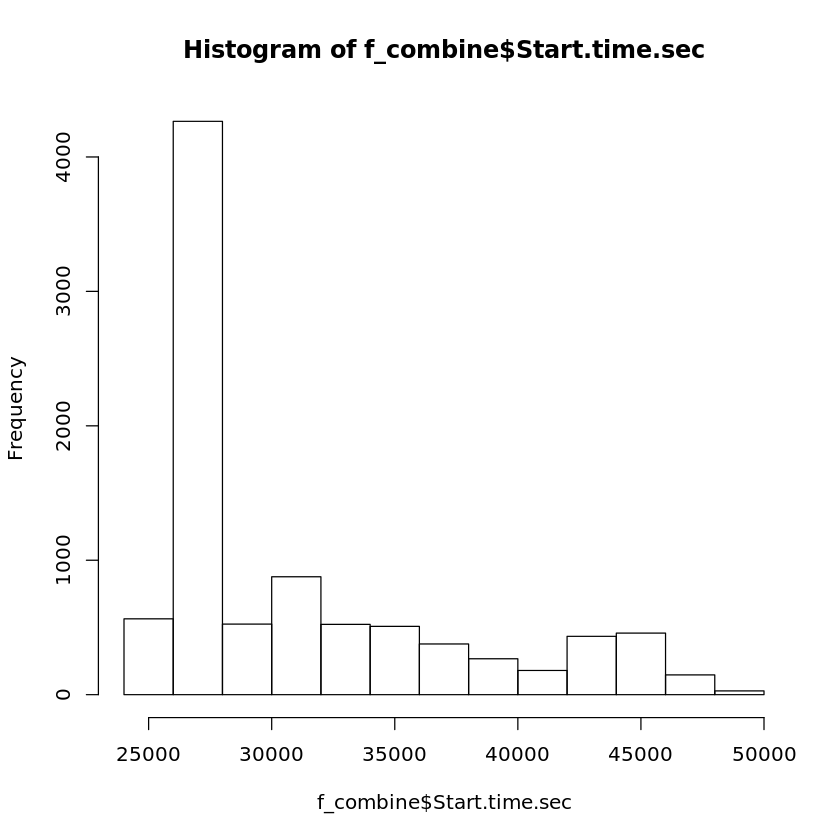

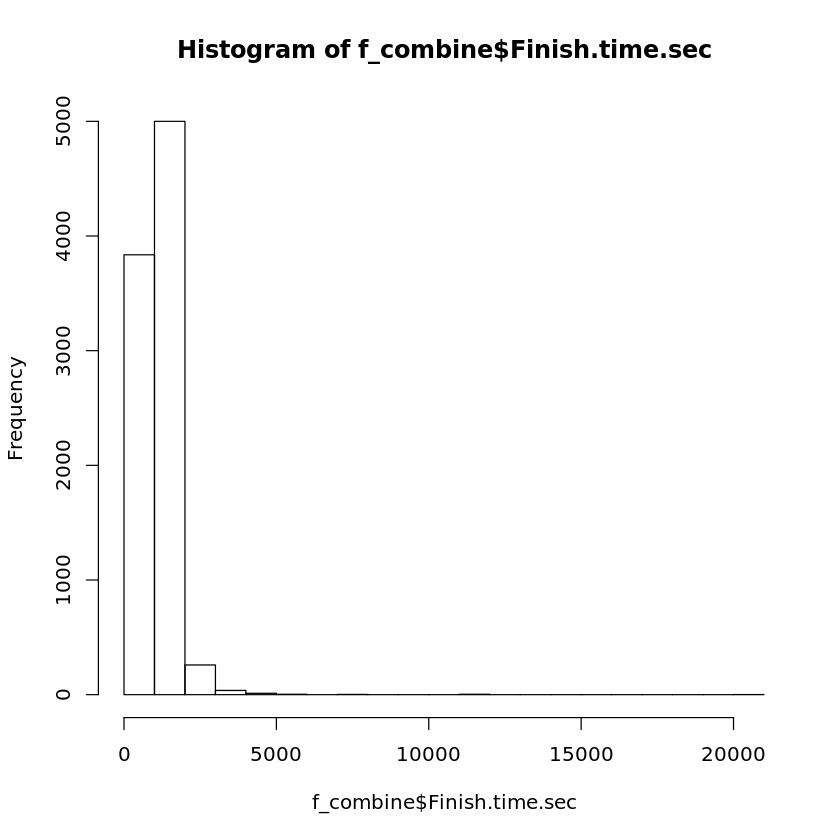

In [55]:
# Check the distribution (histogram) of start time and finishing time of the climbers

hist(f_combine$Start.time.sec)
hist(f_combine$Finish.time.sec)

In [56]:
# Something stands out here.
# A very huge number of climbers (more than 4000!) started their climb at around 26000s - 28000s (i.e. 7.13am - 7.47am)
# Let's check exactly how many climbers started in this span of about 30 mins 

nrow(f_combine[f_combine$Start.time.sec < 28000 & f_combine$Start.time.sec > 26000,])

[1] 4264

Results:

(1) There is a serious imbalance in the start time and this hugely differs from the stated staggered wave time as published by the organizers.

(2) If it follows the stated staggered wave time as published, there would have been only a maximum of about 2 waves (since each wave is 15 mins) x 80 climbers x 7 years (2010-2016) = 1120 climbers during that time span. The staircase is highly likely to be congested during this time.

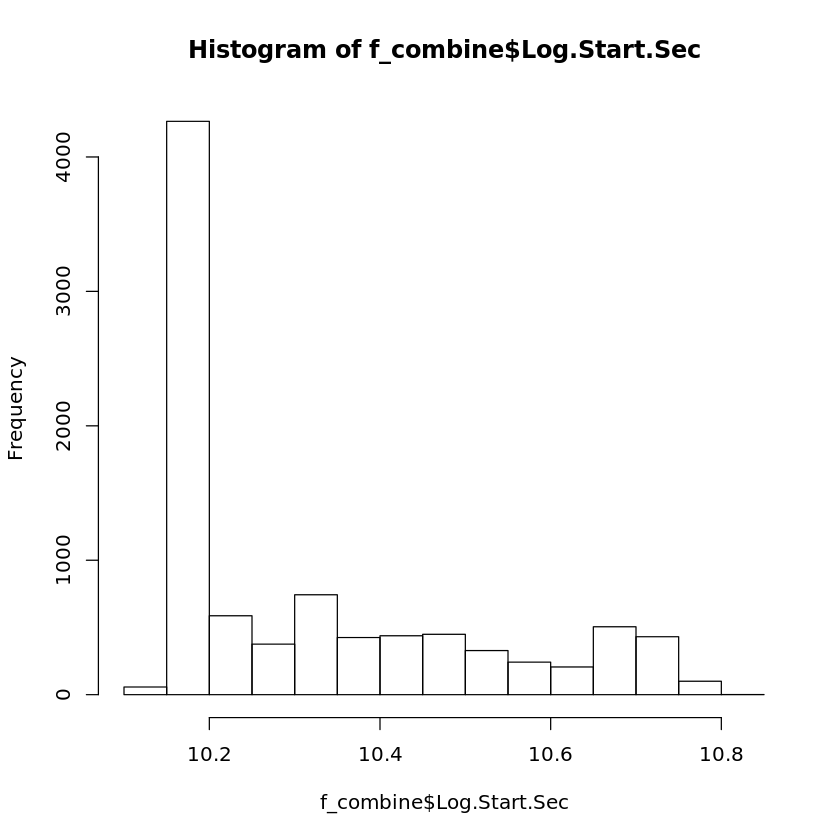

In [57]:
# The distribution (histogram) after log transform of start time and finishing time of the climbers

hist(f_combine$Log.Start.Sec)
hist(f_combine$Log.Fin.Sec)

summary statistics
------
min:  10.11767   max:  10.80505 
median:  10.212 
mean:  10.32324 
estimated sd:  0.1866328 
estimated skewness:  0.9824356 
estimated kurtosis:  2.599405 

summary statistics
------
min:  6.118097   max:  9.930908 
median:  6.956545 
mean:  6.999802 
estimated sd:  0.2974038 
estimated skewness:  1.123917 
estimated kurtosis:  7.041659 

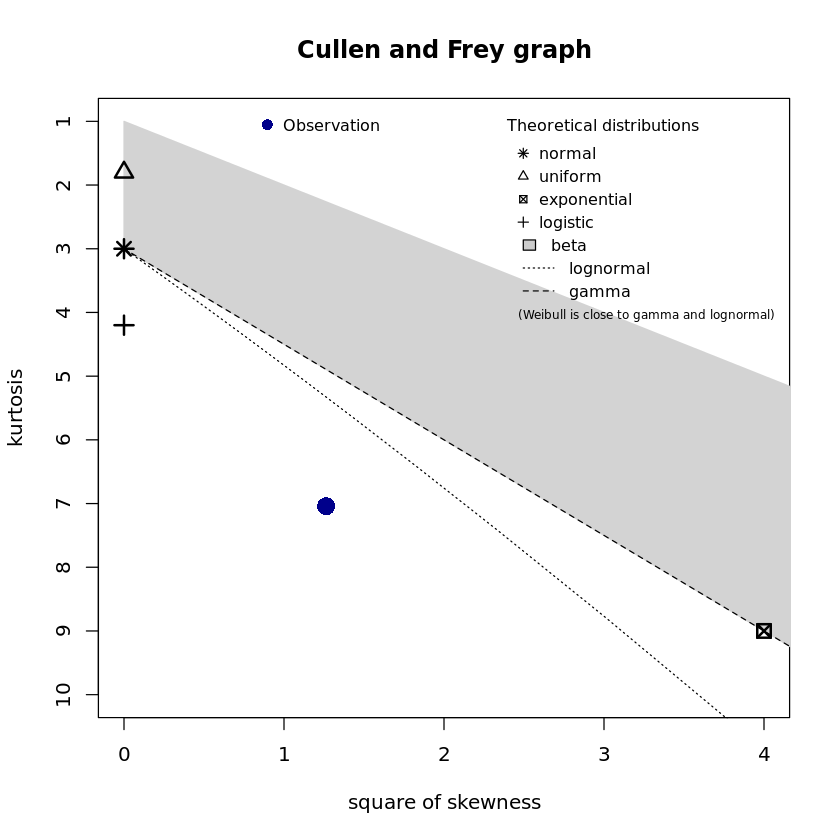

In [58]:
descdist(Log.Start.Sec, discrete = FALSE)
descdist(Log.Fin.Sec, discrete = FALSE)

**5. Regression: Predicting Finishing Times - Effects of Gender, Category, and Start Time**


Call:
glm(formula = f_combine$Log.Fin.Sec ~ f_combine$Gender + f_combine$Category + 
    f_combine$Log.Start.Sec, family = gaussian, data = f_combine)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.70881  -0.18176  -0.04722   0.13358   2.91820  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  4.521410   0.161275  28.035  < 2e-16 ***
f_combine$GenderMale        -0.170086   0.005773 -29.462  < 2e-16 ***
f_combine$Category19-29 yrs  0.011063   0.014650   0.755  0.45018    
f_combine$Category30-39 yrs  0.011065   0.014663   0.755  0.45053    
f_combine$Category40-49 yrs  0.006868   0.015271   0.450  0.65291    
f_combine$Category50 yrs +   0.054270   0.017062   3.181  0.00147 ** 
f_combine$CategoryElite     -0.460853   0.031154 -14.793  < 2e-16 ***
f_combine$Log.Start.Sec      0.248007   0.015533  15.966  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion

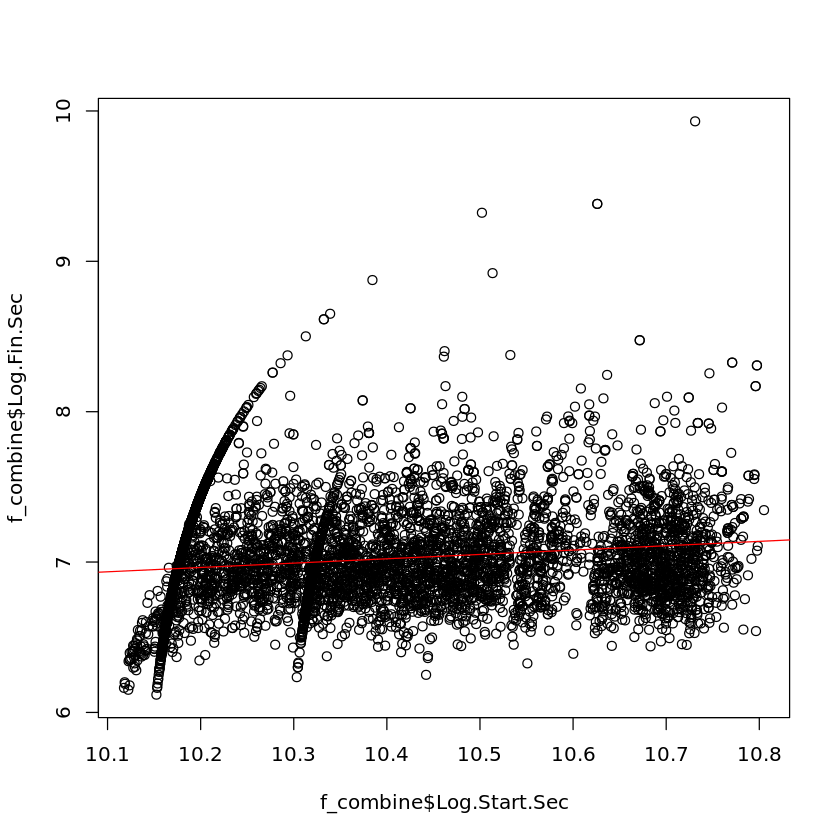

In [59]:
# Predictors of finishing times

# Let's check the linear regression of the finishing time with these predictors (Gender, Category, Start time)

overall.reg = glm(f_combine$Log.Fin.Sec ~ f_combine$Gender + f_combine$Category + f_combine$Log.Start.Sec, gaussian, f_combine)
plot(f_combine$Log.Start.Sec, f_combine$Log.Fin.Sec)
abline(lm(f_combine$Log.Fin.Sec ~ f_combine$Log.Start.Sec), col = "red")
summary(overall.reg)

Results: 

- extremely significant preditor of finishing times:

    (1) Gender  
    
    (2) Category = Elite 
    
    (3) Start time 
    

- very significant preditor of finishing times

    (1) Category = 50 yrs +

Something interesting here. Is there more to start time?



Call:
glm(formula = f_combine[f_combine$Category == "Elite", ]$Log.Fin.Sec ~ 
    f_combine[f_combine$Category == "Elite", ]$Gender + f_combine[f_combine$Category == 
        "Elite", ]$Log.Start.Sec, family = gaussian, data = f_combine[f_combine$Category == 
    "Elite", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.26381  -0.07199   0.00619   0.06647   0.66980  

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                                1.8536     2.4118
f_combine[f_combine$Category == "Elite", ]$GenderMale     -0.2295     0.0292
f_combine[f_combine$Category == "Elite", ]$Log.Start.Sec   0.4686     0.2372
                                                         t value Pr(>|t|)    
(Intercept)                                                0.769   0.4441    
f_combine[f_combine$Category == "Elite", ]$GenderMale     -7.861 5.91e-12 ***
f_combine[f_combine$Category == "Elite", ]

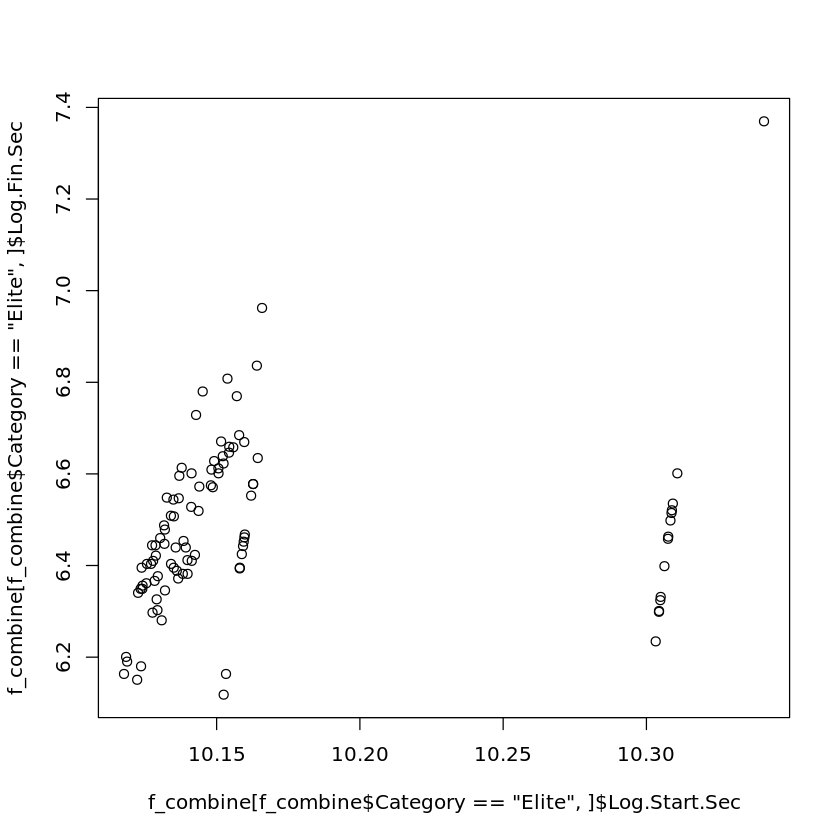

In [60]:
# Let's check the linear regression of the finishing time for the Elite climbers with these predictors (Gender, Start time)

elite.reg = glm(f_combine[f_combine$Category == "Elite",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "Elite",]$Gender + f_combine[f_combine$Category == "Elite",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "Elite",])
plot(f_combine[f_combine$Category == "Elite",]$Log.Start.Sec, f_combine[f_combine$Category == "Elite",]$Log.Fin.Sec)
summary(elite.reg)

Results:

(1) Although the published start time for Elite climbers is 6.45am (ln 24300 = 10.0982) - 7.00am (ln 25200 = 10.1346), apparently there are Elite climbers who start later, with some as later as after 8.15am (ln 29733 = 10.3)
    
(2) Gender affects finishing time extremely significantly  
    
(3) Start time just barely have a significant effect (0.0511) on the finishing time(but that could be due to the small group of Elites that start later which affect the regression result)


In [61]:
# Let's check the Elites' start time to see whether these later start times occurred in random years 
# (i.e. some Elites probably missed the original start time and started later)
# or in some particular years (indicating a different start time for Elites in that year)

f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec > "10.30",]

X     Year Race.No Name              Time    Category Gender TOD     
12    1629 2010 107     Scott MCTAGGART   0:08:30 Elite    Male   8:17:09 
22    2120 2010 111     Adam RYAN         0:09:04 Elite    Male   8:17:43 
23    3120 2010 110     Michael HOSKING   0:09:05 Elite    Male   8:17:44 
28    4120 2010 108     Scott MCGRAW      0:09:18 Elite    Male   8:17:57 
31    5120 2010 106     Daryl SUTER       0:09:22 Elite    Male   8:18:01 
69    6120 2010 112     Stephen BROWN     0:10:01 Elite    Male   8:18:40 
154   7120 2010 100     Chris PRICE       0:10:38 Elite    Male   8:19:17 
162   8119 2010 114     Victoria MITCHELL 0:10:41 Elite    Female 8:19:20 
192  10120 2010 103     Jessamy HOSKING   0:11:04 Elite    Female 8:19:43 
224  14109 2010 109     Troy DE HAAS      0:11:15 Elite    Male   8:19:54 
240   1820 2010 101     Bronwyn HUMPHRYS  0:11:19 Elite    Female 8:19:58 
277   2219 2010 102     Geoff CASE        0:11:29 Elite    Male   8:20:08 
494   3720 2010 105     Tzu-hsuan CHU     0:12:16 Elite    Male   8:20:55 
8197 12531 2015 535     Nicole KEILY      26:27   Elite    Female 08:36:18
     Start.time.sec Finish.time.sec Log.Start.Sec Log.Fin.Sec
12   29829           510            10.30324      6.234411   
22   29863           544            10.30438      6.298949   
23   29864           545            10.30441      6.300786   
28   29877           558            10.30484      6.324359   
31   29881           562            10.30498      6.331502   
69   29920           601            10.30628      6.398595   
154  29957           638            10.30752      6.458338   
162  29960           641            10.30762      6.463029   
192  29983           664            10.30839      6.498282   
224  29994           675            10.30875      6.514713   
240  29998           679            10.30889      6.520621   
277  30008           689            10.30922      6.535241   
494  30055           736            10.31078      6.601230   
8197 30978          1587            10.34103      7.369601

In [62]:
f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20" & f_combine$Year == "2010",]

X Year Race.No Name Time Category Gender TOD Start.time.sec
     Finish.time.sec Log.Start.Sec Log.Fin.Sec

It seems the latter is true; the Elites seem to have a different start time in 2010 compared to other years
The odd single climber in 2015 could be one who missed the earlier start time and started later.

In [63]:
# Let's now check the linear regression of the finishing time for the Elite climbers (except 2010) with these predictors (Gender, Start time)

elite_usual.reg = glm(f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20",]$Gender + f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20",])
plot(f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20",]$Log.Start.Sec, f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20",]$Log.Fin.Sec)
abline(lm(f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20",]$Log.Fin.Sec ~f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20",]$Log.Start.Sec), col = "red")
summary(elite_usual.reg)


Call:
glm(formula = f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < 
    "10.20", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == 
    "Elite" & f_combine$Log.Start.Sec < "10.20", ]$Gender + f_combine[f_combine$Category == 
    "Elite" & f_combine$Log.Start.Sec < "10.20", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "Elite" & f_combine$Log.Start.Sec < "10.20", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.34910  -0.05928   0.00632   0.06241   0.26906  

Coefficients:
                                                                                              Estimate
(Intercept)                                                                                  -43.55855
f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20", ]$GenderMale     -0.15976
f_combine[f_combine$Category == "Elite" & f_combine$Log.Start.Sec < "10.20", ]$Log.Start.Sec   4.94319
                  

Results:

(1) Gender affects finishing time extremely significantly.

(2) Interestingly, start time also affects the Elites' finishing time extremely significantly.

In [64]:
# Let's see whether start time affect the finishing times of non-Elite climbers.

# Let's check the linear regression of the finishing time with these predictors (Gender, Category, Start time)

start_time.reg = glm(f_combine[f_combine$Category != "Elite",]$Log.Fin.Sec ~ f_combine[f_combine$Category != "Elite",]$Gender + f_combine[f_combine$Category != "Elite",]$Category + f_combine[f_combine$Category != "Elite",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category != "Elite",])
plot(f_combine[f_combine$Category != "Elite",]$Log.Start.Sec, f_combine[f_combine$Category != "Elite",]$Log.Fin.Sec)
abline(lm(f_combine[f_combine$Category != "Elite",]$Log.Fin.Sec ~ f_combine[f_combine$Category != "Elite",]$Log.Start.Sec), col = "red")
summary(start_time.reg)



Call:
glm(formula = f_combine[f_combine$Category != "Elite", ]$Log.Fin.Sec ~ 
    f_combine[f_combine$Category != "Elite", ]$Gender + f_combine[f_combine$Category != 
        "Elite", ]$Category + f_combine[f_combine$Category != 
        "Elite", ]$Log.Start.Sec, family = gaussian, data = f_combine[f_combine$Category != 
    "Elite", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.70914  -0.18282  -0.04843   0.13479   2.91801  

Coefficients:
                                                              Estimate
(Intercept)                                                   4.523026
f_combine[f_combine$Category != "Elite", ]$GenderMale        -0.169468
f_combine[f_combine$Category != "Elite", ]$Category19-29 yrs  0.011086
f_combine[f_combine$Category != "Elite", ]$Category30-39 yrs  0.011083
f_combine[f_combine$Category != "Elite", ]$Category40-49 yrs  0.006889
f_combine[f_combine$Category != "Elite", ]$Category50 yrs +   0.054272
f_combine[f_combine$Cate

Results:

(1) Interesting. Start time does affect finishing time extremely significantly of the non-Elite climbers.

(2) Additionally, for the non-Elite climbers:

 - age 50 yrs + affects finishing time very significantly
    
 - gender affects finishing time extremely significantly



Call:
glm(formula = f_combine[f_combine$Category == "12-18 yrs", ]$Log.Fin.Sec ~ 
    f_combine[f_combine$Category == "12-18 yrs", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "12-18 yrs", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.58697  -0.19121  -0.04798   0.15045   2.83562  

Coefficients:
                                                             Estimate
(Intercept)                                                   4.21796
f_combine[f_combine$Category == "12-18 yrs", ]$Log.Start.Sec  0.26813
                                                             Std. Error t value
(Intercept)                                                     0.80560   5.236
f_combine[f_combine$Category == "12-18 yrs", ]$Log.Start.Sec    0.07794   3.440
                                                             Pr(>|t|)    
(Intercept)                                                  2.67e-07 ***
f_combine[f_combine$Catego

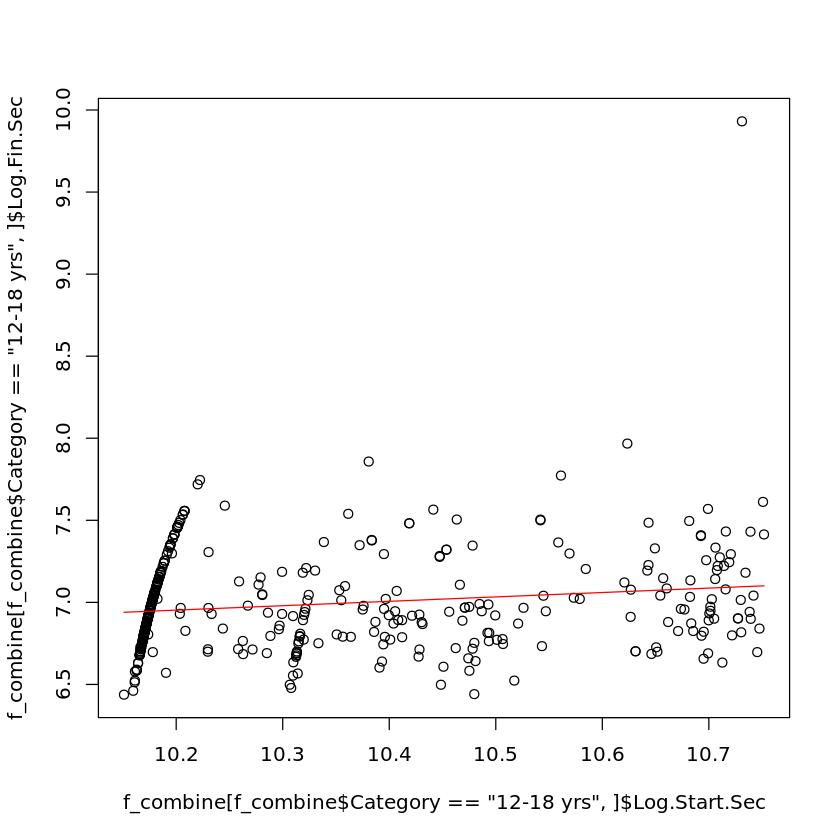


Call:
glm(formula = f_combine[f_combine$Category == "19-29 yrs", ]$Log.Fin.Sec ~ 
    f_combine[f_combine$Category == "19-29 yrs", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "19-29 yrs", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.78703  -0.19210  -0.03754   0.15059   2.29402  

Coefficients:
                                                             Estimate
(Intercept)                                                   4.18140
f_combine[f_combine$Category == "19-29 yrs", ]$Log.Start.Sec  0.27354
                                                             Std. Error t value
(Intercept)                                                     0.29086  14.376
f_combine[f_combine$Category == "19-29 yrs", ]$Log.Start.Sec    0.02821   9.698
                                                             Pr(>|t|)    
(Intercept)                                                    <2e-16 ***
f_combine[f_combine$Catego

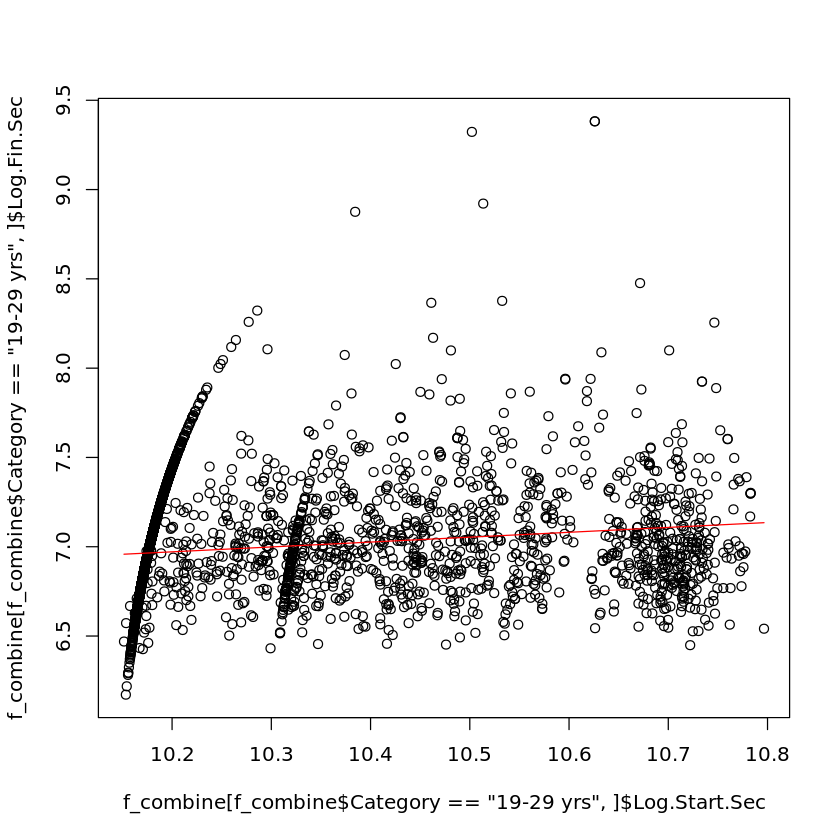


Call:
glm(formula = f_combine[f_combine$Category == "30-39 yrs", ]$Log.Fin.Sec ~ 
    f_combine[f_combine$Category == "30-39 yrs", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "30-39 yrs", ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7578  -0.1916  -0.0348   0.1454   1.5014  

Coefficients:
                                                             Estimate
(Intercept)                                                    3.7922
f_combine[f_combine$Category == "30-39 yrs", ]$Log.Start.Sec   0.3110
                                                             Std. Error t value
(Intercept)                                                      0.2891   13.12
f_combine[f_combine$Category == "30-39 yrs", ]$Log.Start.Sec     0.0280   11.11
                                                             Pr(>|t|)    
(Intercept)                                                    <2e-16 ***
f_combine[f_combine$Category == "30-

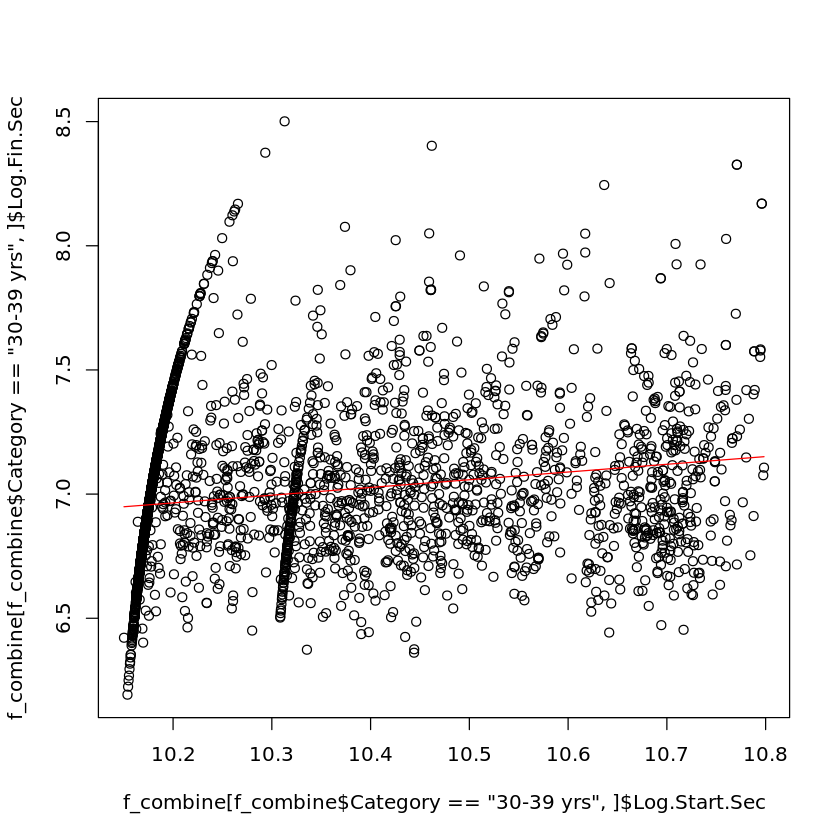


Call:
glm(formula = f_combine[f_combine$Category == "40-49 yrs", ]$Log.Fin.Sec ~ 
    f_combine[f_combine$Category == "40-49 yrs", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "40-49 yrs", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.77211  -0.18657  -0.04821   0.15118   1.64881  

Coefficients:
                                                             Estimate
(Intercept)                                                   5.02640
f_combine[f_combine$Category == "40-49 yrs", ]$Log.Start.Sec  0.19112
                                                             Std. Error t value
(Intercept)                                                     0.37009  13.581
f_combine[f_combine$Category == "40-49 yrs", ]$Log.Start.Sec    0.03577   5.343
                                                             Pr(>|t|)    
(Intercept)                                                   < 2e-16 ***
f_combine[f_combine$Catego

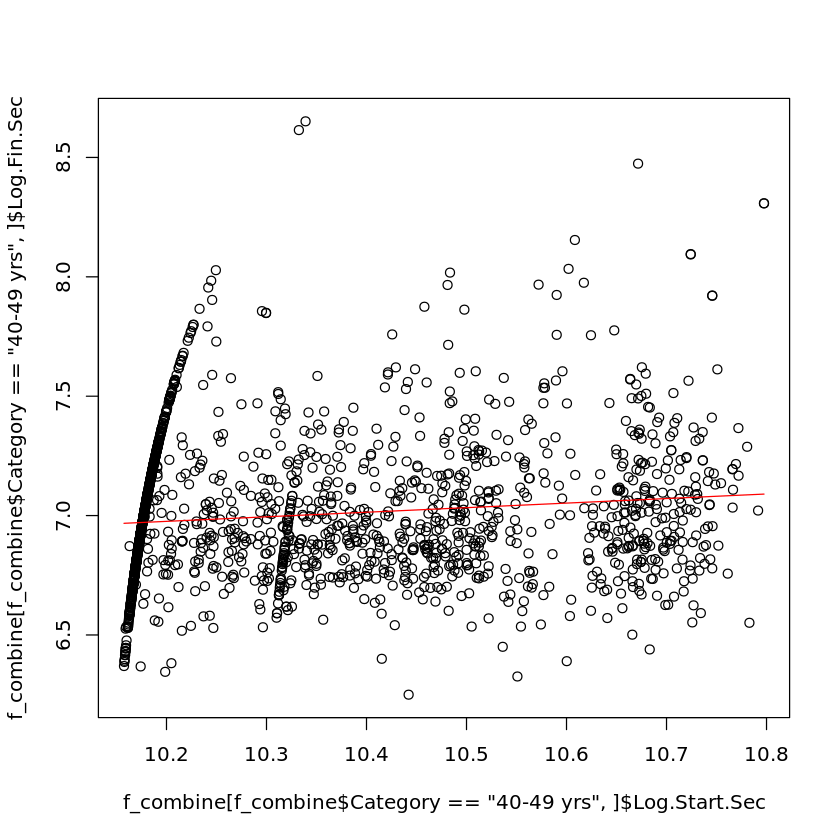


Call:
glm(formula = f_combine[f_combine$Category == "50 yrs +", ]$Log.Fin.Sec ~ 
    f_combine[f_combine$Category == "50 yrs +", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "50 yrs +", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.62901  -0.18232  -0.05301   0.15548   1.57095  

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                                  4.82814    0.60997
f_combine[f_combine$Category == "50 yrs +", ]$Log.Start.Sec  0.21438    0.05898
                                                            t value Pr(>|t|)
(Intercept)                                                   7.915 8.89e-15
f_combine[f_combine$Category == "50 yrs +", ]$Log.Start.Sec   3.635 0.000297
                                                               
(Intercept)                                                 ***
f_combine[f_combine$Category

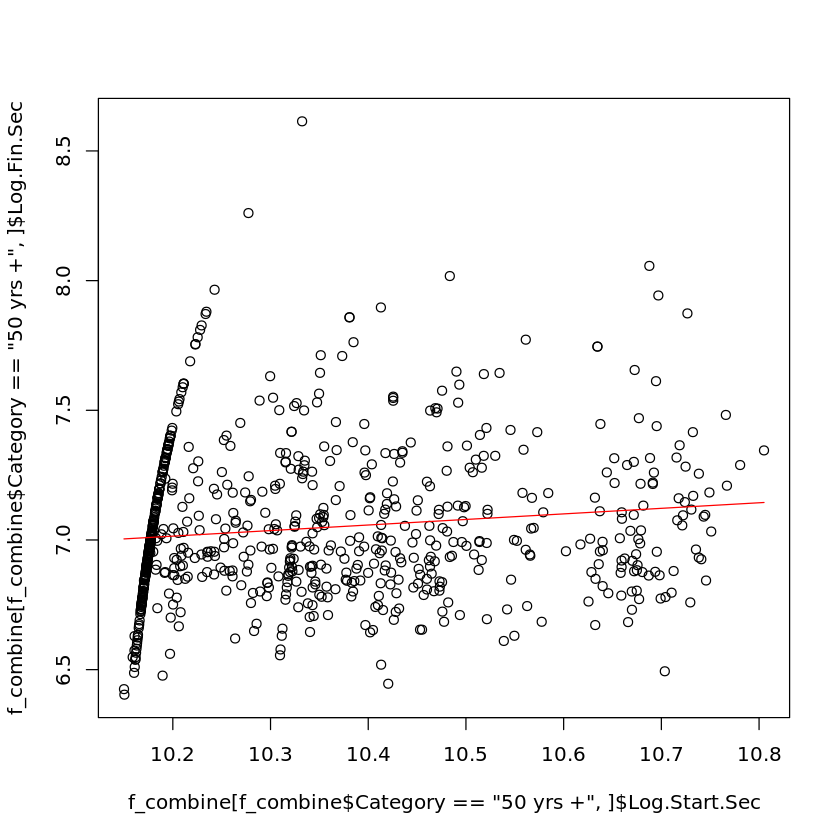

In [65]:
# Let's see how it affects the different age groups

# 12-18 yrs
age_group1.reg = glm(f_combine[f_combine$Category == "12-18 yrs",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "12-18 yrs",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "12-18 yrs",])
plot(f_combine[f_combine$Category == "12-18 yrs",]$Log.Start.Sec, f_combine[f_combine$Category == "12-18 yrs",]$Log.Fin.Sec)
lines(fitted(age_group1.reg) ~ f_combine[f_combine$Category == "12-18 yrs",]$Log.Start.Sec, col="red")
summary(age_group1.reg)

# 19-29 yrs
age_group2.reg = glm(f_combine[f_combine$Category == "19-29 yrs",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "19-29 yrs",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "19-29 yrs",])
plot(f_combine[f_combine$Category == "19-29 yrs",]$Log.Start.Sec, f_combine[f_combine$Category == "19-29 yrs",]$Log.Fin.Sec)
lines(fitted(age_group2.reg) ~ f_combine[f_combine$Category == "19-29 yrs",]$Log.Start.Sec, col="red")
summary(age_group2.reg)

# 30-39 yrs
age_group3.reg = glm(f_combine[f_combine$Category == "30-39 yrs",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "30-39 yrs",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "30-39 yrs",])
plot(f_combine[f_combine$Category == "30-39 yrs",]$Log.Start.Sec, f_combine[f_combine$Category == "30-39 yrs",]$Log.Fin.Sec)
lines(fitted(age_group3.reg) ~ f_combine[f_combine$Category == "30-39 yrs",]$Log.Start.Sec, col="red")
summary(age_group3.reg)

# 40-49 yrs
age_group4.reg = glm(f_combine[f_combine$Category == "40-49 yrs",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "40-49 yrs",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "40-49 yrs",])
plot(f_combine[f_combine$Category == "40-49 yrs",]$Log.Start.Sec, f_combine[f_combine$Category == "40-49 yrs",]$Log.Fin.Sec)
lines(fitted(age_group4.reg) ~ f_combine[f_combine$Category == "40-49 yrs",]$Log.Start.Sec, col="red")
summary(age_group4.reg)

# 50 yrs +
age_group5.reg = glm(f_combine[f_combine$Category == "50 yrs +",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "50 yrs +",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "50 yrs +",])
plot(f_combine[f_combine$Category == "50 yrs +",]$Log.Start.Sec, f_combine[f_combine$Category == "50 yrs +",]$Log.Fin.Sec)
lines(fitted(age_group5.reg) ~ f_combine[f_combine$Category == "50 yrs +",]$Log.Start.Sec, col="red")
summary(age_group5.reg)

Result: 

- Start time affect finishing time extremely significantly across all age groups.


Call:
glm(formula = f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == 
    "Male", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == "12-18 yrs" & 
    f_combine$Gender == "Male", ]$Log.Start.Sec, family = gaussian, 
    data = f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == 
        "Male", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.51620  -0.15397  -0.03715   0.08613   2.88336  

Coefficients:
                                                                                          Estimate
(Intercept)                                                                                 3.1866
f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Male", ]$Log.Start.Sec   0.3598
                                                                                          Std. Error
(Intercept)                                                                                   1.0942
f_combine[f_combine$Category == "

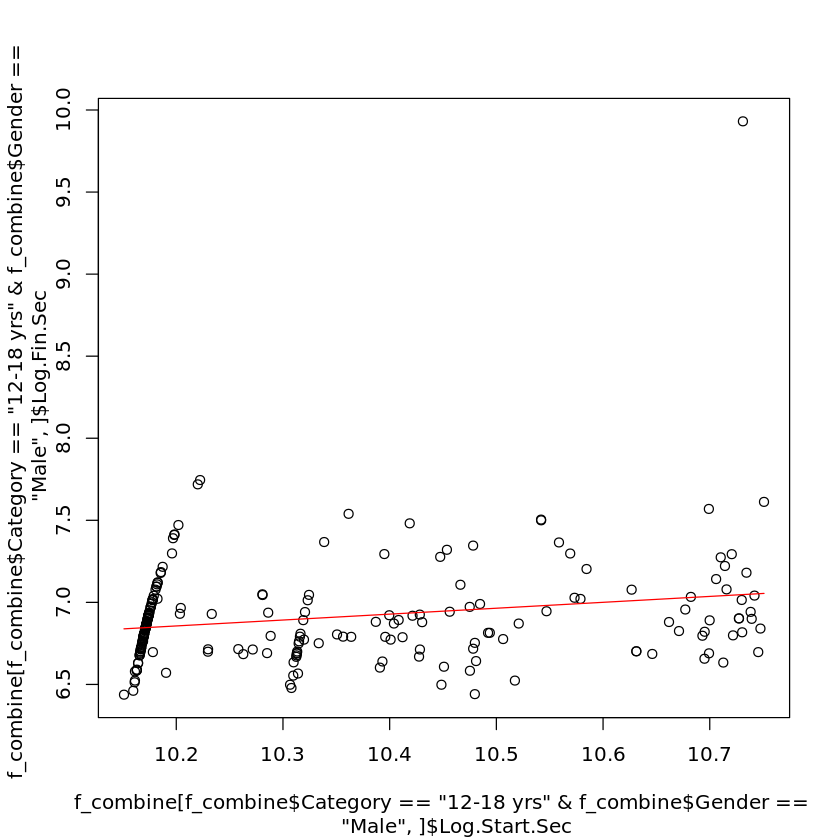


Call:
glm(formula = f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == 
    "Female", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == 
    "12-18 yrs" & f_combine$Gender == "Female", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "12-18 yrs" & f_combine$Gender == "Female", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.45516  -0.17831  -0.03046   0.17238   0.83558  

Coefficients:
                                                                                            Estimate
(Intercept)                                                                                  5.88040
f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Female", ]$Log.Start.Sec  0.11782
                                                                                            Std. Error
(Intercept)                                                                                    1.02924
f_combine[f_combi

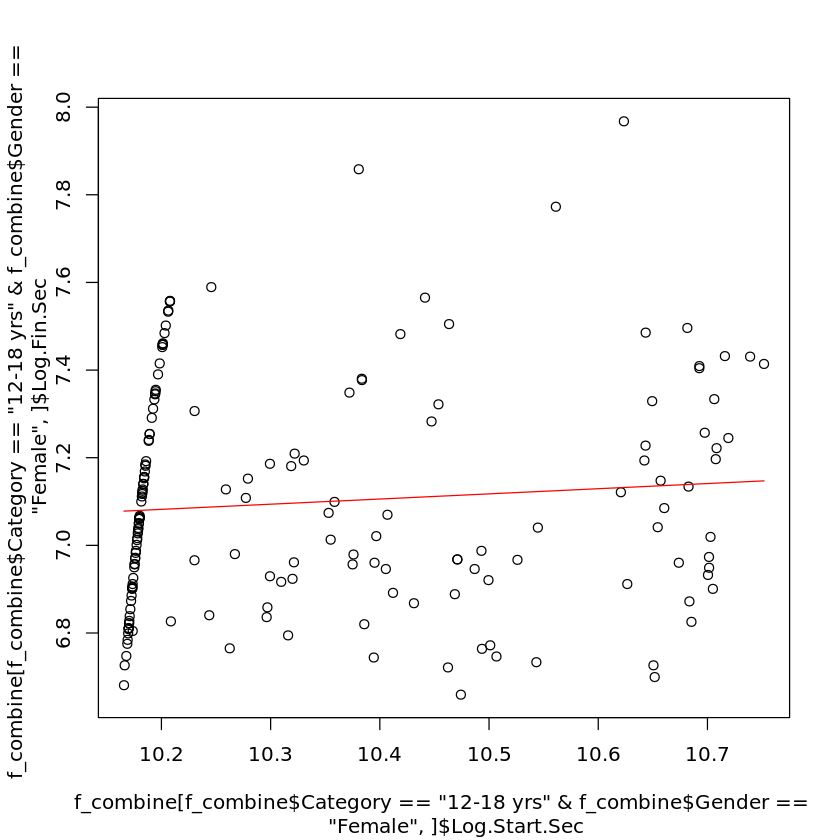


Call:
glm(formula = f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == 
    "Male", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == "19-29 yrs" & 
    f_combine$Gender == "Male", ]$Log.Start.Sec, family = gaussian, 
    data = f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == 
        "Male", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.71208  -0.18892  -0.05479   0.12379   2.38807  

Coefficients:
                                                                                          Estimate
(Intercept)                                                                                 4.5168
f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Male", ]$Log.Start.Sec   0.2331
                                                                                          Std. Error
(Intercept)                                                                                   0.3988
f_combine[f_combine$Category == "

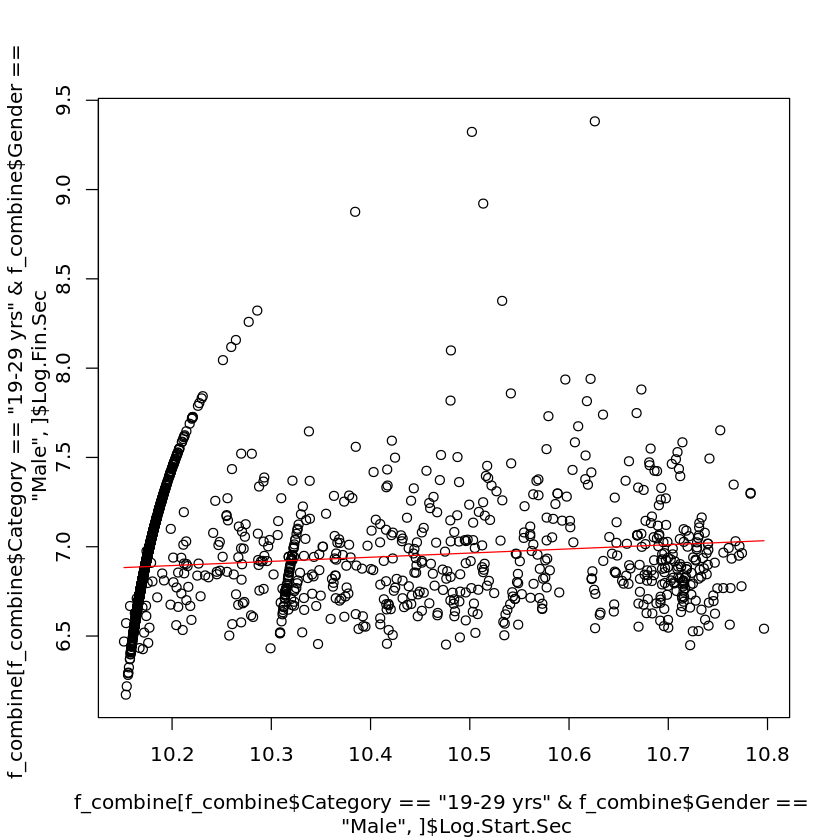


Call:
glm(formula = f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == 
    "Female", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == 
    "19-29 yrs" & f_combine$Gender == "Female", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "19-29 yrs" & f_combine$Gender == "Female", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.69354  -0.18304  -0.04883   0.13482   2.20369  

Coefficients:
                                                                                            Estimate
(Intercept)                                                                                  4.14732
f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Female", ]$Log.Start.Sec  0.28523
                                                                                            Std. Error
(Intercept)                                                                                    0.38808
f_combine[f_combi

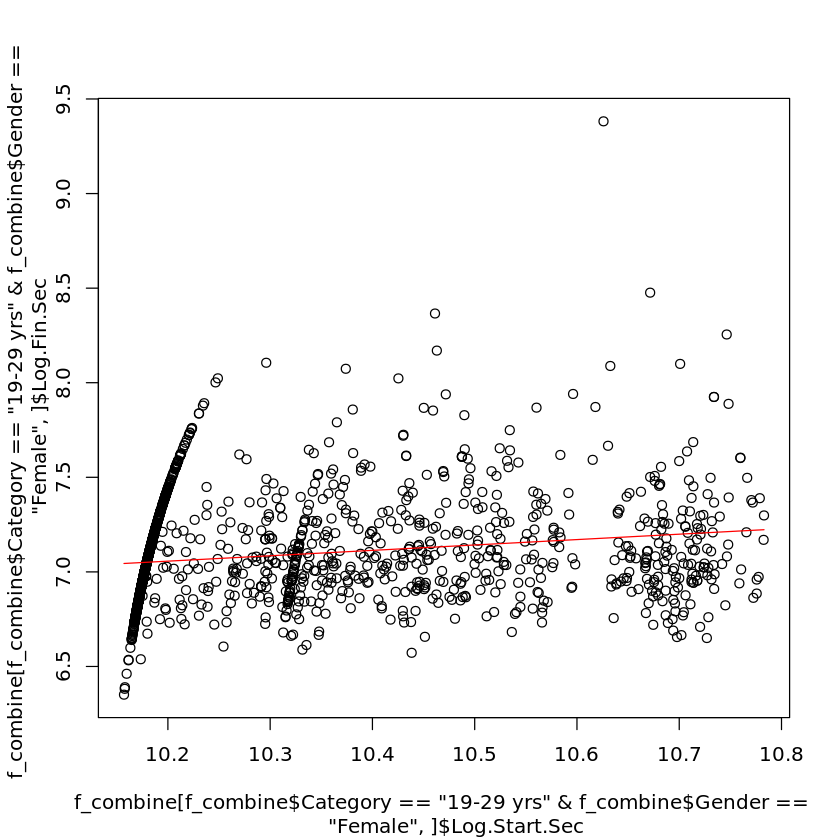


Call:
glm(formula = f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == 
    "Male", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == "30-39 yrs" & 
    f_combine$Gender == "Male", ]$Log.Start.Sec, family = gaussian, 
    data = f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == 
        "Male", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.68852  -0.17945  -0.04394   0.14765   1.57888  

Coefficients:
                                                                                          Estimate
(Intercept)                                                                                4.24572
f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Male", ]$Log.Start.Sec  0.25952
                                                                                          Std. Error
(Intercept)                                                                                  0.37610
f_combine[f_combine$Category == "

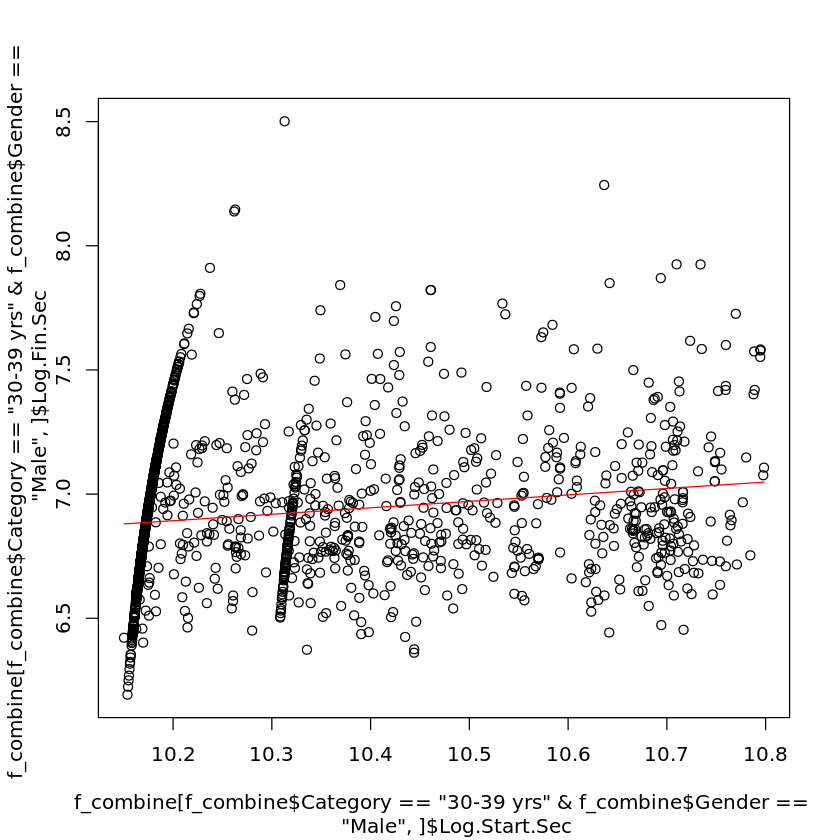


Call:
glm(formula = f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == 
    "Female", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == 
    "30-39 yrs" & f_combine$Gender == "Female", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "30-39 yrs" & f_combine$Gender == "Female", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63218  -0.18553  -0.05079   0.13471   1.29466  

Coefficients:
                                                                                            Estimate
(Intercept)                                                                                  3.79605
f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Female", ]$Log.Start.Sec  0.31904
                                                                                            Std. Error
(Intercept)                                                                                    0.41109
f_combine[f_combi

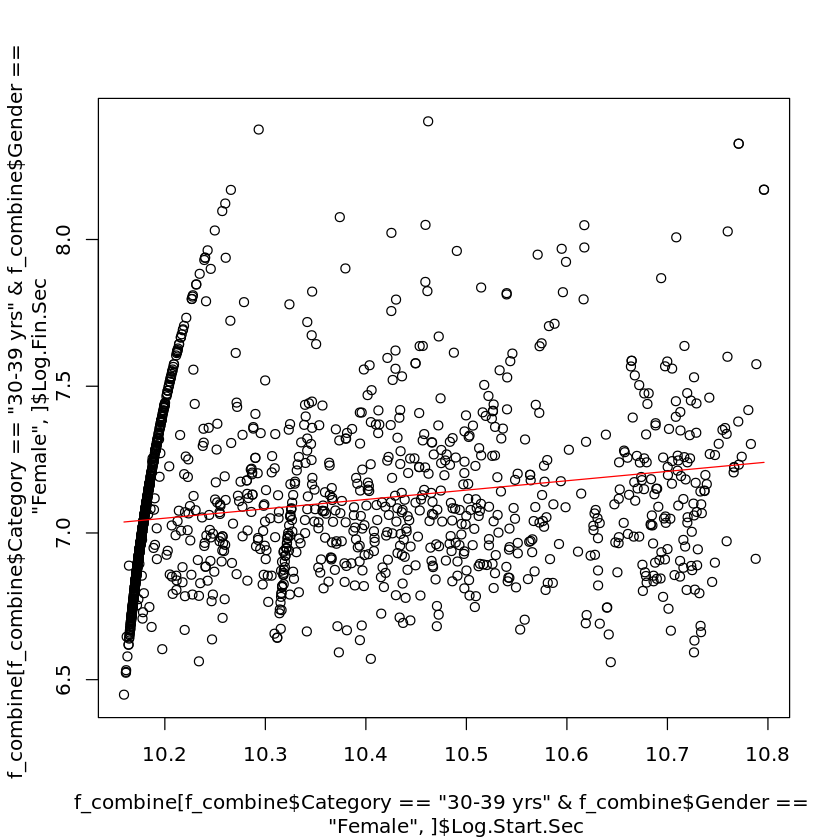


Call:
glm(formula = f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == 
    "Male", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == "40-49 yrs" & 
    f_combine$Gender == "Male", ]$Log.Start.Sec, family = gaussian, 
    data = f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == 
        "Male", ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6901  -0.1698  -0.0476   0.1246   1.7280  

Coefficients:
                                                                                          Estimate
(Intercept)                                                                                5.22717
f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Male", ]$Log.Start.Sec  0.16404
                                                                                          Std. Error
(Intercept)                                                                                  0.47600
f_combine[f_combine$Category == "40-49 yrs"

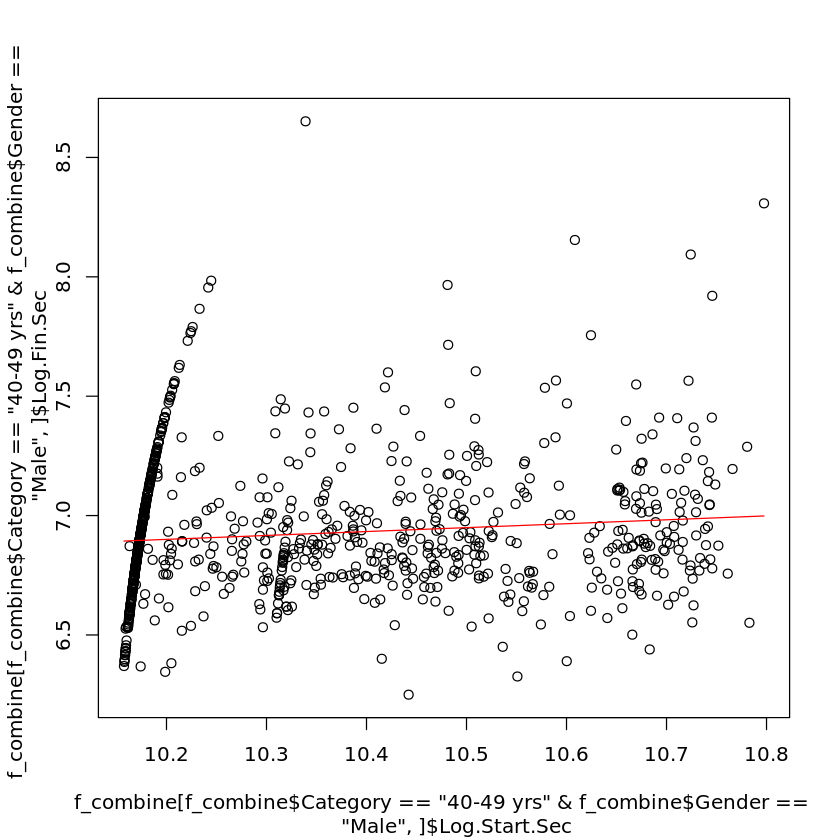


Call:
glm(formula = f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == 
    "Female", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == 
    "40-49 yrs" & f_combine$Gender == "Female", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "40-49 yrs" & f_combine$Gender == "Female", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.61276  -0.18312  -0.04983   0.14528   1.52342  

Coefficients:
                                                                                            Estimate
(Intercept)                                                                                  5.14477
f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Female", ]$Log.Start.Sec  0.18837
                                                                                            Std. Error
(Intercept)                                                                                    0.52782
f_combine[f_combi

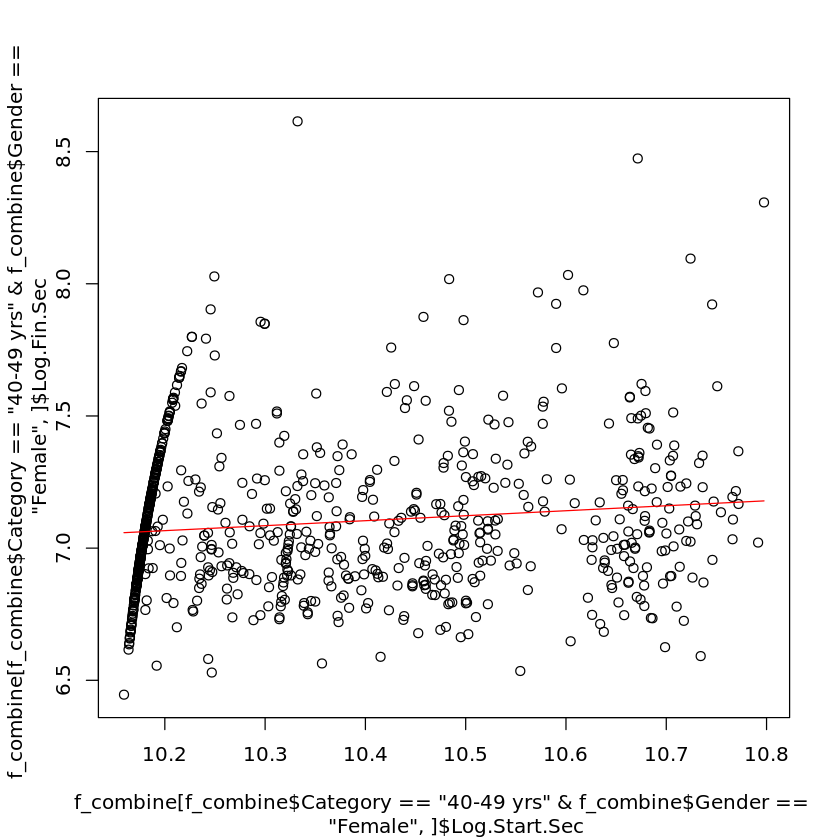


Call:
glm(formula = f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == 
    "Male", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == "50 yrs +" & 
    f_combine$Gender == "Male", ]$Log.Start.Sec, family = gaussian, 
    data = f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == 
        "Male", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.53950  -0.15412  -0.04109   0.11845   1.30735  

Coefficients:
                                                                                         Estimate
(Intercept)                                                                               5.02109
f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Male", ]$Log.Start.Sec  0.18799
                                                                                         Std. Error
(Intercept)                                                                                 0.70202
f_combine[f_combine$Category == "50 yrs +

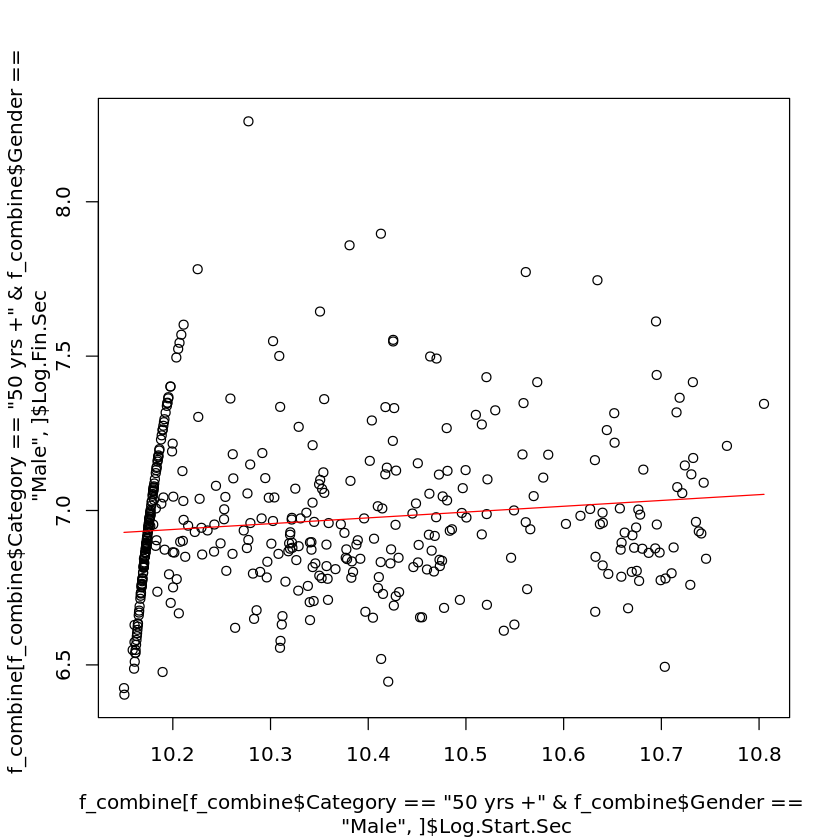


Call:
glm(formula = f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == 
    "Female", ]$Log.Fin.Sec ~ f_combine[f_combine$Category == 
    "50 yrs +" & f_combine$Gender == "Female", ]$Log.Start.Sec, 
    family = gaussian, data = f_combine[f_combine$Category == 
        "50 yrs +" & f_combine$Gender == "Female", ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.54734  -0.20079  -0.05743   0.16179   1.46949  

Coefficients:
                                                                                           Estimate
(Intercept)                                                                                 4.37149
f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Female", ]$Log.Start.Sec  0.26840
                                                                                           Std. Error
(Intercept)                                                                                   0.97762
f_combine[f_combine$Categ

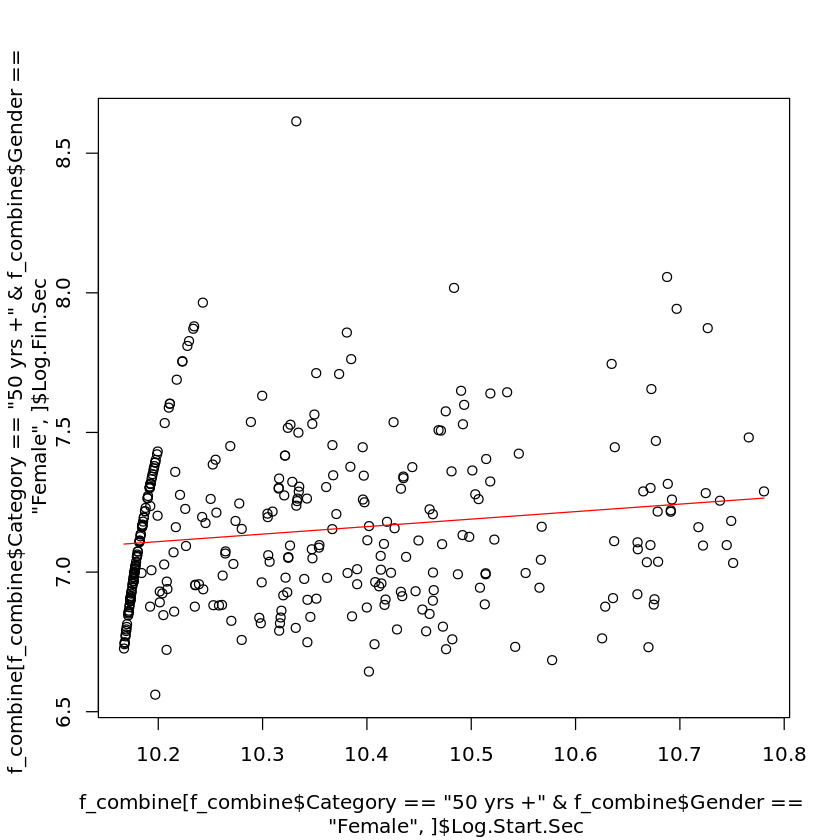

In [66]:
# Let's see how it affects the different age groups by gender

# 12-18 yrs, male
age_group1.reg = glm(f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Male",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Male",])
plot(f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Male",]$Log.Fin.Sec)
lines(fitted(age_group1.reg) ~ f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, col="red")
summary(age_group1.reg)

# 12-18 yrs, female
age_group1.reg = glm(f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Female",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Female",])
plot(f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Female",]$Log.Fin.Sec)
lines(fitted(age_group1.reg) ~ f_combine[f_combine$Category == "12-18 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, col="red")
summary(age_group1.reg)

# 19-29 yrs, male
age_group2.reg = glm(f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Male",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Male",])
plot(f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Male",]$Log.Fin.Sec)
lines(fitted(age_group2.reg) ~ f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, col="red")
summary(age_group2.reg)

# 19-29 yrs, female
age_group2.reg = glm(f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Female",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Female",])
plot(f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Female",]$Log.Fin.Sec)
lines(fitted(age_group2.reg) ~ f_combine[f_combine$Category == "19-29 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, col="red")
summary(age_group2.reg)

# 30-39 yrs, male
age_group3.reg = glm(f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Male",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Male",])
plot(f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Male",]$Log.Fin.Sec)
lines(fitted(age_group3.reg) ~ f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, col="red")
summary(age_group3.reg)

# 30-39 yrs, female
age_group3.reg = glm(f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Female",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Female",])
plot(f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Female",]$Log.Fin.Sec)
lines(fitted(age_group3.reg) ~ f_combine[f_combine$Category == "30-39 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, col="red")
summary(age_group3.reg)

# 40-49 yrs, male
age_group4.reg = glm(f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Male",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Male",])
plot(f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Male",]$Log.Fin.Sec)
lines(fitted(age_group4.reg) ~ f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Male",]$Log.Start.Sec, col="red")
summary(age_group4.reg)

# 40-49 yrs, female
age_group4.reg = glm(f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Female",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Female",])
plot(f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Female",]$Log.Fin.Sec)
lines(fitted(age_group4.reg) ~ f_combine[f_combine$Category == "40-49 yrs" & f_combine$Gender == "Female",]$Log.Start.Sec, col="red")
summary(age_group4.reg)

# 50 yrs +, male
age_group5.reg = glm(f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Male",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Male",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Male",])
plot(f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Male",]$Log.Start.Sec, f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Male",]$Log.Fin.Sec)
lines(fitted(age_group5.reg) ~ f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Male",]$Log.Start.Sec, col="red")
summary(age_group5.reg)

# 50 yrs +, female
age_group5.reg = glm(f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Female",]$Log.Fin.Sec ~ f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Female",]$Log.Start.Sec, gaussian, f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Female",])
plot(f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Female",]$Log.Start.Sec, f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Female",]$Log.Fin.Sec)
lines(fitted(age_group5.reg) ~ f_combine[f_combine$Category == "50 yrs +" & f_combine$Gender == "Female",]$Log.Start.Sec, col="red")
summary(age_group5.reg)

Result: 

- Start time affect finishing time extremely/very significantly across all age groups for each gender except
"12-18 yrs, female".

**6. Regression: Predicting Gender based on Category and Finishing Time**

In [67]:
# Predictors of gender

# Let's check the logistic regression of Gender with these predictors (Category, Finish time)

log.reg = glm(f_combine$Gender ~ f_combine$Category + f_combine$Log.Fin.Sec, binomial, f_combine)
summary(log.reg)



Call:
glm(formula = f_combine$Gender ~ f_combine$Category + f_combine$Log.Fin.Sec, 
    family = binomial, data = f_combine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8827  -1.1605   0.7446   1.0173   3.6578  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 16.71793    0.62078  26.931  < 2e-16 ***
f_combine$Category19-29 yrs -0.16329    0.11213  -1.456    0.145    
f_combine$Category30-39 yrs -0.10541    0.11230  -0.939    0.348    
f_combine$Category40-49 yrs -0.09060    0.11688  -0.775    0.438    
f_combine$Category50 yrs +   0.13283    0.13084   1.015    0.310    
f_combine$CategoryElite     -1.02210    0.23961  -4.266 1.99e-05 ***
f_combine$Log.Fin.Sec       -2.35694    0.08758 -26.913  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12656  on 9152  degrees of freedom
Residual devi

Results: 

- extremely significant predictors of gender:

    (1) Finishing time
    
    (2) Category = Elite 

**7. k-means Clustering**

In [68]:
# Let's do some machine learning on the data now

# Give the dataframe a new name
newf = read.csv('f_combine.csv')

In [69]:
head(newf,10)

X    Year Race.No Name          Time    Category  Gender TOD     
1  1617 2013 101     Mark BOURNE   0:07:34 Elite     Male   7:07:34 
2  1614 2014 101     Mark BOURNE   7:49    Elite     Male   06:54:51
3  1603 2015 101     Mark BOURNE   7:55    Elite     Male   06:52:57
4  2104 2013 102     Darren WILSON 0:07:55 Elite     Male   7:07:55 
5  1620 2012 100     Mark BOURNE   0:07:59 19-29 yrs Male   7:07:59 
6  2102 2014 102     Darren WILSON 8:03    Elite     Male   06:55:25
7  2100 2015 102     Darren WILSON 8:08    Elite     Male   06:53:24
8  2106 2012 101     Darren WILSON 0:08:09 30-39 yrs Male   7:08:09 
9     1 2016 101     Mark BOURNE   8:13    Elite     Male   06:53:15
10 1626 2011 113     Mark BOURNE   0:08:22 19-29 yrs Male   7:08:22 
   Start.time.sec Finish.time.sec Log.Start.Sec Log.Fin.Sec
1  25654          454             10.15245      6.118097   
2  24891          469             10.12226      6.150603   
3  24777          475             10.11767      6.163315   
4  25675          475             10.15327      6.163315   
5  25679          479             10.15343      6.171701   
6  24925          483             10.12363      6.180017   
7  24804          488             10.11876      6.190315   
8  25689          489             10.15382      6.192362   
9  24795          493             10.11840      6.200509   
10 25702          502             10.15432      6.218600

In [70]:
# Recoding the categorical variables into numeric values(kmeans cannot deal with categorical variables)

newf$Gender <- recode(newf$Gender, "'Male' = '0'")
newf$Gender <- recode(newf$Gender, "'Female' = '1'")
newf$Category <- recode(newf$Category, "'Elite' = '6'")
newf$Category <- recode(newf$Category, "'50 yrs +' = '5'")
newf$Category <- recode(newf$Category, "'40-49 yrs' = '4'")
newf$Category <- recode(newf$Category, "'30-39 yrs' = '3'")
newf$Category <- recode(newf$Category, "'19-29 yrs' = '2'")
newf$Category <- recode(newf$Category, "'12-18 yrs' = '1'")

In [71]:
head(newf,5)

X    Year Race.No Name          Time    Category Gender TOD     
1 1617 2013 101     Mark BOURNE   0:07:34 6        0      7:07:34 
2 1614 2014 101     Mark BOURNE   7:49    6        0      06:54:51
3 1603 2015 101     Mark BOURNE   7:55    6        0      06:52:57
4 2104 2013 102     Darren WILSON 0:07:55 6        0      7:07:55 
5 1620 2012 100     Mark BOURNE   0:07:59 2        0      7:07:59 
  Start.time.sec Finish.time.sec Log.Start.Sec Log.Fin.Sec
1 25654          454             10.15245      6.118097   
2 24891          469             10.12226      6.150603   
3 24777          475             10.11767      6.163315   
4 25675          475             10.15327      6.163315   
5 25679          479             10.15343      6.171701

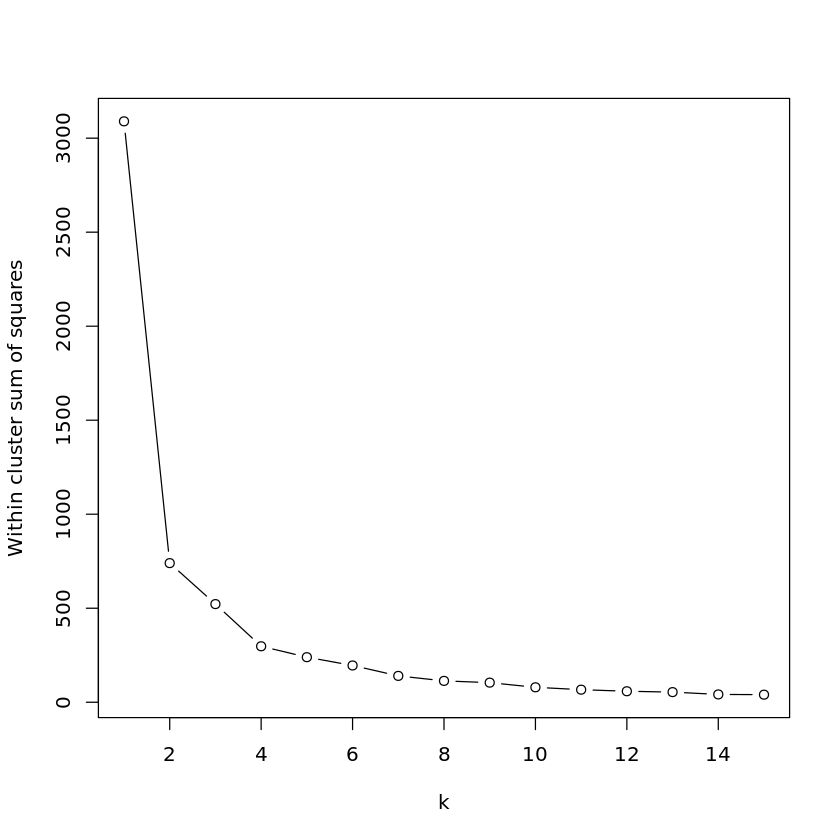

In [72]:
# Let's do kmeans clustering
# Cluster by gender, finishing time

# Let's determine how many clusters are optimum 
# Use the elbow method

# Code modified from http://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters

set.seed(20)
wss <- (nrow(newf[,c(7,12)])-1)*sum(apply(newf[,c(7,12)],2,var))
for (i in 2:15) wss[i] <- sum(kmeans(newf[,c(7,12)], centers=i)$withinss)
plot(1:15, wss, type="b", xlab="k", ylab="Within cluster sum of squares")

In [73]:
# From the wss vs k graph, it appears k = 4 is a good k value (the elbow)
# Let's use this k = 4 as our cluster number

set.seed(20)
climbers.gen <- kmeans(newf[,c(7,12)], 4, nstart = 20)       

In [74]:
climbers.gen

K-means clustering with 4 clusters of sizes 2980, 1324, 3502, 1347

Cluster means:
  Gender Log.Fin.Sec
1      1    6.945250
2      1    7.423435
3      0    6.781796
4      0    7.270876

Clustering vector:
   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [38] 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3
  [75] 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [112] 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 [149] 3 3 3 3 3 3 1 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [186] 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [223] 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 1
 [260] 3 3 3 3 3 3 3 1 3 1 3 3 3 3 1 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [297] 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 1 3
 [334] 3 3 3 1 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [75]:
t = table(climbers.gen$cluster, newf$Gender)
t

   
       0    1
  1    0 2980
  2    0 1324
  3 3502    0
  4 1347    0

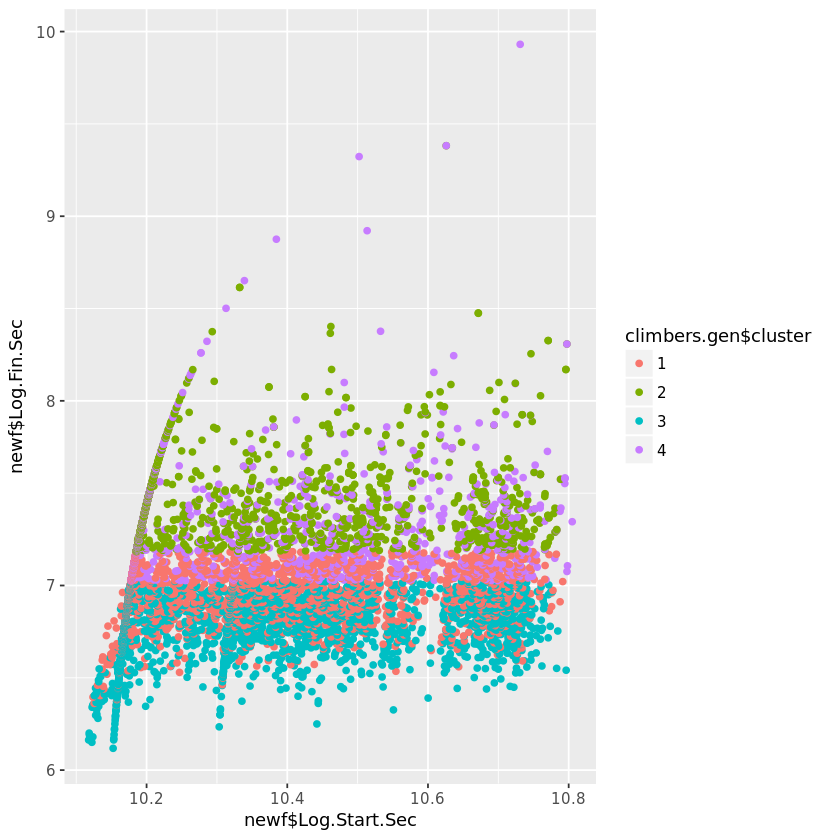

In [76]:
climbers.gen$cluster <- as.factor(climbers.gen$cluster)
ggplot(newf, aes(newf$Log.Start.Sec, newf$Log.Fin.Sec, newf$Gender, color = climbers.gen$cluster))+ geom_point()


Result:

there are two clusters (faster cluster and slower cluster) each for each gender. 

- clusters 3 and 4 are male climbers with those in cluster 3 being the faster group.
- clusters 1 and 2 are female climbers with those in cluster 1 being the faster group.

In [77]:
# Check the ratio of faster climbers vs slower climbers for each gender

fast.m = t[3,1]/t[4,1]
paste ("The ratio of faster males vs slower males is", round(fast.m,2))
fast.f = t[1,2]/t[2,2]
paste ("The ratio of faster females vs slower females is", round(fast.f,2))

"xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

# Check the ratio of slower males vs faster females

slow.m = t[4,1]/t[1,2]
paste ("The ratio of slower males vs faster females is", round(slow.m,2))

"xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

# Check the ratio of faster males vs faster females

fm.ff = t[3,1]/t[1,2]
paste ("The ratio of faster males vs faster females is", round(fm.ff,2))


[1] "The ratio of faster males vs slower males is 2.6"

[1] "The ratio of faster females vs slower females is 2.25"

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] "The ratio of slower males vs faster females is 0.45"

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] "The ratio of faster males vs faster females is 1.18"

Result:

- there are more faster males vs slower males (ratio = 2.6) compared to faster females vs slower females (ratio = 2.25)

- there are more faster males vs faster females (ratio = 1.18)

- across all start times,

    - the faster males outperform the faster females; the slower males outperform the slower females.

    - there is an overlap of slower males with faster females: slower males are about 45% the number of faster females 

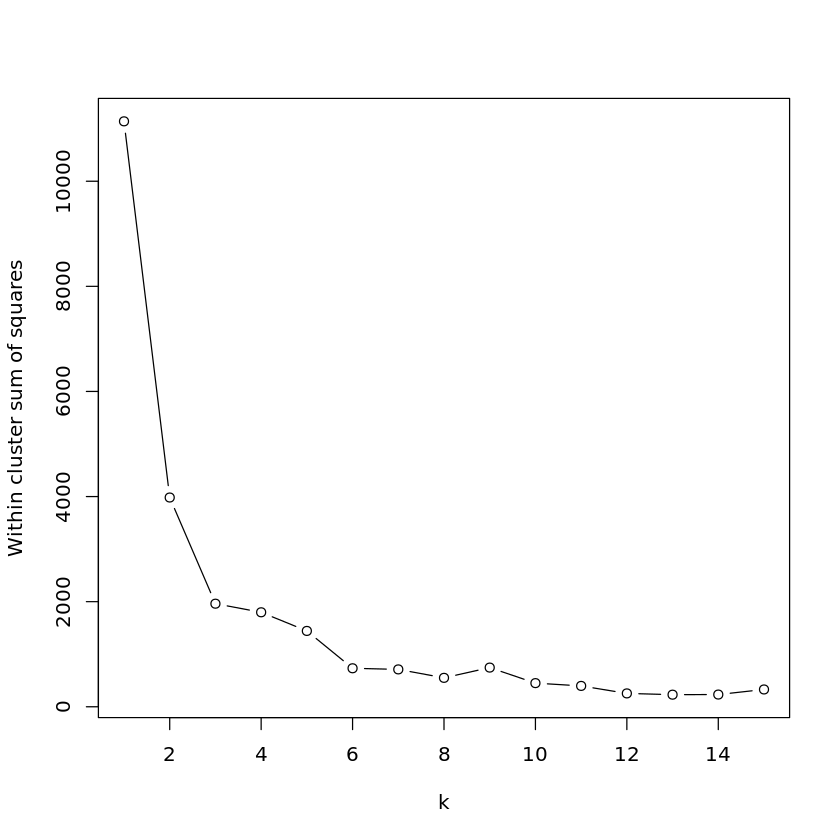

In [78]:
# Cluster by category, finishing time
# Again, use the elbow method

set.seed(50)
wss <- (nrow(newf[,c(6,12)])-1)*sum(apply(newf[,c(6,12)],2,var))
for (i in 2:15) wss[i] <- sum(kmeans(newf[,c(6,12)], centers=i)$withinss)
plot(1:15, wss, type="b", xlab="k", ylab="Within cluster sum of squares")

In [79]:
# From the wss vs k graph, it appears k = 6 is a good k value
# Let's use this k = 6 as our cluster number

set.seed(100)
climbers.cat <- kmeans(newf[,c(6,12)], 6, nstart = 20)

In [80]:
climbers.cat

K-means clustering with 6 clusters of sizes 848, 398, 3040, 1757, 2229, 881

Cluster means:
  Category Log.Fin.Sec
1 5.115566    6.979504
2 1.000000    6.981559
3 3.000000    7.002843
4 4.000000    7.003609
5 2.000000    6.857515
6 1.998865    7.369497

Clustering vector:
   [1] 1 1 1 1 5 1 1 3 1 5 3 1 4 3 3 1 5 5 5 3 1 1 1 1 3 5 3 1 4 1 1 1 3 1 4 1 1
  [38] 5 3 3 1 1 3 1 4 4 5 1 3 5 3 1 4 1 1 5 4 1 4 3 5 4 1 1 1 1 5 4 1 4 3 5 3 1
  [75] 1 1 1 3 5 1 1 5 1 3 5 5 4 4 3 3 1 5 5 1 1 3 1 5 5 4 3 5 4 3 5 3 4 3 3 2 4
 [112] 1 1 5 2 3 3 1 4 5 1 1 3 3 1 4 5 4 5 1 5 5 3 3 5 4 3 5 1 5 3 1 3 5 3 3 5 3
 [149] 4 3 3 5 3 1 1 5 5 1 2 5 3 1 5 1 3 3 3 5 3 3 3 5 5 3 1 4 1 2 5 3 3 3 1 1 5
 [186] 5 5 1 5 2 2 1 3 4 3 5 5 3 3 3 3 3 5 3 3 3 5 3 1 3 1 3 3 3 1 5 3 3 2 5 3 3
 [223] 3 1 5 3 4 5 5 1 5 1 5 5 5 3 5 3 3 1 5 2 5 2 5 3 3 3 3 3 4 5 3 5 3 1 5 3 4
 [260] 5 5 4 3 4 3 4 3 5 5 4 5 5 4 4 4 5 1 4 5 4 5 3 1 3 3 3 5 3 1 5 4 4 1 5 3 4
 [297] 3 3 3 5 1 5 5 5 1 1 1 5 3 3 5 4 5 5 4 4 5 5 1 5 5 5 3 2 4 5 5 1 3 5 5 3 

In [81]:
table(climbers.cat$cluster, newf$Category)

   
       1    2    3    4    5    6
  1    0    0    0    0  750   98
  2  398    0    0    0    0    0
  3    0    0 3040    0    0    0
  4    0    0    0 1757    0    0
  5    0 2229    0    0    0    0
  6    1  880    0    0    0    0

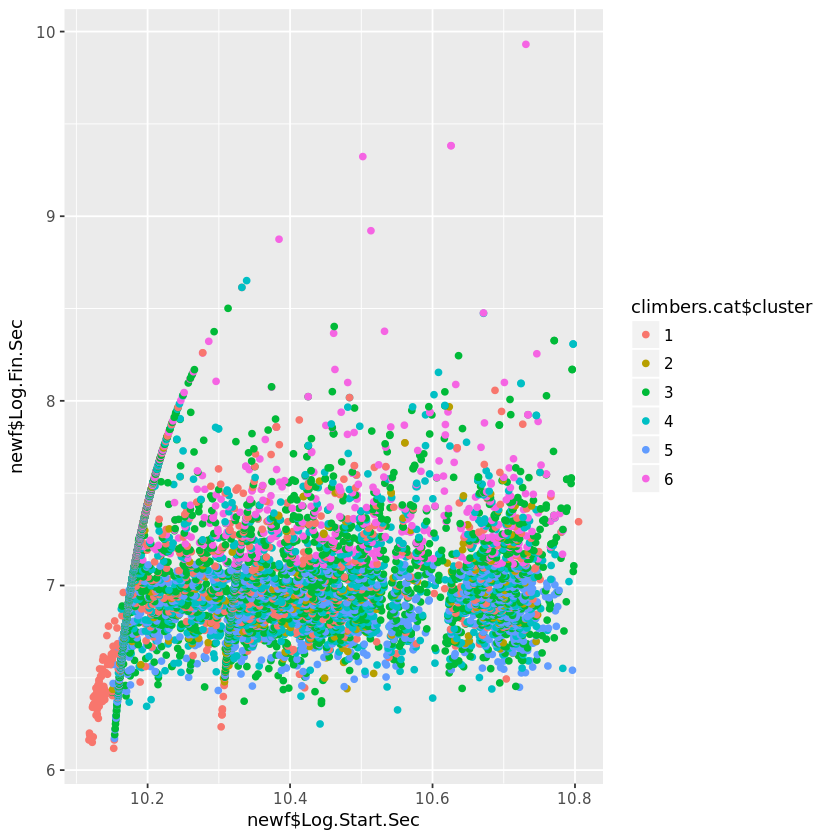

In [82]:
climbers.cat$cluster <- as.factor(climbers.cat$cluster)
ggplot(newf, aes(newf$Log.Start.Sec, newf$Log.Fin.Sec, newf$Category, color = climbers.cat$cluster))+ geom_point()


Results:

- categories "12-18 yrs", "30-39 yrs", "40-49 yrs" are clustered well

- category "20-29 yrs" are clustered into two 

- categories "50 yrs +" and "Elite" are clustered together

**8. k-NN Prediction for Gender**

In [83]:
# For knn 

install.packages("class")

Installing package into ‘/home/vagrant/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [84]:
library(class)

In [85]:
# For prediction vs actual result crosstable

install.packages("gmodels")

Installing package into ‘/home/vagrant/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [86]:
library(gmodels)

In [87]:
# Let's do knn prediction for the gender (using category, start time, finish time)

# Training and testing data
# Make sure only columns with numeric data are taken

# Choose the sample size

sample.size = floor(.8*nrow(newf))

# Training and testing data subsets

set.seed(100)
train <- sample(seq_len(nrow(newf[,c(6,11,12)])), size = sample.size)
newf.train <- newf[train,c(6,11,12)]
newf.test <- newf[-train,c(6,11,12)]


# Training and testing data labels (gender)

newf.train.actual <- newf[train,7]
newf.test.actual <- newf[-train,7]


In [88]:
head(newf[,c(6,11,12)],3)
head(newf.train.actual,3)

Category Log.Start.Sec Log.Fin.Sec
1 6        10.15245      6.118097   
2 6        10.12226      6.150603   
3 6        10.11767      6.163315

[1] 1 0 1
Levels: 0 1

In [89]:
# Prediction of the gender (using category, start time, finish time)
# k value is roughly about the square root of the number of data

newf.test.pred <- knn(train = newf.train, test = newf.test, cl = newf.train.actual, k = 95)

In [90]:
# Evaluate the model performance

CrossTable(x = newf.test.actual, y = newf.test.pred, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1831 

 
                 | newf.test.pred 
newf.test.actual |         0 |         1 | Row Total | 
-----------------|-----------|-----------|-----------|
               0 |       584 |       387 |       971 | 
                 |     0.601 |     0.399 |     0.530 | 
                 |     0.678 |     0.399 |           | 
                 |     0.319 |     0.211 |           | 
-----------------|-----------|-----------|-----------|
               1 |       277 |       583 |       860 | 
                 |     0.322 |     0.678 |     0.470 | 
                 |     0.322 |     0.601 |           | 
                 |     0.151 |     0.318 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       861 |       970 |      1831 | 
          

In [91]:
acc = (584+583)/1831
paste ("Accuracy of prediction is", round(acc, 3),"from the one random sample train-test.")

[1] "Accuracy of prediction is 0.637 from the one random sample train-test."

In [92]:
# Let's do knn prediction using k-fold repeated cross validation for the gender (using category, start time, finish time)
# install some related packages

install.packages("caret")
library(caret)

install.packages("e1071")
library(e1071)

Installing package into ‘/home/vagrant/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster

Installing package into ‘/home/vagrant/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [93]:
# Rename the required columns as a new dataframe

knn.newf <- newf[,c(6,7,11,12)]

# Choose the sample size

sample.size = floor(.8*nrow(knn.newf))

# Training and testing data subsets

set.seed(200)
train <- sample(seq_len(nrow(knn.newf[,c(1,2,3,4)])), size = sample.size)
knn.newf.train <- knn.newf[train,c(1,2,3,4)]
knn.newf.test <- knn.newf[-train,c(1,2,3,4)]

# Implement k-fold repeated cross validation
# 15-fold, 3 repeats

set.seed(300)
train_control <- trainControl(method="repeatedcv", number=15, repeats = 3)


In [94]:
head(knn.newf,5)


Category Gender Log.Start.Sec Log.Fin.Sec
1 6        0      10.15245      6.118097   
2 6        0      10.12226      6.150603   
3 6        0      10.11767      6.163315   
4 6        0      10.15327      6.163315   
5 2        0      10.15343      6.171701

In [95]:
knn.model <- train(Gender ~ ., data = knn.newf.train, trControl=train_control, method="knn")
knn.model

k-Nearest Neighbors 

7322 samples
   3 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (15 fold, repeated 3 times) 
Summary of sample sizes: 6833, 6834, 6834, 6834, 6833, 6834, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.6011076  0.1999993
  7  0.6051590  0.2092268
  9  0.6154491  0.2299556

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 9.

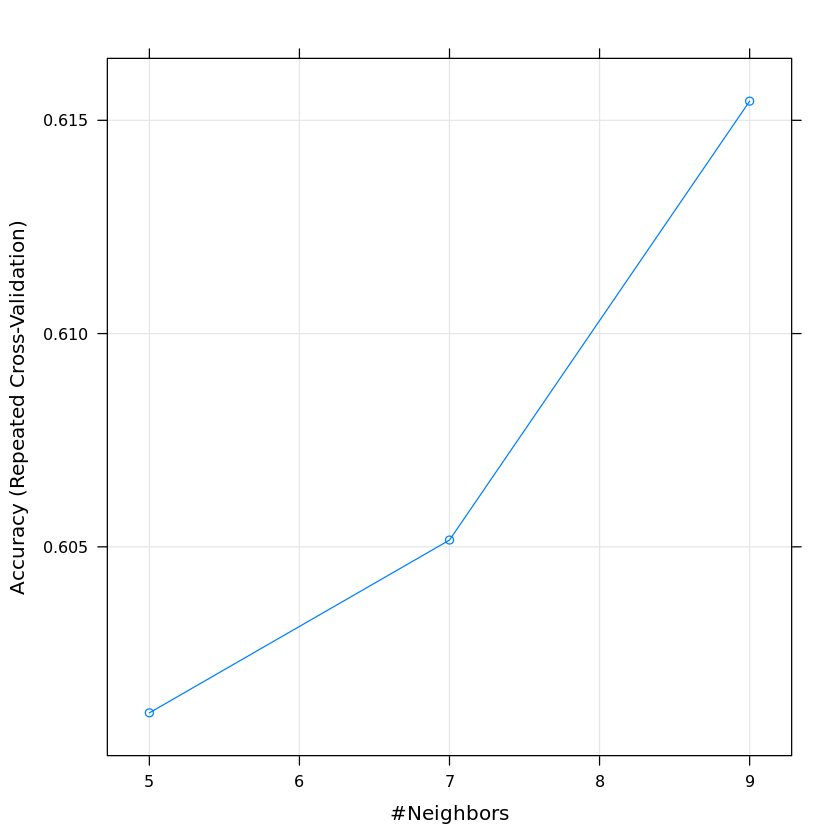

In [96]:
plot(knn.model)

In [97]:
knn.predict <- predict(knn.model, knn.newf.test)
confusionMatrix(knn.predict,knn.newf.test$Gender)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 593 309
         1 403 526
                                          
               Accuracy : 0.6111          
                 95% CI : (0.5884, 0.6336)
    No Information Rate : 0.544           
    P-Value [Acc > NIR] : 3.762e-09       
                                          
                  Kappa : 0.2233          
 Mcnemar's Test P-Value : 0.0004915       
                                          
            Sensitivity : 0.5954          
            Specificity : 0.6299          
         Pos Pred Value : 0.6574          
         Neg Pred Value : 0.5662          
             Prevalence : 0.5440          
         Detection Rate : 0.3239          
   Detection Prevalence : 0.4926          
      Balanced Accuracy : 0.6127          
                                          
       'Positive' Class : 0               
                                          

Result:

- Accuracy of knn k-fold repeated cv (15-fold, repeats = 3) prediction model for gender = 0.6111. Category, start time, and finishing time are quite decent predictors of gender.

**9. k-NN Prediction for Category**

In [98]:
# Let's do knn prediction for the category (using gender, start time, finish time)

# Training and testing data
# Make sure only columns with numeric data are taken

# Choose the sample size

sample.size = floor(.8*nrow(newf))

# Training and testing data subsets

set.seed(400)
train2 <- sample(seq_len(nrow(newf[,c(7,11,12)])), size = sample.size)
newf.train2 <- newf[train2,c(7,11,12)]
newf.test2 <- newf[-train2,c(7,11,12)]


# Training and testing data labels (category)

newf.train.actual2 <- newf[train2,6]
newf.test.actual2 <- newf[-train2,6]


In [99]:
head(newf.train2,3)
head(newf.train.actual2,3)

Gender Log.Start.Sec Log.Fin.Sec
1373 0      10.16739      6.733402   
1697 0      10.27774      6.761573   
6688 1      10.18305      7.131699

[1] 2 4 3
Levels: 1 2 3 4 5 6

In [100]:
# Prediction of the category (using gender, start time, finish time)

newf.test.pred2 <- knn(train = newf.train2, test = newf.test2, cl = newf.train.actual2, k = 95)

In [101]:
# Evaluate the model performance

CrossTable(x = newf.test.actual2, y = newf.test.pred2, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1831 

 
                  | newf.test.pred2 
newf.test.actual2 |         2 |         3 |         4 |         6 | Row Total | 
------------------|-----------|-----------|-----------|-----------|-----------|
                1 |        41 |        31 |         1 |         0 |        73 | 
                  |     0.562 |     0.425 |     0.014 |     0.000 |     0.040 | 
                  |     0.043 |     0.037 |     0.029 |     0.000 |           | 
                  |     0.022 |     0.017 |     0.001 |     0.000 |           | 
------------------|-----------|-----------|-----------|-----------|-----------|
                2 |       359 |       261 |         8 |         1 |       629 | 
                  |     0.571 |     0.415 |     0.013 |     0.002 |     0.344 | 
      

In [102]:
acc2 = (359+275+9+3)/1831
paste ("Accuracy of prediction is", round(acc2,3),"from the one random sample train-test.")

[1] "Accuracy of prediction is 0.353 from the one random sample train-test."

In [103]:
# Choose the sample size

sample.size = floor(.8*nrow(knn.newf))

# Training and testing data subsets

set.seed(500)
train2 <- sample(seq_len(nrow(knn.newf[,c(1,2,3,4)])), size = sample.size)
knn.newf.train2 <- knn.newf[train2,c(1,2,3,4)]
knn.newf.test2 <- knn.newf[-train2,c(1,2,3,4)]

# Implement k-fold repeated cross validation
# 15-fold, 3 repeats

set.seed(600)
train_control2 <- trainControl(method="repeatedcv", number=15, repeats = 3)


In [104]:
knn.model2 <- train(Category ~ ., data = knn.newf.train2, trControl=train_control, method="knn")
knn.model2

k-Nearest Neighbors 

7322 samples
   3 predictor
   6 classes: '1', '2', '3', '4', '5', '6' 

No pre-processing
Resampling: Cross-Validated (15 fold, repeated 3 times) 
Summary of sample sizes: 6835, 6832, 6832, 6835, 6833, 6835, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa     
  5  0.3235906  0.03572459
  7  0.3224066  0.02553529
  9  0.3340632  0.03557799

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 9.

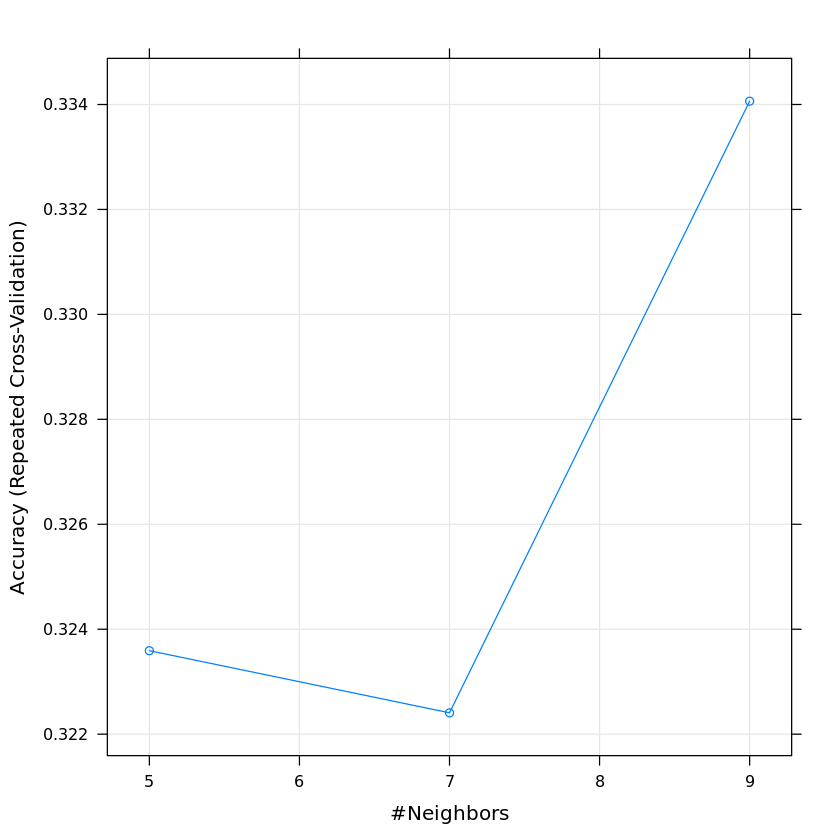

In [105]:
plot(knn.model2)

In [106]:
knn.predict2 <- predict(knn.model2, knn.newf.test2)
confusionMatrix(knn.predict2,knn.newf.test$Category)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6
         1   0   3   2   1   1   0
         2  31 275 253 177  67   7
         3  31 254 243 138  71  11
         4  10  69  87  45   9   0
         5   2  10  11   3   3   0
         6   0   2   6   4   0   5

Overall Statistics
                                          
               Accuracy : 0.3119          
                 95% CI : (0.2907, 0.3336)
    No Information Rate : 0.3348          
    P-Value [Acc > NIR] : 0.9828          
                                          
                  Kappa : 0.0054          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity          0.000000   0.4486   0.4037  0.12228 0.019868 0.217391
Specificity          0.996016   0.5608   0.5891  0.88038 0.984524 0.993363
Pos Pred Value       0.000000   0.3395   0.3249  0.20455 0.103448 0.294118
Neg Pred Value 

Result:

- Accuracy of knn k-fold repeated cv (15-fold, repeats = 3) prediction model for category = 0.3119
- Start time, finishing time and gender are weak predictors for category. This makes sense since:
   - finishing time is only significantly deterministic of the elite category and to some extent the 19-29 and 30-39 categories.
   - the start time is significantly different for elite category only compared to other categories where the start time is everywhere in the domain 
   - gender is everywhere in the domain 

**10. Multiple Linear Regression: Predicting Finishing Time**

In [107]:
# Rename the required columns as a new dataframe

multireg.newf <- newf[,c(6,7,9,10)]

# Choose the sample size

sample.size = floor(.8*nrow(multireg.newf))

# Training and testing data subsets

set.seed(700)
train <- sample(seq_len(nrow(multireg.newf[,c(1,2,3,4)])), size = sample.size)
multireg.newf.train <- multireg.newf[train,c(1,2,3,4)]
multireg.newf.test <- multireg.newf[-train,c(1,2,3,4)]

# Implement k-fold repeated cv multiple linear regression

set.seed(800)
train_control3 <- trainControl(method="repeatedcv", number=15, repeats = 3)


In [108]:
# Train the prediction model

multireg.model <- train(Finish.time.sec ~ ., data = multireg.newf.train, trControl=train_control, method="glm")
multireg.model

Generalized Linear Model 

7322 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (15 fold, repeated 3 times) 
Summary of sample sizes: 6833, 6835, 6834, 6833, 6834, 6834, ... 
Resampling results:

  RMSE      Rsquared 
  471.9808  0.0819213


In [109]:
# Apply the prediction model to the test data

multireg.predict <- predict(multireg.model, multireg.newf.test)
# head(multireg.predict,10)
# head(multireg.newf.test,10)

In [110]:
# The predicted values

predicted <- data.frame(multireg.predict)
df = cbind(multireg.newf.test, predicted)
head(df,10)
nrow(df)

Category Gender Start.time.sec Finish.time.sec multireg.predict
6  6        0      24925          483              578.1758       
9  6        0      24795          493              576.6769       
14 3        0      25718          518             1008.7134       
22 6        0      29863          544              635.1102       
26 2        0      25758          558             1017.2665       
32 6        0      24899          567              577.8760       
36 6        0      24936          572              578.3026       
39 3        0      25774          574             1009.3591       
46 4        0      25784          584              998.8528       
48 6        0      25250          585              581.9230

[1] 1831

In [111]:
# The difference between the predicted and actual values

pred.actual.diff <- data.frame(df$multireg.predict - df$Finish.time.sec)
complete.df = cbind(df, pred.actual.diff)
colnames(complete.df)[5] <- "Pred.Finish.time.sec"
colnames(complete.df)[6] <- "Diff_pred.actual.Finish.time.sec"
head(complete.df,10)

Category Gender Start.time.sec Finish.time.sec Pred.Finish.time.sec
6  6        0      24925          483              578.1758           
9  6        0      24795          493              576.6769           
14 3        0      25718          518             1008.7134           
22 6        0      29863          544              635.1102           
26 2        0      25758          558             1017.2665           
32 6        0      24899          567              577.8760           
36 6        0      24936          572              578.3026           
39 3        0      25774          574             1009.3591           
46 4        0      25784          584              998.8528           
48 6        0      25250          585              581.9230           
   Diff_pred.actual.Finish.time.sec
6   95.175817                      
9   83.676937                      
14 490.713433                      
22  91.110198                      
26 459.266545                      
32  10.876041                      
36   6.302645                      
39 435.359105                      
46 414.852823                      
48  -3.076983

In [112]:
# For checking the difference between predicted and actual values

install.packages("forecast")
library(forecast)

Installing package into ‘/home/vagrant/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [113]:
acc = accuracy(complete.df$Finish.time.sec, complete.df$Pred.Finish.time.sec)
acc

ME       RMSE     MAE      MPE      MAPE    
Test set 13.49698 385.4724 256.9549 1.118621 21.99784

In [114]:
paste("Mean absolute error (MAE) of prediction vs actual time is", acc[3], "seconds.")
paste("Root mean squared error (RMSE) of prediction vs actual time is", acc[2], "seconds.")

[1] "Mean absolute error (MAE) of prediction vs actual time is 256.954903971981 seconds."

[1] "Root mean squared error (RMSE) of prediction vs actual time is 385.47241036328 seconds."

Result:

- the multiregression prediction model is rather poor;
    - MAE = 256.95 seconds
    - RMSE = 385.47 seconds

In [115]:
# What does the model say about predictors of finishing time?

summary(multireg.model)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
 -688.5   -234.9    -98.5    105.9  19296.5  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.319e+02  4.059e+01  18.034  < 2e-16 ***
Category2      -1.164e+01  2.925e+01  -0.398    0.691    
Category3      -1.973e+01  2.930e+01  -0.673    0.501    
Category4      -3.035e+01  3.058e+01  -0.993    0.321    
Category5       7.009e+00  3.452e+01   0.203    0.839    
Category6      -4.411e+02  6.421e+01  -6.870 6.95e-12 ***
Gender1         1.867e+02  1.173e+01  15.906  < 2e-16 ***
Start.time.sec  1.153e-02  9.377e-04  12.295  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 250603.8)

    Null deviance: 1956639834  on 7321  degrees of freedom
Residual deviance: 1832916088  on 7314  degrees of freedom
AIC: 111813

Number of Fisher Scoring iterations: 2


Results:

- there are 3 extremely significant predictors of finishing time;
    - category = Elite (being Elite decreases finishing time by about 441.1s)
    - gender Female (being female increases finishing time by about 186.7s)
    - start time (a one second increase in start time is associated with 0.01153s increase in finishing time which translate to a 60s x 60m x 0.01153 = 41.508s increase in finishing time if a climber starts an hour later)
    


**Executive summary**

Results:

- Male climbers are faster overall than female climbers


- The fastest male is 26.21 % faster than the fastest female


- The occurrence of outliers are more prevalent in male climbers; both for fast and slow outliers


- Male climbers are consistently faster then female climbers across all years


- Elite climbers are significantly faster than climbers in other categories for all years (where there is an Elite category)


- The occurrence of outliers for Elite climbers are rare; it is more common in "19-29 yrs" and "30-39 yrs", and to a certain degree in "40-49 yrs"


- Elite male climbers are significantly faster overall than non-Elite male climbers


- Elite female climbers are significantly faster overall than non-Elite female climbers 


- The Elite males are 27.23 % faster than the Elite females


- The non-Elite males are 18.11 % faster than the non-Elite females


- Male top 30 finishing times have yet to stabilise and still fluctuating


- Female top 30 finishing times have yet to stabilise too but seems heading to stabilise at around 750++s (more data needed to verify this in future)


- Gender performance difference gap have yet to stabilise although there is some indication that the gap is getting smaller over time.


- Top 30 all time finish time belong to males


- 13 male climbers hold this honour


- The two most successful climbers are Mark BOURNE (6 finish times in all time top 30) and Darren WILSON (6 finish times in all time top 30)


- In fact, the top 10 all time finish times belong to these two guys


- The record stands at 7:34 (Mark BOURNE), achieved in 2013


- The all time top 30 times are dominated by Elites with 15 finish times


- It's interesting to note that 13 of the all time top 30 times belong to those in age group 19-29, 30-39: the two age groups with the most participation


- Although we do not know the exact ages of the Elites, it is probably quite safe to say they are in age group 19-29, 30-39


- Males dominate the yearly top 30 positions (194 times for males vs 16 times for females)


- "30-39 yrs" and Elites appear in the yearly top 30 most often, followed by "19-29 yrs”


- Multiple finishes in the top 30 are dominated by males


- Only two females have had multiple finishes in the top 30


- 125 climbers (116 males and only 9 females) have had top 30 finishes


- There is a serious imbalance in the start time and this hugely differs from the stated staggered wave time as published by the organizers


- Start time affect finishing time extremely/very significantly across all age groups for each gender except "12-18 yrs, female"


- There are more faster males vs slower males (ratio = 2.6) compared to faster females vs slower females (ratio = 2.25)


- There are more faster males vs faster females (ratio = 1.18)


- Across all start times,

  - the faster males outperform the faster females; the slower males outperform the slower females.

  - there is an overlap of slower males with faster females: slower males are about 45% the number of faster females
  

- The multiregression model for predicting finishing time based on category, gender, and start time is rather poor: MAE = 256.95s ; RMSE = 385.47s


- There are 3 extremely significant predictors of finishing time;

   - category = Elite (being Elite decreases finishing time by about 441.1s)
   - gender Female (being female increases finishing time by about 186.7s)
   - start time (a one second increase in start time is associated with 0.01153s increase in finishing time which translate to a 60s x 60m x 0.01153 = 41.508s increase in finishing time if a climber starts an hour later)




- Accuracy of knn k-fold repeated cv (15-fold, repeats = 3) prediction model for gender = 0.6111. Category, start time, and finishing time are quite decent predictors of gender.


- Accuracy of knn k-fold repeated cv (15-fold, repeats = 3) prediction model for category = 0.3119. Start time, finishing time and gender are weak predictors for category. 


Final notes:

- Start time (which in this project represents "stack effect") deserves to be looked into in more detail. 


- Availability of start time data is a problem though, since most races do not report start times (Eureka Stair Climb is one of the rare ones).


- A more accurate measure of "stack effect" is desirable, which would paint a better picture of the 
influence of "stack effect". Climbers' wearables or indicators on strategic heights of the staircase 
during the climb that report the temperature, humidity and pressure would increase the reliability of results.


- Also, finishing times could also be affected by slower climbers in the staircase who impede the path of other climbers, and this is even more evident if the release times are not rationed out. In this project, there was evidence of crowding in the staircase as more climbers were released at certain times compared to other times.


- Research of performances over the years shows that the gender performance difference gap in running events decreased from about 25.3% (in 1922) to stabilize at about 11.2% (since 1985) (see e.g. (1) research in various sports by Thibault et al. (2010), "Women and men in sport performance: the gender gap has not evolved since 1983", Journal of Sports Science and Medicine, 9, 214-223; and (2) Cheuvront et al. (2005), "Running performance differences between men and women: an update", Sports Medicine, 35(12),1017-1024). This project only has 7 years of data, and that too, in only one particular stair climbing event. Although it is rather premature to say anything for sure, the results in this project somehow indicates that the gender performance difference gap is getting smaller over time. More data and a longer history of data would be an interesting avenue of research to see the evolution of the gender performance difference gap in stair climbing sport.


- This project is merely a snapshot of the performance of stair climbers in one of the world's top stair climbing event. The inclusion of more towers/buildings would provide a better picture of the performance; it also provides the opportunity to look at the effect (if any) of height (in meters), number of steps, and ratio of number of steps to height. 